<p style="font-size:36px;text-align:center"> <b> Product Backorder Prediction </b> </p>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

###### Backorder:

An item on backorder is an out of stock product that is expected to be delivered by a certain date once it is back in stock. Businesses will often still sell products on backorder with the guarantee to ship them to the buyer once their inventory has been replenished.

Backordering an item means the shopper can buy the item now and receive it at a future date when the item is in stock and available. When an order contains a backordered item, it can’t be packed and shipped immediately given the lack of physical inventory at the time. If there are other items in the same order that are in stock, the order may be split and shipped at different times, with the backordered items being shipping at a later date.

#### Problem Statement:

Material backorder is a common supply chain problem, impacting an inventory system service level and effectiveness. Identifying parts with the highest chances of shortage prior its occurrence can present a high opportunity to improve an overall company’s performance.

The objective is to build a Machine Learning model that predicts the future backordered products based on features available on the product.


##### Existing Solution:
https://www.researchgate.net/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning

<h2>1.2 Business Objectives and Constraints </h2>

- Misclassification could be a problem based on the space available in the warehouse.
- Interpretability is an important aspect,knowing why the model predicts backorder could help the seller to determine reorder of the product.
- Latency is not an important aspect.


<h1> 2. Machine Learning Problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

- Source: https://www.kaggle.com/c/untadta/data
- There are 2 data files train.csv and test.csv. 
- There are 1687861 entries in train.csv and 242076 entries in test.csv.
- Both Train and test files have 23 columns.
    

- Data fields
    - sku - unique code for identifing each item
    - national_inv- Current inventory level of component
    - lead_time -Transit time
    - in_transit_qty - Quantity in transit
    - forecast_x_month - Forecast sales for the net 3, 6, 9 months
    - sales_x_month - Sales quantity for the prior 1, 3, 6, 9 months
    - min_bank - Minimum recommended amount in stock
    - potential_issue - Indictor variable noting potential issue with item
    - pieces_past_due - Parts overdue from source
    - perf_x_months_avg - Source performance in the last 6 and 12 months
    - local_bo_qty - Amount of stock orders overdue
    - X17-X22 - General Risk Flags
    - went_on_back_order - Product went on backorder
    



<h3> 2.1.2 Example Data point </h3>

<pre>
sku                  1026827
national_inv               0
lead_time                NaN
in_transit_qty             0
forecast_3_month           0
forecast_6_month           0
forecast_9_month           0
sales_1_month              0
sales_3_month              0
sales_6_month              0
sales_9_month              0
min_bank                   0
potential_issue           No
pieces_past_due            0
perf_6_month_avg         -99
perf_12_month_avg        -99
local_bo_qty               0
deck_risk                 No
oe_constraint             No
ppap_risk                 No
stop_auto_buy            Yes
rev_stop                  No
went_on_backorder         No
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

It is a binary classification problem where for a given datapoint the model needs to predict future backorder products

<h3> 2.2.2 Performance Metric </h3>

Evaluation metric(s):
*  AUC (area under the curve): The AUC (Area Under Curve) is the area enclosed by the ROC curve. A perfect classifier has AUC = 1 and a completely random classifier has AUC = 0.5. Usually, a model will score somewhere in between.
* Confusion Matrix
* Precision,Recall and Precision-Recall curve

<h1> 3.Exploratory Data Analysis </h1>

In [1]:
#import rarfile
import patoolib
import numpy as np,seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions
import missingno as msno
from prettytable import PrettyTable
from collections import Counter
#import dill
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
import imblearn
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

Using TensorFlow backend.


<h3>3.1 Reading data and Analysing basic information</h3>

In [2]:
import pandas as pd

train_df = pd.read_csv('/home/shkr/Documents/ML/CaseStudies/Self Case-Study/backOrder Pred/BackOrder_data/Kaggle_Training_Dataset_v2.csv')

print('shape of train data :',train_df.shape)

shape of train data : (1687861, 23)


In [3]:
train_df.tail().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

In [4]:
train_df = train_df.drop(1687860)

In [5]:
train_df, df_drop_it = train_test_split(train_df, train_size =0.4, stratify=train_df['went_on_backorder'])
print('shape of train data :',train_df.shape)

shape of train data : (675144, 23)


<h3>3.1.1 Checking for Null values </h3>

<h4>Checking for null values in Train data</h4>

In [6]:
#https://www.kaggle.com/sonalisingh1411/customer-churn-eda-top-5-models-comparion-95
train_df.describe().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

NumExpr defaulting to 4 threads.


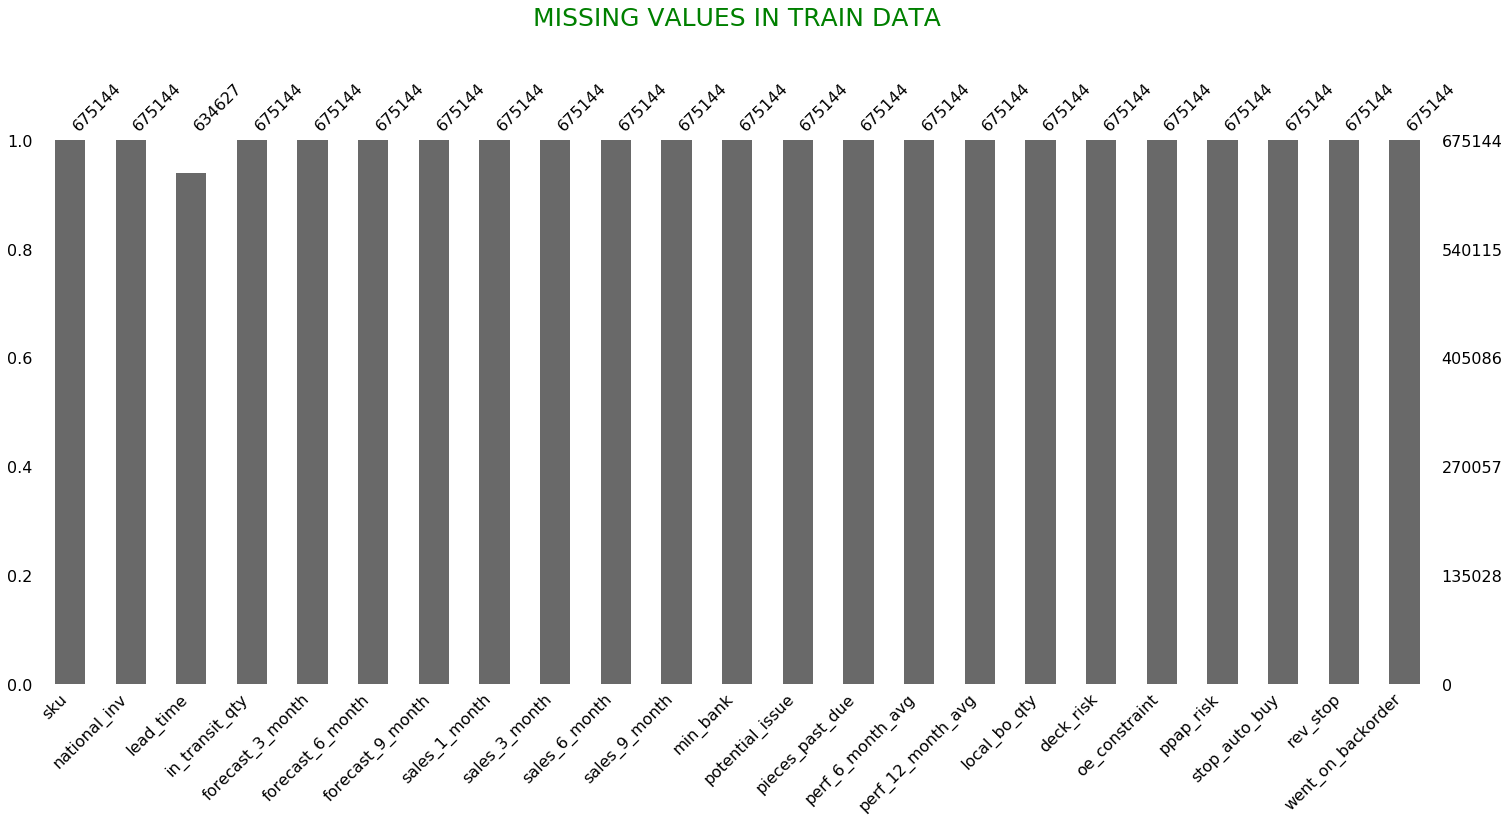

In [7]:
msno.bar(train_df);
plt.title('Missing Values in train data'.upper(),fontdict={'fontsize':25},color = 'green',y=1.2)
plt.show()

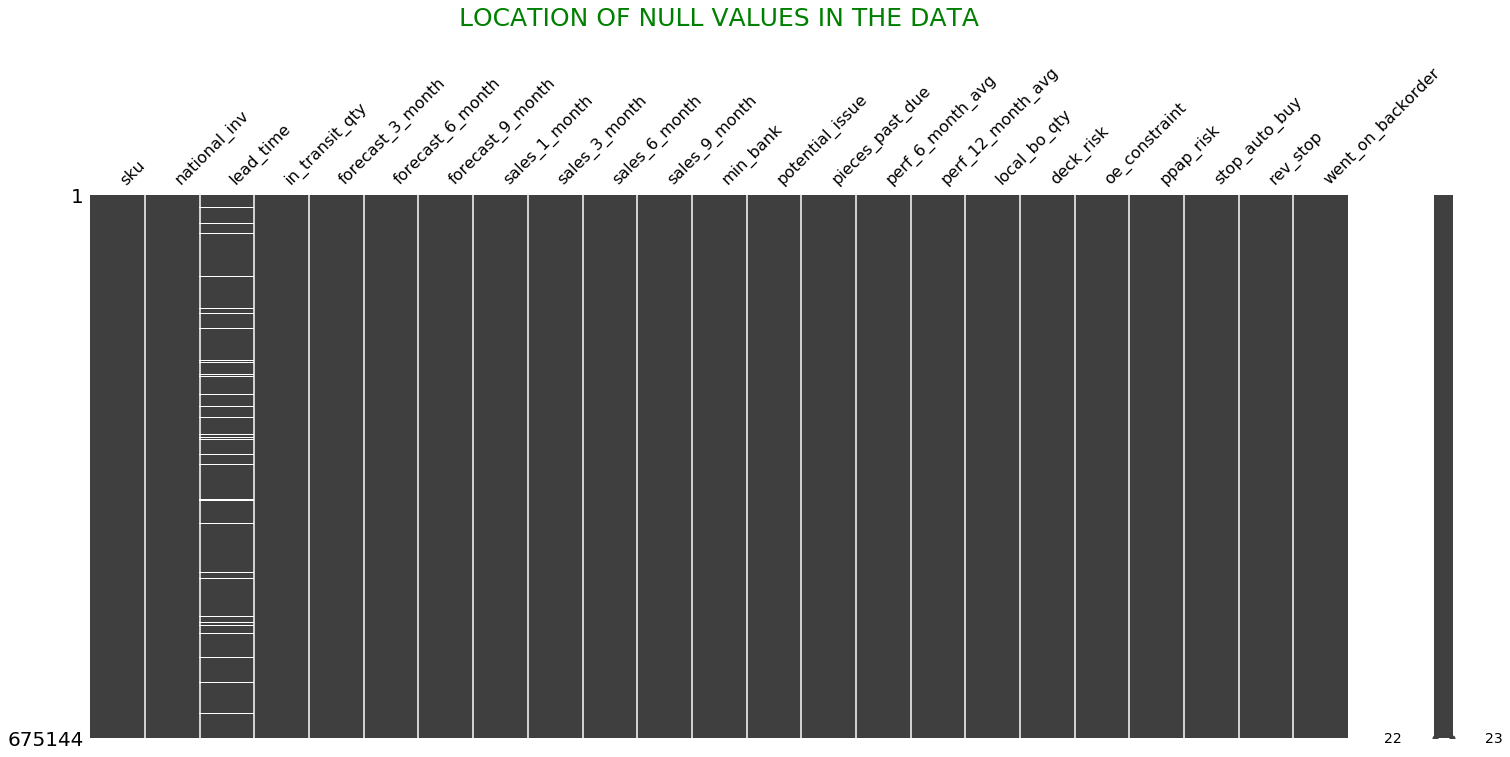

In [8]:
msno.matrix(train_df)
plt.title('Location of null values in the data'.upper(),fontdict={'fontsize':25},color = 'green',y=1.3)
plt.show();

In [9]:
print('No.of Null values in each lead_time:',train_df.lead_time.isnull().sum())
print('-'*45)
print('% of Null values in each lead_time:',np.round((train_df.lead_time.isnull().sum())/train_df.shape[0],3)*100)

No.of Null values in each lead_time: 40517
---------------------------------------------
% of Null values in each lead_time: 6.0


<font color='green'>
<i>
<b>
    
- Data has 23 features with 15 Numerical variables,7 Categorical variables and went_on_backorder being the Class variable.

    
- Among all the features only lead_time feature has null values with nearly 6% of data missing.
  </b></i>  
</font>

<h3>3.1.2 Distribution of class variables</h3>

NO.OF DATA POINTS BELONGING TO EACH CLASS LABEL::
----------------------------------------------------
No     670627
Yes      4517 



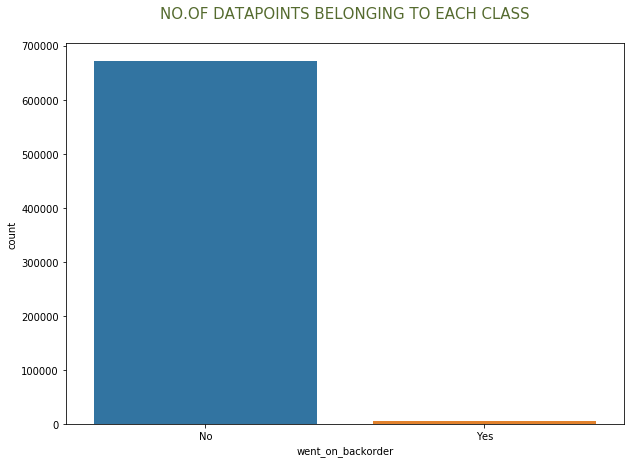

In [10]:
print('No.of data points belonging to each class label::'.upper())
print('-'*52)
print(train_df.went_on_backorder.value_counts().to_string(),'\n')
plt.figure(figsize=(10,7))
sns.countplot(data=train_df,x='went_on_backorder');
plt.title('No.of datapoints belonging to each class'.upper(),color='darkolivegreen',fontdict={'fontsize':15},y=1.05)
plt.show()

% of non-backorder items :: 99.3
% of backorder items :: 0.7000000000000001


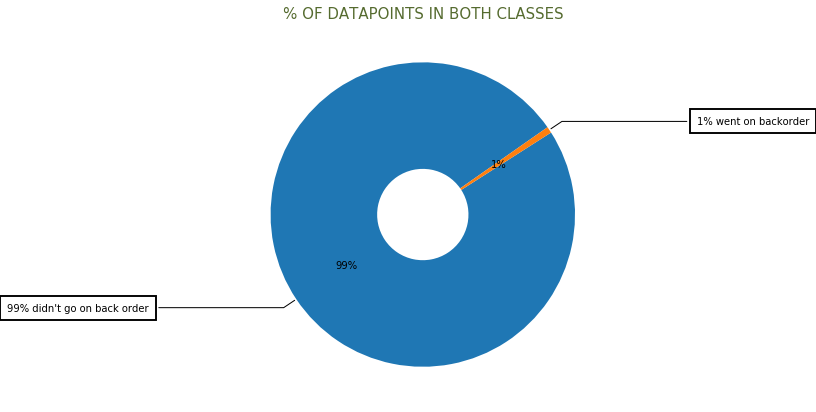

In [11]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
print('% of non-backorder items ::',round(train_df.went_on_backorder.value_counts()['No']/train_df.shape[0],3)*100)
print('% of backorder items ::',round(train_df.went_on_backorder.value_counts()['Yes']/train_df.shape[0],3)*100)

fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(aspect="equal"))

wedges,labels,percent = ax.pie(train_df['went_on_backorder'].value_counts(),autopct='%.0f%%',wedgeprops=dict(width=0.7),startangle=35)
#ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
text = [str(percent[0].get_text())+' didn\'t go on back order',str(percent[1].get_text())+' went on backorder']
bbox_props = dict(boxstyle="square,pad=0.7", fc="w", ec="k", lw=1.9)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(text[i], xy=(x, y), xytext=(1.80*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('% of datapoints in both classes'.upper(),y=1,color='darkolivegreen',fontdict={'fontsize':15})

plt.show()


<font color='green'>
<i>
<b>
    
- Total no.of backorder products in the dataset is only 4517 which is only 0.7% of the overall data indicating that there is extreme imbalance in the data.
  </b></i>  
</font>

## 3.2.Basic Analysis on features

<h4> About data:</h4>

<font color = 'darkslategrey'>
    
    
- SKU (Stock Keeping Unit) is a product code that you can use to search and identify stock on hand from lists, invoices, or order forms. It is a term that is typically used when talking about inventory management.


- national_inv- Current inventory level of component


- lead_time -Transit time


- in_transit_qtry - Quantity in transit


- forecast_x_month - Forecast sales for the net 3, 6, 9 months


- sales_x_month - Sales quantity for the prior 1, 3, 6, 9 months


- min_bank - Minimum recommended amount in stock


- potential_issue - Indictor variable noting potential issue with item


- pieces_past_due - Parts overdue from source


- perf_x_months_avg - Source performance in the last 6 and 12 months


- local_bo_qty - Amount of stock orders overdue


- X17-X22 - General Risk Flags


- went_on_back_order - Product went on backorder
    
 </font>

<h3>3.2.0 Distribution plots of Numerical Variables</h3>

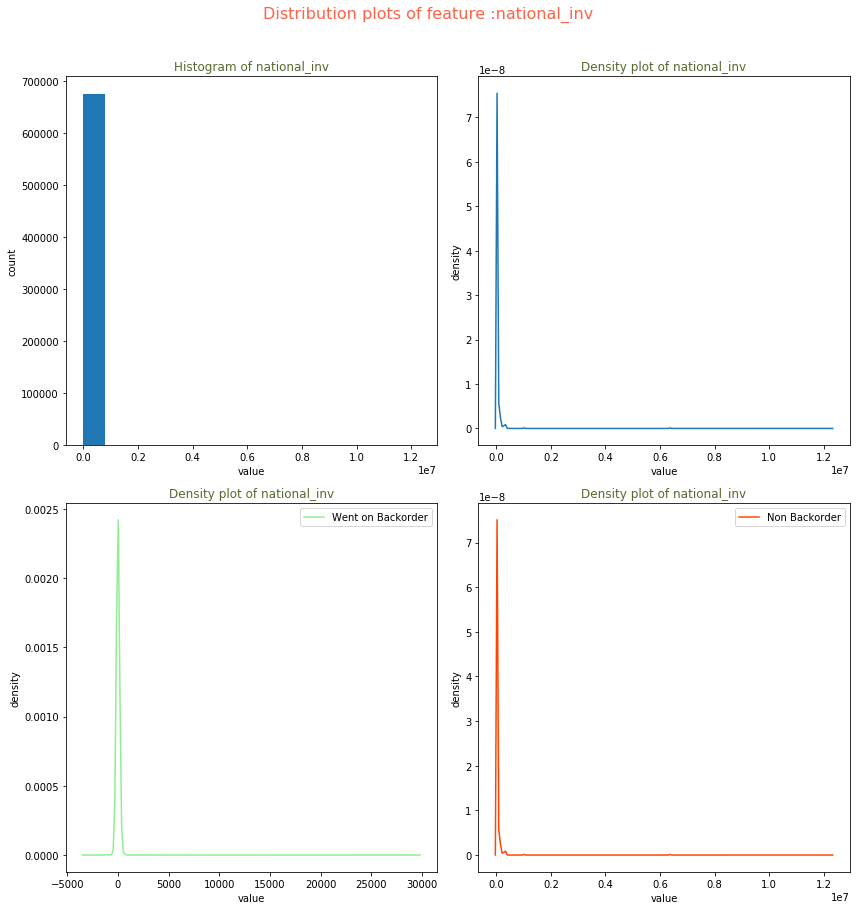

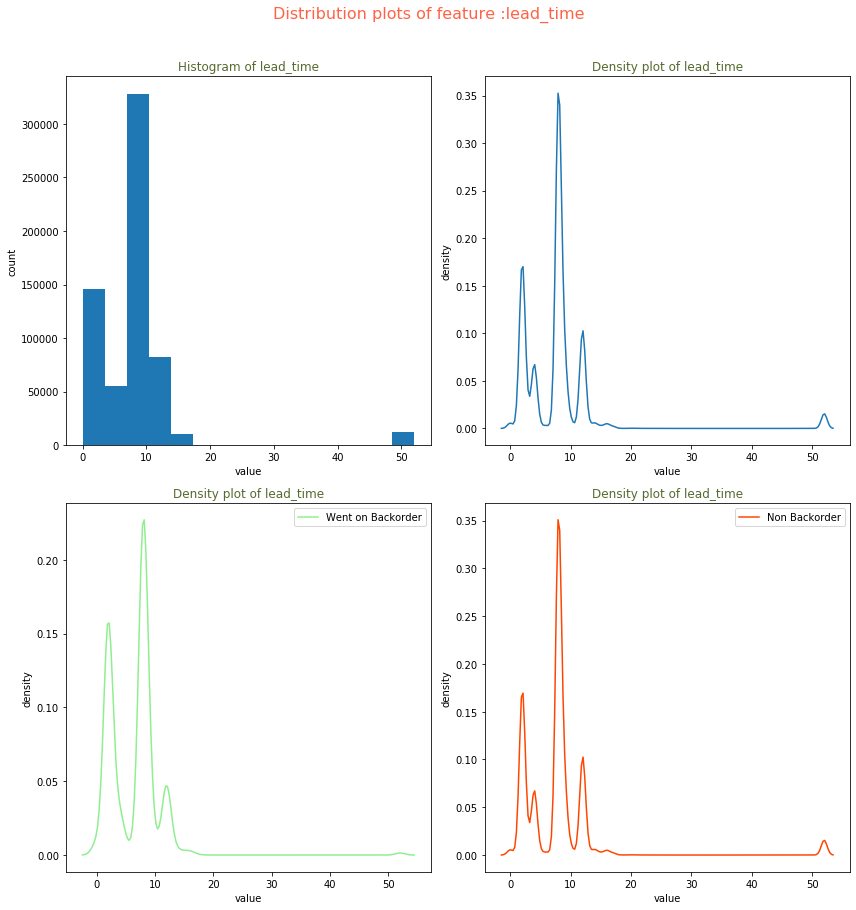

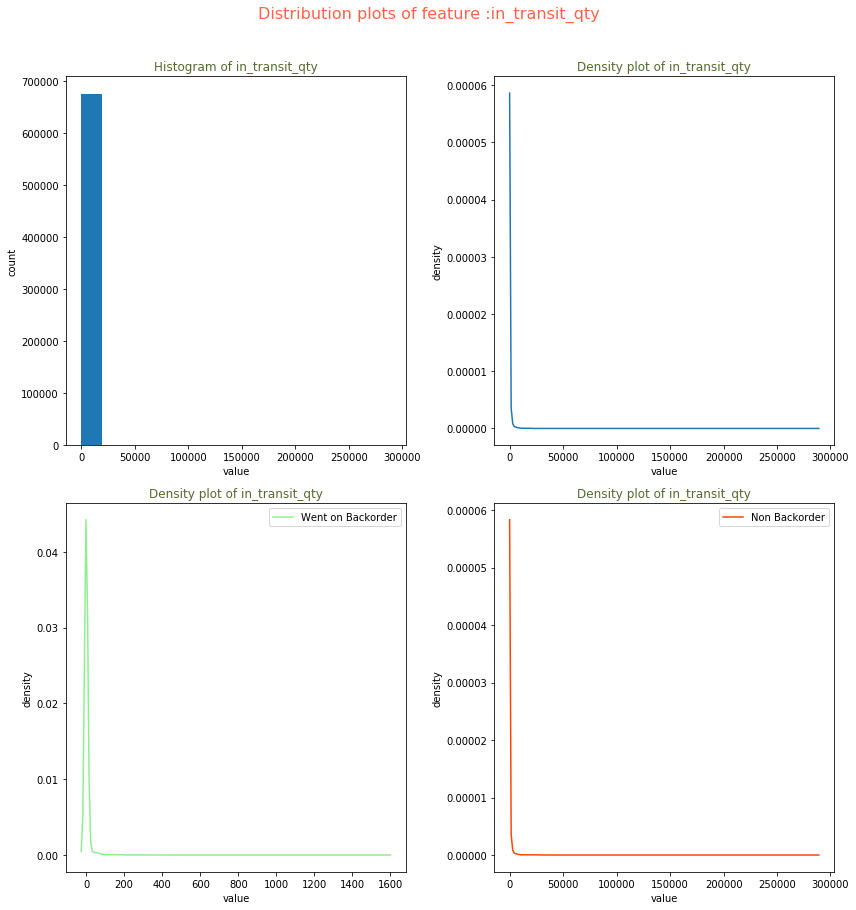

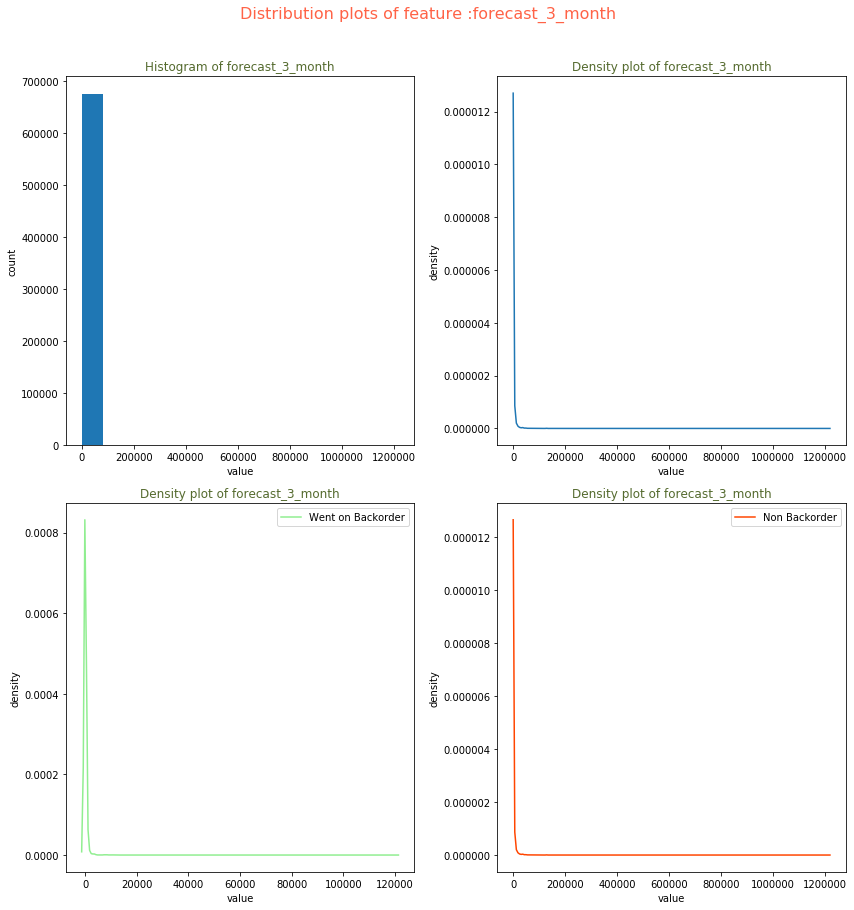

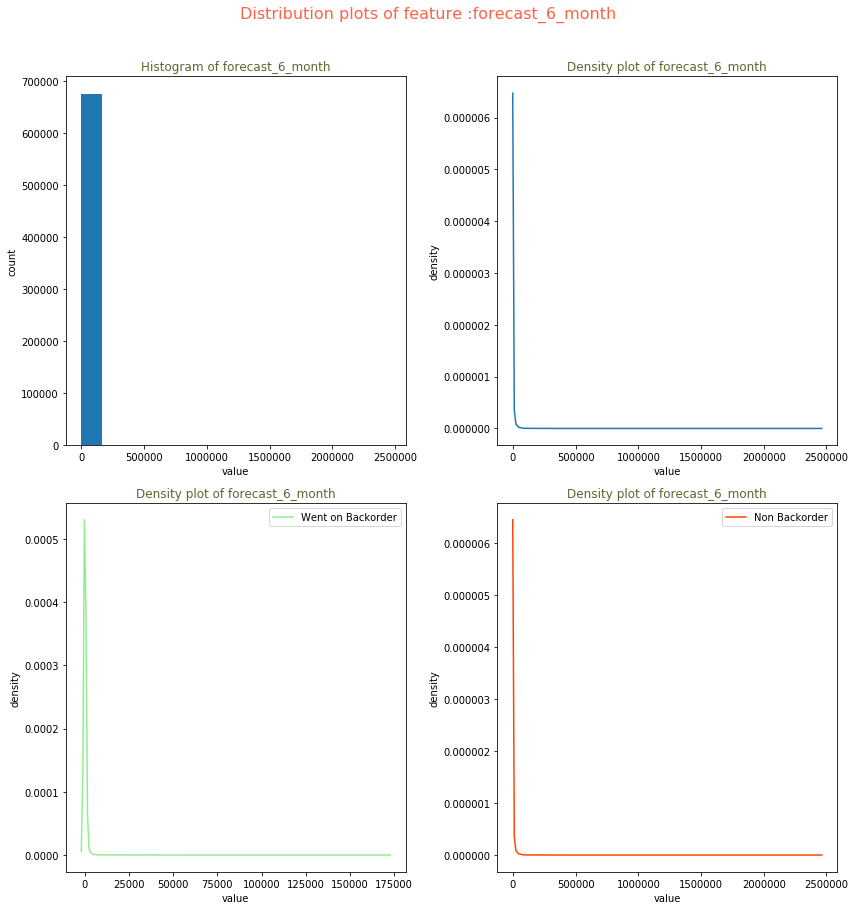

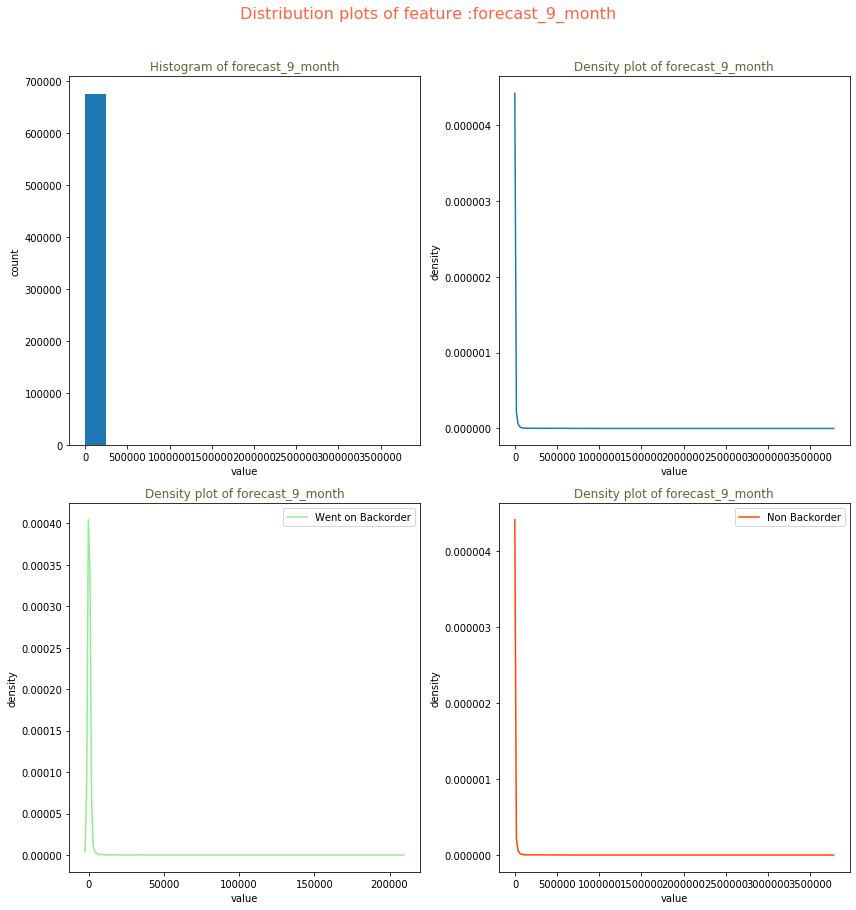

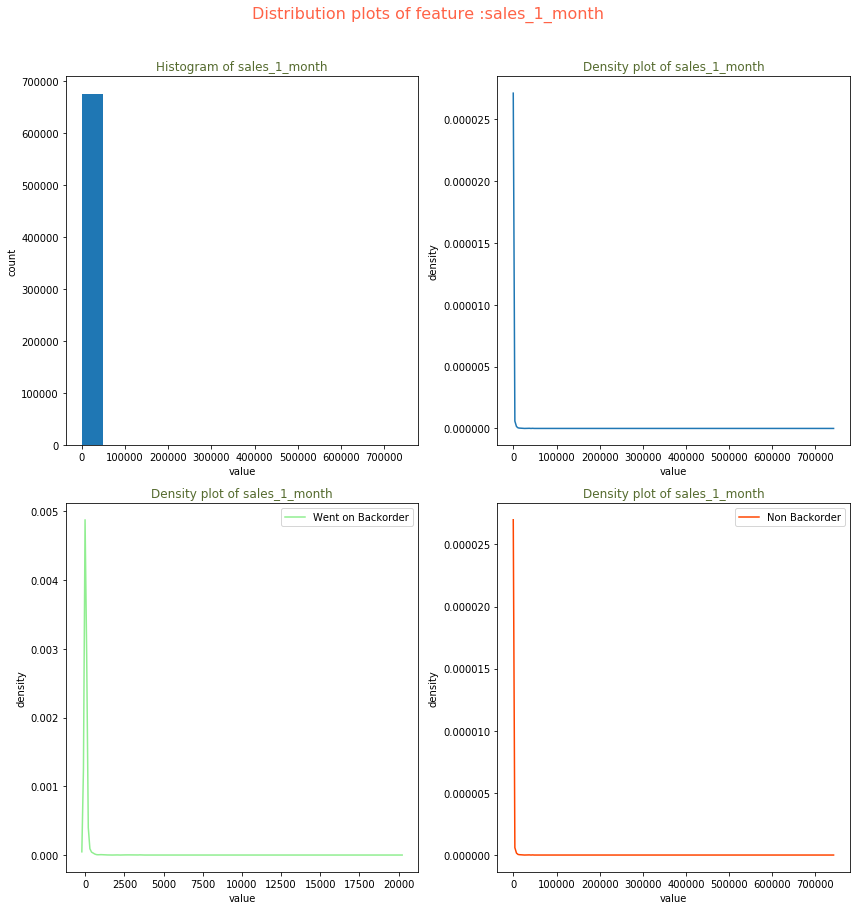

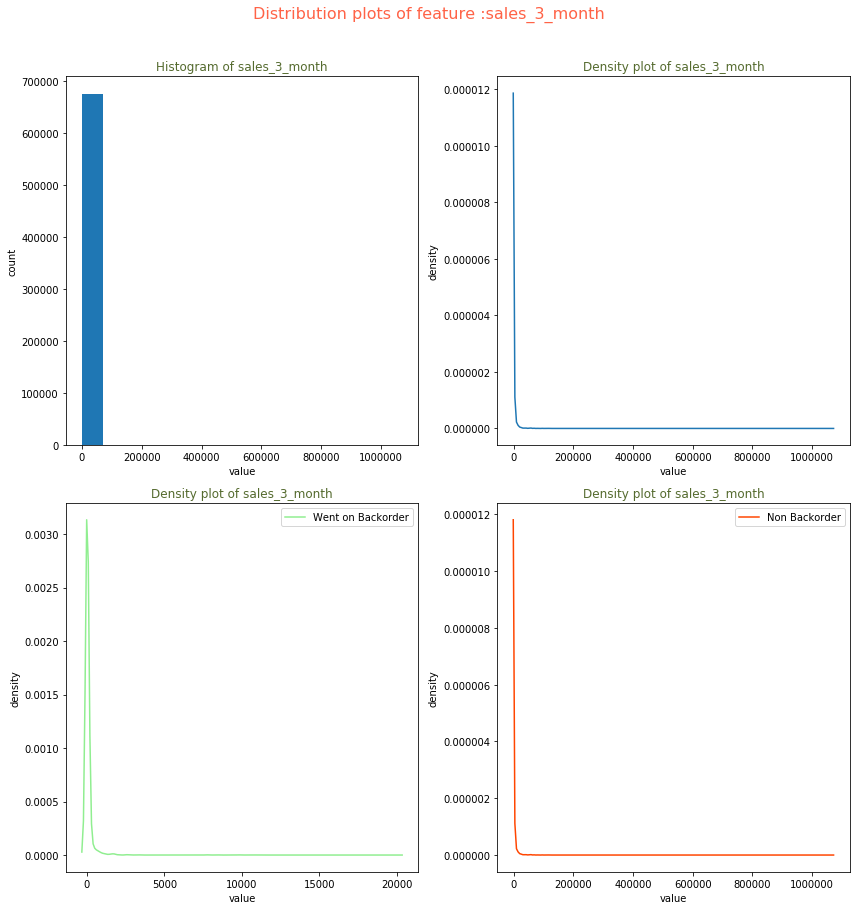

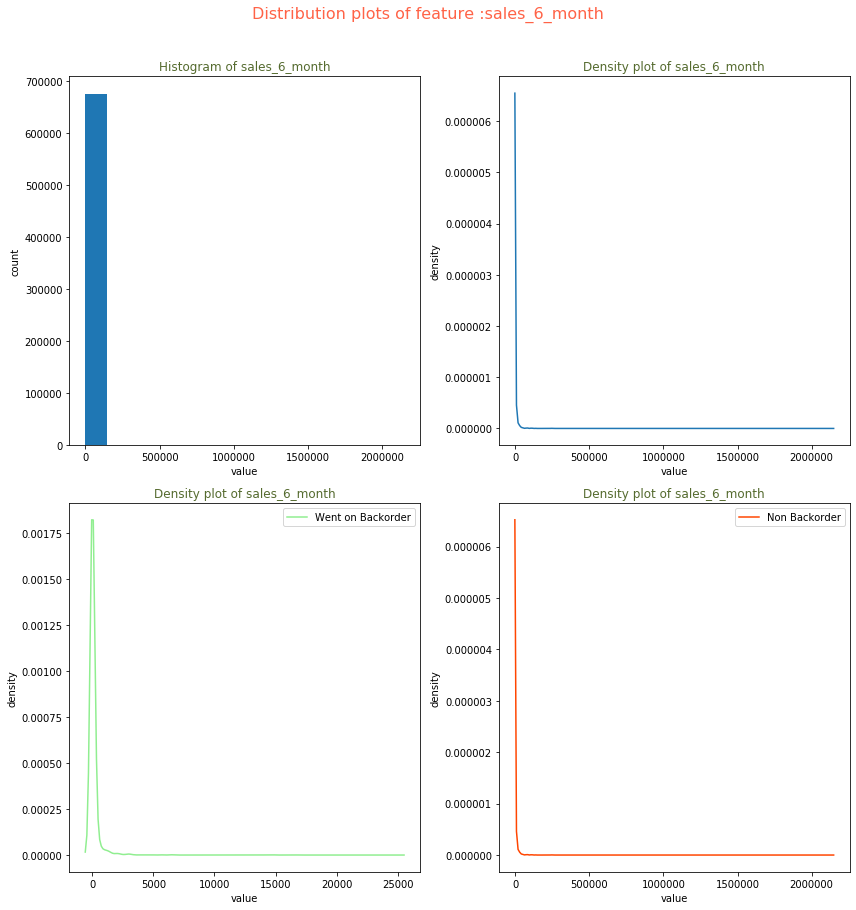

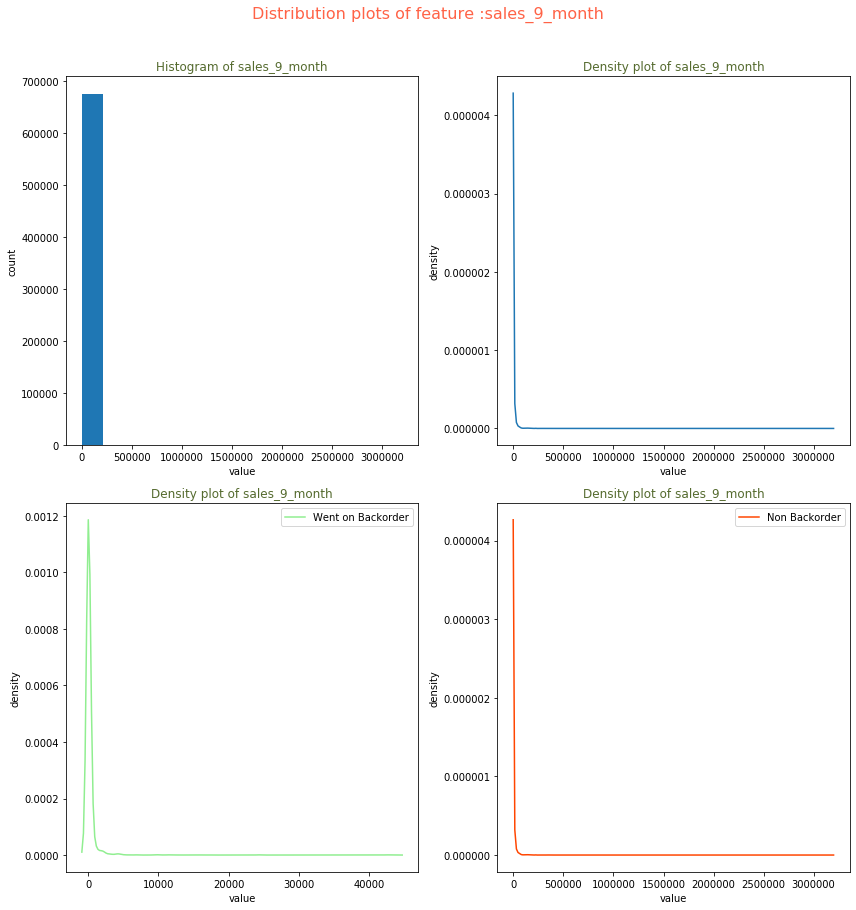

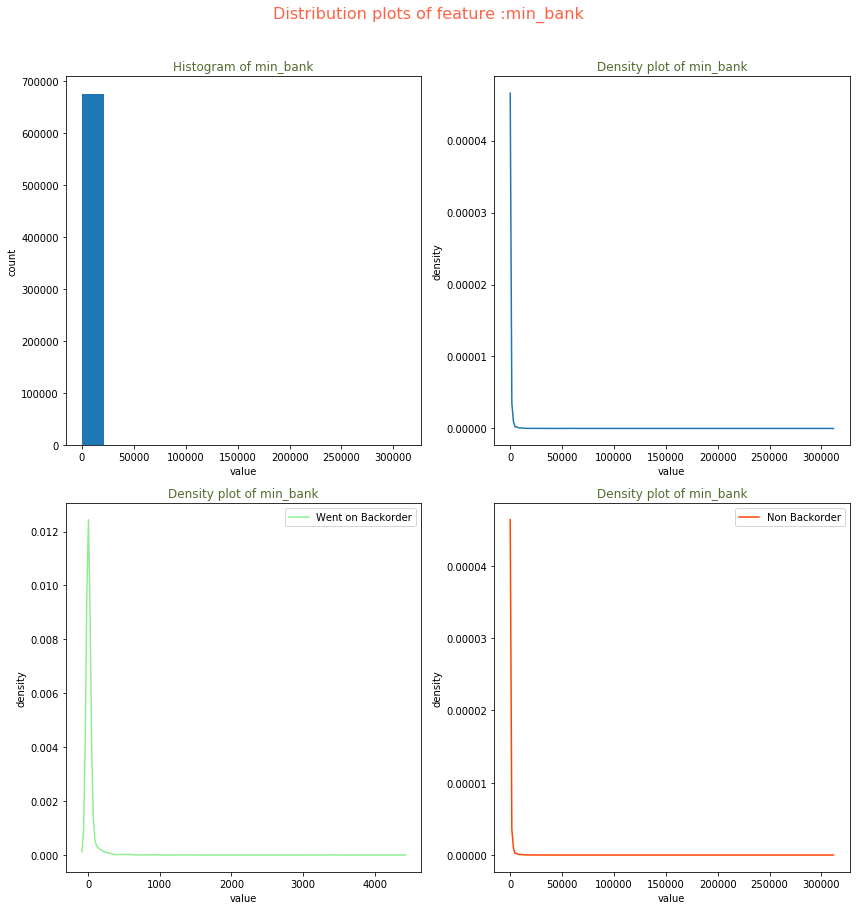

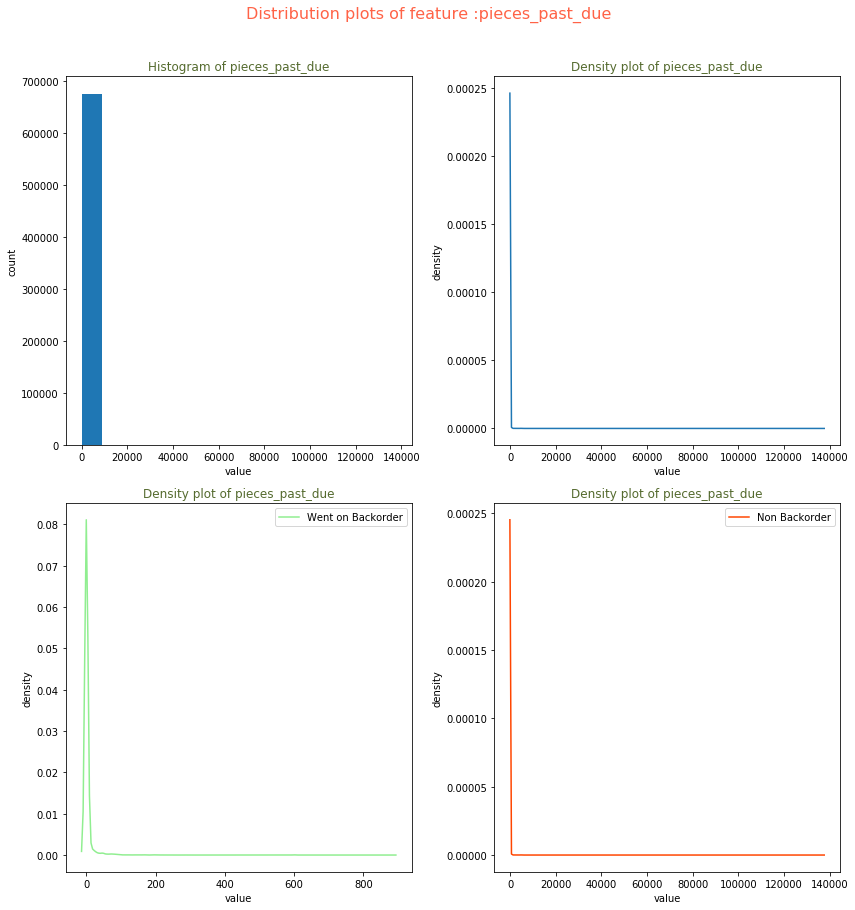

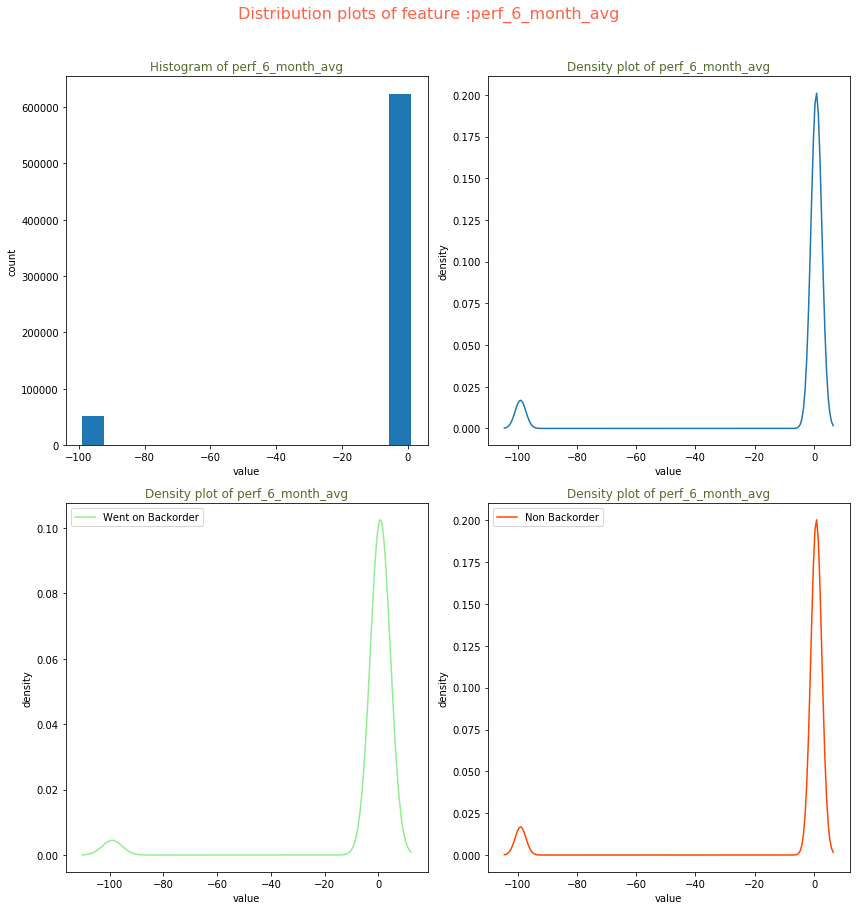

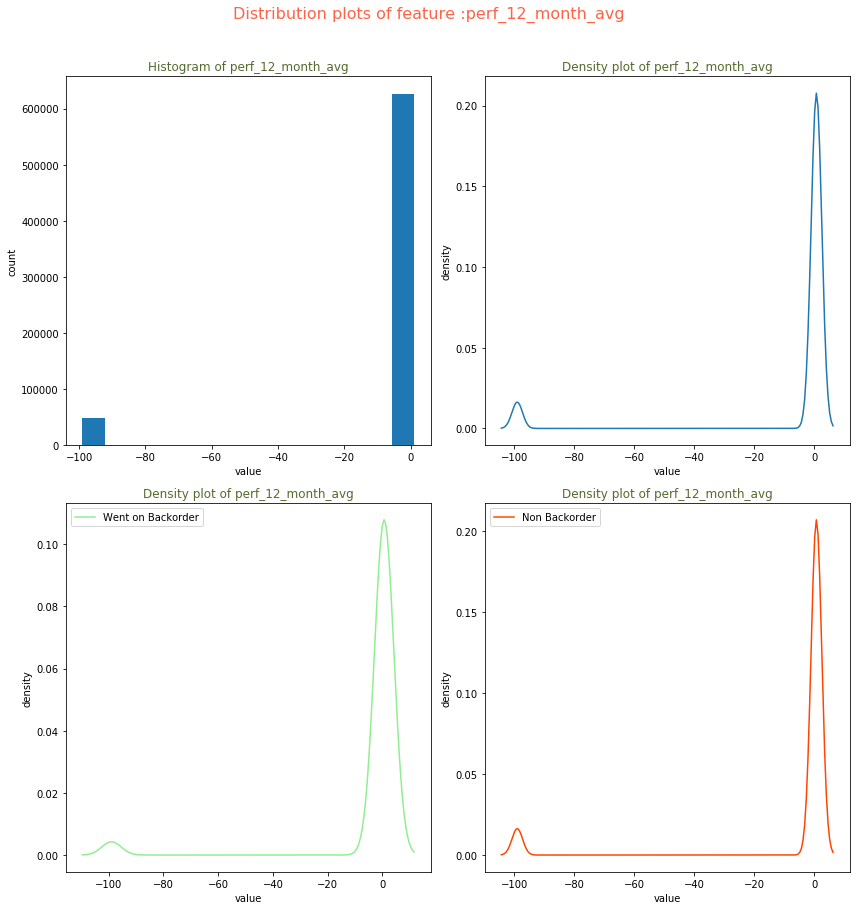

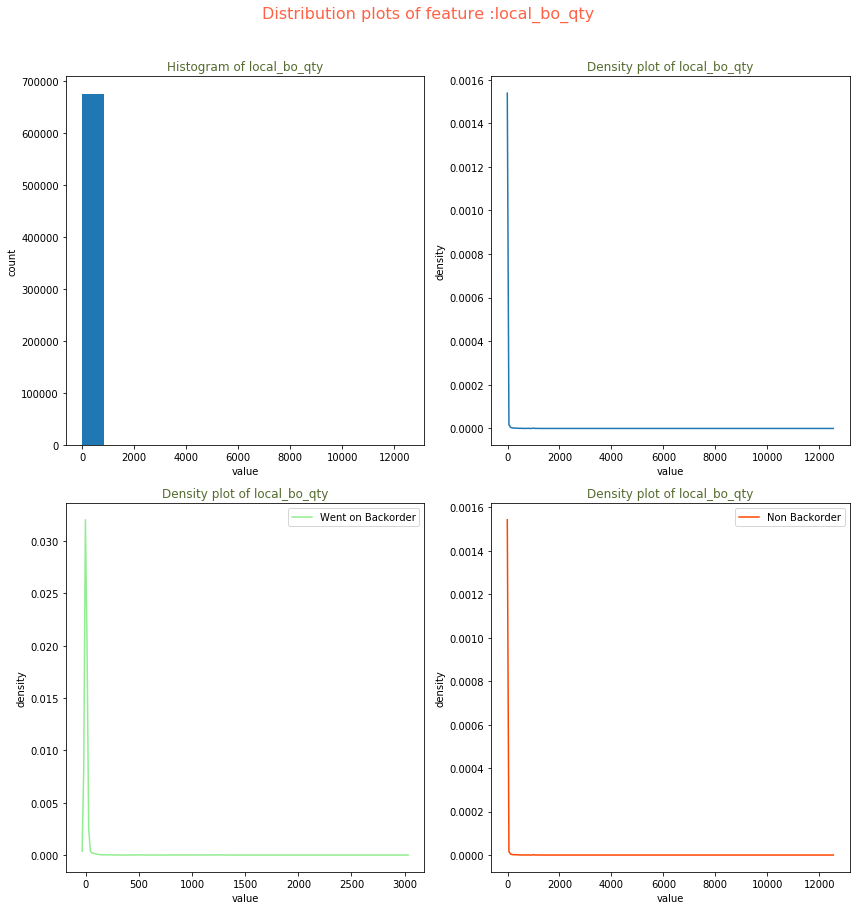

In [12]:
#lets get basic idea of data through distribution plots of each numerical feature

def plot_distributions(columns):
    
    '''plots distribution plots histogram and density plots for all numerical features'''
    
    for column in columns:
        plt.figure(figsize=(12,12))
        plt.subplot(2,2,1)
        plt.hist(train_df[column],bins = 15)
        plt.xlabel('value')
        plt.ylabel('count')
        plt.title('Histogram of '+column,color = 'darkolivegreen')

        plt.subplot(2,2,2)
        sns.kdeplot(train_df[column])
        plt.xlabel('value')
        plt.ylabel('density')
        plt.title('Density plot of '+column,color = 'darkolivegreen')

        plt.subplot(2,2,3)
        sns.kdeplot(train_df[train_df['went_on_backorder']=='Yes'][column],label = 'Went on Backorder',color = 'lightgreen')
        plt.xlabel('value')
        plt.ylabel('density')
        plt.title('Density plot of '+column,color = 'darkolivegreen')
        plt.legend()

        plt.subplot(2,2,4)
        sns.kdeplot(train_df[train_df['went_on_backorder']=='No'][column],label = 'Non Backorder',color = 'orangered')
        plt.xlabel('value')
        plt.ylabel('density')
        plt.title('Density plot of '+column,color = 'darkolivegreen')
        plt.legend()

        plt.tight_layout()
        plt.suptitle('Distribution plots of feature :'+column,color = 'tomato',fontsize = 16,y = 1.05)
        plt.show()
        
plot_distributions(train_df.select_dtypes(include='number').columns)

<h3>Observations:</h3>
-------------------------

<font color = 'green'>
<b>
<i>
 
    
- Feature SKU is unique code assigned to each product,so it wont't be a useful feature for the classification.
    
    
- Almost all the features are extemely skewed to the right with most of the values being present at the initial values.
  
    
- Based on the distribution plots of lead_time, we can conclude that it is a discrete variable with values between 0 and 52.
    
    
- There are some negative values in the distribution of product performance features which could be due to some error,further analysis on the feature can help understand better.
    
    
- For all the features, distributions of Backorder products and Non-Backorder products are similar,making us difficult to draw insights about backorder products.Difference in class distributions may have helped understand the data better.
    
</i>  
</b>
</font>

### 3.2.1  Analysis on feature: national_inv (Current Inventory level of component)

Current Inventory level of component refers to the amount of stock that is present at the retailer. 

In [13]:
print(train_df.national_inv.head().to_string())

1056262     5.0
1007643    42.0
430193     50.0
1398452     3.0
970501      2.0


In [14]:
print('No.of null values in the feature - train data :',train_df.national_inv.isnull().sum())

print('\n\nDescriptive Stastics of train data:')
print('-'*33,'\n')

print(train_df.national_inv.describe().astype(int).to_string())
print('Mode         ',train_df.national_inv.mode().values[0])
print('skewness  ',np.round(train_df.national_inv.skew(),2))
print('kurt    ',np.round(train_df.national_inv.kurtosis(),2))

No.of null values in the feature - train data : 0


Descriptive Stastics of train data:
--------------------------------- 

count      675144
mean          481
std         30067
min        -27256
25%             4
50%            15
75%            80
max      12324456
Mode          0.0
skewness   347.79
kurt     133515.56


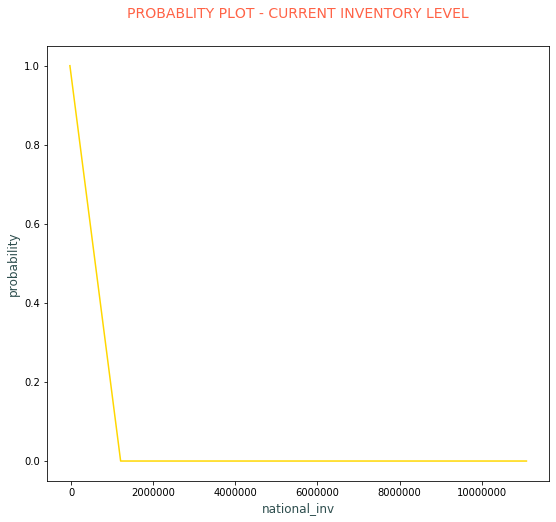

In [15]:
counts,bin_edges = np.histogram(train_df.national_inv)
pdf = counts/sum(counts)

plt.figure(figsize=(9,8))
plt.title('Probablity plot - Current Inventory Level'.upper(),fontdict={'fontsize':14},color='tomato',y=1.05)
plt.plot(bin_edges[:-1],pdf,color = 'gold')
plt.ticklabel_format(style = 'plain')
plt.xlabel('national_inv',fontdict={'fontsize':12},color='darkslategrey')
plt.ylabel('probability',fontdict={'fontsize':12},color='darkslategrey')
plt.show()


PERCENTILES ::
------------
0  percentile =  -27256 

10  percentile =  1 

20  percentile =  3 

30  percentile =  6 

40  percentile =  10 

50  percentile =  15 

60  percentile =  27 

70  percentile =  55 

80  percentile =  119 

90  percentile =  358 

100  percentile =  12324456 



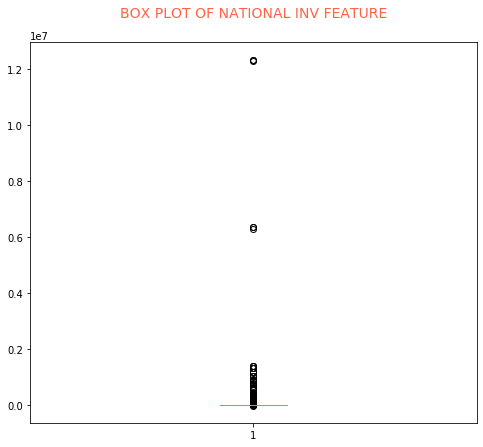

In [16]:
print('\nPERCENTILES ::')
print('-'*12)
percentiles = np.percentile(train_df.national_inv,range(0,110,10)).astype(int)
for i in range(0,11):
    print(i*10,' percentile = ',percentiles[i],'\n')

plt.figure(figsize=(8,7))
plt.boxplot(train_df.national_inv)
plt.title('Box plot of National Inv feature'.upper(),fontdict={'fontsize':14},color='tomato',y=1.05)
plt.show()

- From the above descriptive stastics of feature,plots and percentile values we can observe that data is extremely skewed to the right with most of values located in the intial values of the distribution.


- 90% of the products instock quantity is less than 360 units.


- If we observe the basic description of the feature we can find "MEAN = 481 units and MEDIAN = 15 units" which is due to skewness and indicates possible outliers in the feature.


- Distribution has Kurtosis value- 133515 which is extreme indicating outliers in data.


- Upon observing the min,25%le,50%le,75%le,max values  ,we can see there is a huge difference between 90%le(360) and max value(12324456) which supports the above points that the feature might have outliers.


- There are negative values in the data which might be due to some error because current stock of a product can't be a negative value.
        

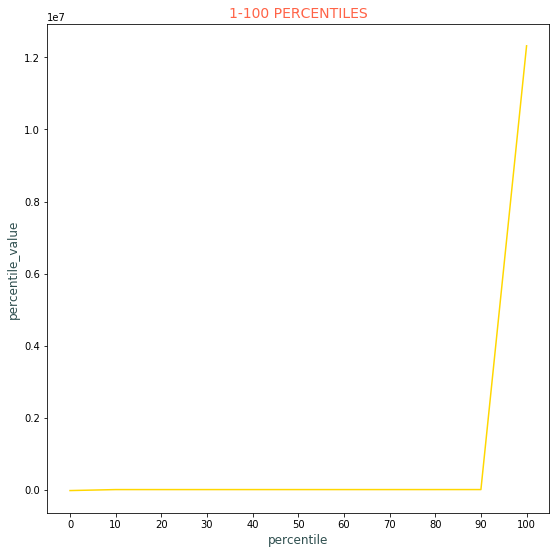

In [17]:
#plotting 1-100 percentiles
plt.figure(figsize=(9,9))
plt.plot(range(0,110,10),percentiles,color = 'gold')
plt.xlabel('percentile',fontdict={'fontsize':12},color='darkslategrey')
plt.xticks(list(range(0,110,10)),labels=list(range(0,110,10)))
plt.ylabel('percentile_value',fontdict={'fontsize':12},color='darkslategrey')
plt.title('1-100 PERCENTILES',fontdict={'fontsize':14},color='tomato')
plt.show()

    percentile  percentile_value
0            0            -27256
1            1                 0
2            2                 0
3            3                 0
4            4                 0
5            5                 0
6            6                 0
7            7                 1
8            8                 1
9            9                 1
10          10                 1


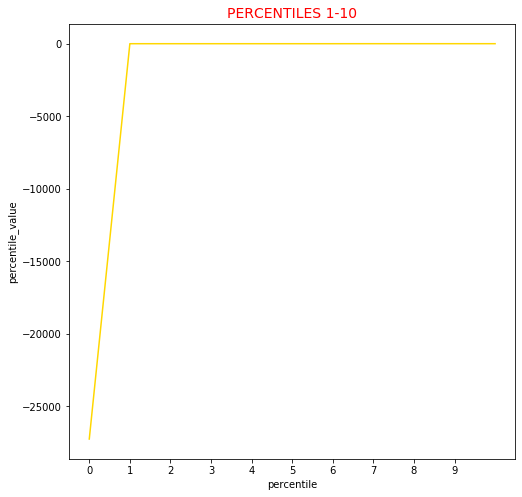

In [18]:
#lets first check the first 10 percentiles to check how many negative values are there in the data
percentiles0_10 = np.percentile(train_df.national_inv,range(0,11)).astype(int)

print(pd.DataFrame({'percentile':range(0,11),'percentile_value':percentiles0_10}))

plt.figure(figsize=(8,8))
plt.plot(percentiles0_10,color = 'gold')
plt.xlabel('percentile')
plt.ylabel('percentile_value')
plt.xticks(list(range(0,10)),labels=list(range(0,10)))
plt.title('PERCENTILES 1-10',fontdict={'fontsize':14},color='red',)
plt.show()


In [19]:
#converting negative values to positive values

neg_inv = train_df.national_inv[train_df.national_inv < 0]
print('No.of negative values in the feature:',len(neg_inv))

train_df['national_inv'] = train_df['national_inv'].abs()
print('No.of negative values in the feature after converting -ve to +ve:',len(train_df[train_df['national_inv']<0]['national_inv']))

No.of negative values in the feature: 2319
No.of negative values in the feature after converting -ve to +ve: 0


    percentile  percentile_values 90-100
0           90                       359
1           91                       417
2           92                       490
3           93                       578
4           94                       724
5           95                       926
6           96                      1234
7           97                      1830
8           98                      3041
9           99                      5443
10         100                  12324456


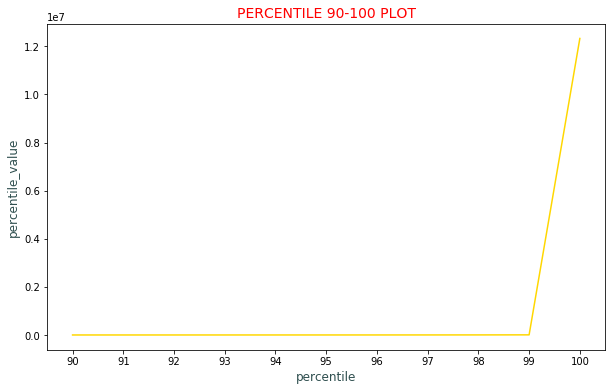

In [20]:
# lets see the values between 90-100 percentiles
percentiles90_100 = np.percentile(train_df.national_inv,range(90,101)).astype(int)
percentiles90_100_df = pd.DataFrame({'percentile':range(90,101),'percentile_values 90-100':percentiles90_100})
print(percentiles90_100_df)

plt.figure(figsize=(10,6))
plt.plot(percentiles90_100_df.percentile,percentiles90_100_df['percentile_values 90-100'],color = 'gold')
plt.xticks(ticks=range(90,101),labels=range(90,101))
plt.xlabel('percentile',fontdict={'fontsize':12},color='darkslategrey')
plt.ylabel('percentile_value',fontdict={'fontsize':12},color='darkslategrey')
plt.title('PERCENTILE 90-100 PLOT',fontdict={'fontsize':14},color='red')
plt.show()

- we can observe a sudden spike in the data after 99 percentile,so lets check the values greater than 99 percentile and see if we can find any outliers

In [21]:
#calculating percentile values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0,1,0.1):
    print(99+i,' percetile is: ',np.percentile(train_df.national_inv,99+i).astype(int))


99.0  percetile is:  5443
99.1  percetile is:  6070
99.2  percetile is:  6862
99.3  percetile is:  7907
99.4  percetile is:  9252
99.5  percetile is:  10896
99.6  percetile is:  13430
99.7  percetile is:  16796
99.8  percetile is:  23963
99.9  percetile is:  40800


- if we observe the percentile values between 99-100, the values seems to increase gradually without any sudden increment till 99.9%le but there is huge difference between 99.9%le(40800) and max value(12334404.0).


- Since we do not know what kind of business the data is about we can not make conclusions on how many units can be kept in stock.Considering the quantity of current-stock for most of the products,we will include all values that are less than 99%le for training.



In [22]:
#including the values that are less that 99%
train_df = train_df[train_df.national_inv < 5511]
print(train_df.shape)

(668476, 23)


In [23]:
#Descriptive stastics
Q1 = train_df.national_inv.quantile(0.25)
Q3 = train_df.national_inv.quantile(0.75)
IQR = Q3 - Q1

print('min::',train_df.national_inv.min())
print('max::',train_df.national_inv.max())
print('mean::',train_df.national_inv.mean())
print('mode::',train_df.national_inv.mode().values[0])
print('median::',train_df.national_inv.median())
print('skewness::',train_df.national_inv.skew())
print('kurtosis::',train_df.national_inv.kurtosis())
print('Inter quartile range is:::',IQR)

min:: 0.0
max:: 5510.0
mean:: 160.00896217665257
mode:: 0.0
median:: 14.0
skewness:: 6.1966453370413
kurtosis:: 44.43693785070528
Inter quartile range is::: 72.0


- The dataset is positive skewed with skewness = 6.20 and with fat tails having kurtosis = 44.43.


- Mode of the data is 0 indicating that the stock available for the products is mostly 0 units.


- Based on the values of IQR:72,mode,minimum value,skewness and % of current stock greater than 5000 units being 1%, we can say that the data might belong to a small scale business


- The frequent amount of stock that is held is mostly between 0 and 500 units per product which supports the above point.


- The distribution looks like an exponential distribution with most of the data skewed to the left.Running test like kl-divergence or ks-test and plotting qq-plot can help us determine whether this is true or not.

In [24]:
inv_backordered = train_df[train_df['went_on_backorder'] == 'Yes']['national_inv']
inv_not_backordered = train_df[train_df['went_on_backorder'] == 'No']['national_inv']

print('length of backorder data::',len(inv_backordered))
print('length of non-backorder data:',len(inv_not_backordered))

length of backorder data:: 4513
length of non-backorder data: 663963


In [25]:
print('DESCRIPTIVE STASTICS OF BACKORDERED ITEMS::')
print('-'*50)
print(inv_backordered.describe().astype(int).to_string())

print('\n')
print('DESCRIPTIVE STASTICS OF REGULAR ITEMS::')
print('-'*50)
print(inv_not_backordered.describe().astype(int).to_string())

print('\n')
print('Most frequnet no.of units in stock for backorderd items: ',inv_backordered.mode().values[0])
print('Most frequnet no.of units in stock for non-backorderd items: ',inv_not_backordered.mode().values[0])

DESCRIPTIVE STASTICS OF BACKORDERED ITEMS::
--------------------------------------------------
count    4513
mean       15
std        91
min         0
25%         0
50%         2
75%         7
max      2999


DESCRIPTIVE STASTICS OF REGULAR ITEMS::
--------------------------------------------------
count    663963
mean        160
std         531
min           0
25%           4
50%          15
75%          77
max        5510


Most frequnet no.of units in stock for backorderd items:  0.0
Most frequnet no.of units in stock for non-backorderd items:  2.0


In [26]:
print('\nBACKORDER ITEMS PERCENTILES VALUES  ::')
print('-'*40)
percentiles = np.percentile(inv_backordered,range(0,110,10)).astype(int)
for i in range(0,11):
    print(i*10,' percentile = ',percentiles[i],'\n')


BACKORDER ITEMS PERCENTILES VALUES  ::
----------------------------------------
0  percentile =  0 

10  percentile =  0 

20  percentile =  0 

30  percentile =  0 

40  percentile =  1 

50  percentile =  2 

60  percentile =  3 

70  percentile =  5 

80  percentile =  9 

90  percentile =  21 

100  percentile =  2999 



In [27]:
print('\nNON-BACKORDER ITEMS PERCENTILES VALUES  ::')
print('-'*40)
percentiles = np.percentile(inv_not_backordered,range(0,110,10)).astype(int)
for i in range(0,11):
    print(i*10,' percentile = ',percentiles[i],'\n')


NON-BACKORDER ITEMS PERCENTILES VALUES  ::
----------------------------------------
0  percentile =  0 

10  percentile =  2 

20  percentile =  3 

30  percentile =  6 

40  percentile =  10 

50  percentile =  15 

60  percentile =  27 

70  percentile =  53 

80  percentile =  112 

90  percentile =  319 

100  percentile =  5510 




- data is highly concentrated between 0-30 for the backordered data and between 0-500 for the non backorder data.

   
- both +ve class and -ve class distributions have min and max values closer.


- The important insights can be derived from the descriptive statistics: mode and percentile values,
   - mode of back order items is '0' and mode of non-backorder items is 2 units.
   - 30% of instock units are 0 for backorder items.
   - 50% of instock units are less than 2 units for backorder items, 50% of instock units are less than 15 units for non-backorder units.
   - 80% of instock units are below just 10 units for backorder items,only 40% of values are less than 10 for non-backorder products.
   - 90% of instock units are below 25 units for backorder items where as 90% falls below 320 units for non-backorder items.


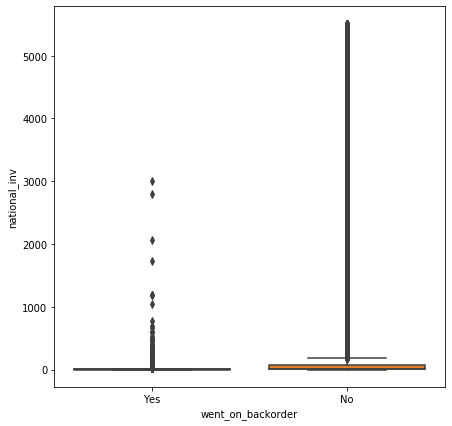

In [28]:
plt.figure(figsize=(7,7))
sns.boxplot(x="went_on_backorder", y="national_inv", data=train_df,order=["Yes", "No"])
plt.show()

- There is not much information we can gain from the boxplots except that there are few points in backorder items which seems to be outliers.


<h3>Observations:</h3>
-------------------------

<i>
<b>
    
<font color = 'green'>

Based on the above analysis we can say,

- The no.of units current-stock for the items backordered tend to be less than non-backordered items which makes sense as items go to backorder because of low instock units.


- Feature could be useful for classifying backordr products.

<h3> 3.2.2 Analysis on feature:Lead time (registered transit time)</h3>

Transit time is the total time it takes for goods to get from Point A to Point B.

In [29]:
print(train_df.lead_time.head().to_string())

1056262    12.0
1007643     2.0
430193      8.0
1398452     2.0
970501      4.0


In [30]:
train_df.lead_time.describe()

count    628602.000000
mean          7.852371
std           7.003339
min           0.000000
25%           4.000000
50%           8.000000
75%           9.000000
max          52.000000
Name: lead_time, dtype: float64

In [31]:
print('There are ',train_df['lead_time'].isnull().sum(),' null values in lead time\n')
print('*'*50)
print('\n',round((train_df['lead_time'].isna().sum()/train_df.shape[0])*100,2),'% of values in lead time are null values\n')

There are  39874  null values in lead time

**************************************************

 5.96 % of values in lead time are null values



In [32]:
backorder_leadtime = train_df[train_df['went_on_backorder'] == 'Yes']['lead_time']
nonbackorder_leadtime = train_df[train_df['went_on_backorder'] == 'No']['lead_time']
print('descriptive stats of backorder products:'.upper())
print('-'*40)
print(backorder_leadtime.describe().to_string())
print('\n')
print('descriptive stats of non-backorder products:'.upper())
print('-'*40)
print(nonbackorder_leadtime.describe().to_string())

DESCRIPTIVE STATS OF BACKORDER PRODUCTS:
----------------------------------------
count    4373.000000
mean        6.385319
std         4.276570
min         0.000000
25%         2.000000
50%         8.000000
75%         8.000000
max        52.000000


DESCRIPTIVE STATS OF NON-BACKORDER PRODUCTS:
----------------------------------------
count    624229.000000
mean          7.862648
std           7.017626
min           0.000000
25%           4.000000
50%           8.000000
75%           9.000000
max          52.000000


In [33]:
# imputing null values mode
train_df.fillna(train_df.lead_time.mode()[0],inplace=True)
print('No.of null values in Lead time:',train_df['lead_time'].isna().sum())

No.of null values in Lead time: 0


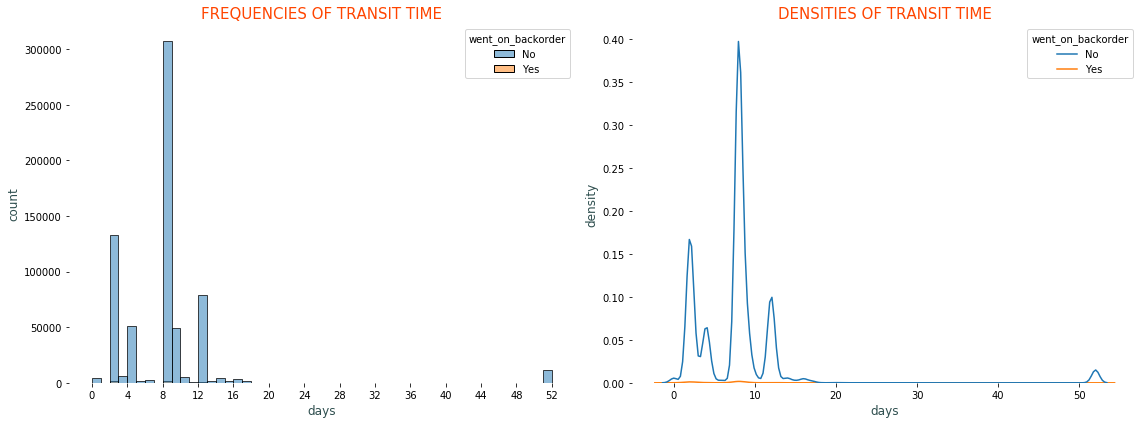

In [34]:
plt.figure(figsize=(16,6))
plt.subplot(121,frameon=False)
sns.histplot(data=train_df,x='lead_time',binwidth=1,bins=52,hue='went_on_backorder');
plt.title('Frequencies of transit time'.upper(),fontdict={'fontsize':15},color='orangered')
plt.xlabel('days',fontdict={'fontsize':12},color='darkslategrey')
plt.ylabel('count',fontdict={'fontsize':12},color='darkslategrey')
plt.xticks(range(0,55,4))


plt.subplot(122,frameon=False)
sns.kdeplot(data=train_df,x='lead_time',hue='went_on_backorder',);
plt.title('Densities of transit time'.upper(),fontdict={'fontsize':15},color='orangered')
plt.xlabel('days',fontdict={'fontsize':12},color='darkslategrey')
plt.ylabel('density',fontdict={'fontsize':12},color='darkslategrey')
plt.tight_layout()

plt.show()

In [35]:
print('DESCRIPTIVE STATS:')
print('-'*20)
print('Minimum Val:\t',train_df.lead_time.describe()['min'])
print('25%le Val:\t',train_df.lead_time.describe()['25%'])
print('50%le Val:\t',train_df.lead_time.describe()['50%'])
print('75%le Val:\t',train_df.lead_time.describe()['75%'])
print('Maximum Val:\t',train_df.lead_time.describe()['max'])
print('Mean:\t\t',np.round(train_df.lead_time.describe()['mean'],2))
print('Mode:\t\t',train_df.lead_time.mode().values[0])
print('Standard Dev:\t',np.round(train_df.lead_time.describe()['std'],2))
print('Skewness:\t',np.round(train_df.lead_time.skew(),2))
print('Kurtosis:\t',np.round(train_df.lead_time.kurtosis(),2))

DESCRIPTIVE STATS:
--------------------
Minimum Val:	 0.0
25%le Val:	 4.0
50%le Val:	 8.0
75%le Val:	 8.0
Maximum Val:	 52.0
Mean:		 7.86
Mode:		 8.0
Standard Dev:	 6.79
Skewness:	 4.71
Kurtosis:	 28.41


Percetile values 0-100:
-------------------------
0 %le:	 0.0
10 %le:	 2.0
20 %le:	 2.0
30 %le:	 8.0
40 %le:	 8.0
50 %le:	 8.0
60 %le:	 8.0
70 %le:	 8.0
80 %le:	 9.0
90 %le:	 12.0
100 %le:	 52.0


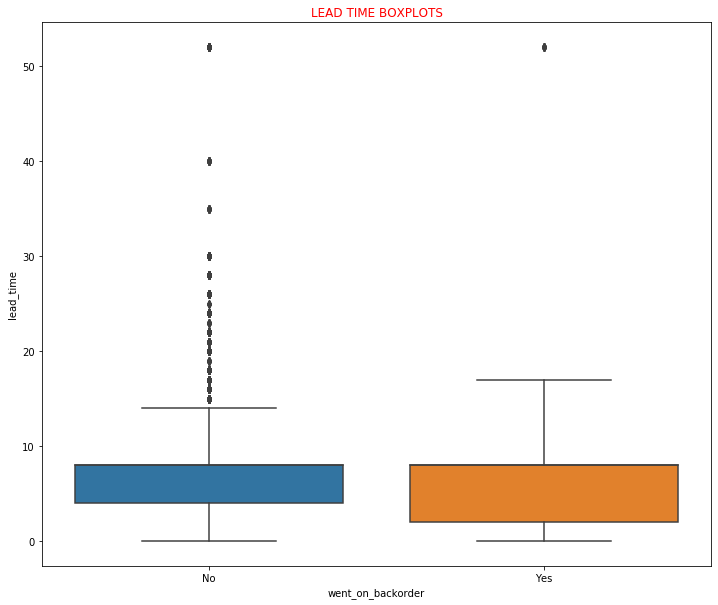

In [36]:
print('Percetile values 0-100:')
print('-'*25)
for i in range(0,110,10):
    print(i,'%le:\t',np.percentile(train_df.lead_time,i))
    
    
plt.figure(figsize=(12,10))
sns.boxplot(x="went_on_backorder", y="lead_time", data=train_df,order=["No", "Yes"])
plt.title('Lead time boxplots'.upper(),color='red')
plt.show()

                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 2.0 				 	 10 %le - 2.0
	 20 %le	- 2.0 				 	 20 %le - 2.0
	 30 %le	- 2.0 				 	 30 %le - 8.0
	 40 %le	- 8.0 				 	 40 %le - 8.0
	 50 %le	- 8.0 				 	 50 %le - 8.0
	 60 %le	- 8.0 				 	 60 %le - 8.0
	 70 %le	- 8.0 				 	 70 %le - 8.0
	 80 %le	- 8.0 				 	 80 %le - 9.0
	 90 %le	- 12.0 				 	 90 %le - 12.0
	 100 %le	- 52.0 		 	 100 %le - 52.0


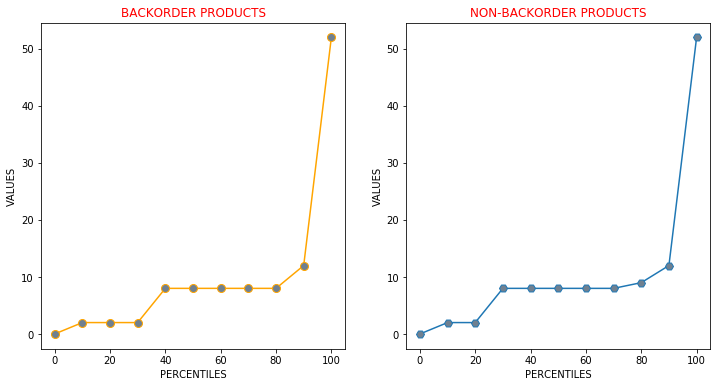

In [37]:
print(' '*20, 'Percentile Values of Both Classes')
print(' '*20,'-'*34,'\n\n')

print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
print('\t','-'*18,'\t'*4,'-'*23)
tabs = 4
for percentile in range(0,110,10):
    if percentile == 100:
        tabs -= 2
        
    print('\t',percentile,'%le\t-',np.percentile(train_df[train_df['went_on_backorder']=="Yes"]['lead_time'],percentile),'\t'*tabs,\
         '\t',percentile,'%le -',np.percentile(train_df[train_df['went_on_backorder']=="No"]['lead_time'],percentile))
    
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="Yes"]['lead_time'].quantile(np.array(list(range(0,110,10)))/100),color='orange',\
         marker = 'o',markersize=8,markerfacecolor='slategrey')
plt.title('BACKORDER PRODUCTS'.upper(),color = 'red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.subplot(122)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="No"]['lead_time'].quantile(np.array(list(range(0,110,10)))/100),\
         marker = 'H',markersize=8,markerfacecolor='slategrey')
plt.title('NON-BACKORDER PRODUCTS'.upper(),color = 'red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.show()

In [38]:
print(train_df.went_on_backorder[train_df['lead_time'] > 50].value_counts().to_string())

No     11671
Yes       12


<h3>Observations:</h3>
-------------------------

<i>
<b>
    
<font color = 'green'>

- Distributions of both backorder and non-backorder product's lead time are similar with most of the products lead time being 2,8,12 days.


- The maximum no.of days taken to deliver a product from manufacturer to retailer is 52 days,when looking at the class label of the items with 52 days transit time there are 12 items that got back ordered.But in reality no customer will wait for 52 days for their ordered product to be arrived.So the items with lead time 52 days could be outliers in case of back ordered items.


- Probability of a product being delivered to the retailer in 2 days is slighlty higher for backorder products.


- There is no clear seperation of data between the two classes.

<h3> 3.2.3 Analysis on feature: In transit quantity </h3>

No.of units that are in transport

In [39]:
print(train_df.in_transit_qty.head().to_string())

1056262     0.0
1007643    22.0
430193      0.0
1398452     0.0
970501      0.0


In [40]:
print('DESCRIPTIVE STATS:')
print('-'*20,'\n')
print(train_df.in_transit_qty.describe().round(2).to_string())
print('Skew     ',round(train_df.in_transit_qty.skew(),2))
print('Kurt     ',round(train_df.in_transit_qty.kurtosis(),2))

DESCRIPTIVE STATS:
-------------------- 

count    668476.00
mean         22.22
std         292.56
min           0.00
25%           0.00
50%           0.00
75%           0.00
max      110092.00
Skew      158.92
Kurt      44214.05


			 Backorder Products:
			 ------------------
	 	 	  0 %le	- 0.0
	 	 	  10 %le	- 0.0
	 	 	  20 %le	- 0.0
	 	 	  30 %le	- 0.0
	 	 	  40 %le	- 0.0
	 	 	  50 %le	- 0.0
	 	 	  60 %le	- 0.0
	 	 	  70 %le	- 0.0
	 	 	  80 %le	- 1.0
	 	 	  90 %le	- 15.0
	 	 	  100 %le	- 110092.0


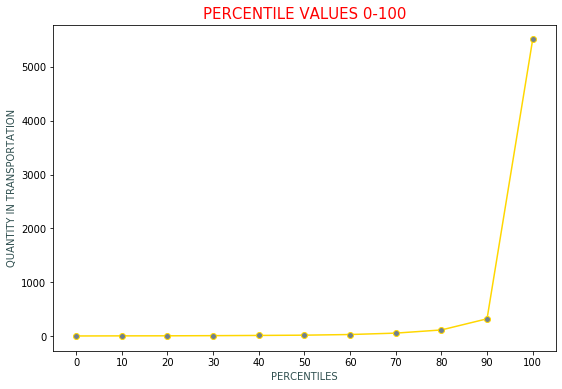

In [41]:
print(3*'\t','Backorder Products:')
print(3*'\t','-'*18,)
tabs = 4
for percentile in range(0,110,10):
        
    print(3*'\t ',percentile,'%le\t-',np.percentile(train_df['in_transit_qty'],percentile))
    
    
plt.figure(figsize=(9,6))
plt.plot(range(0,110,10),percentiles,color = 'gold',marker = 'o',markerfacecolor='slategrey')
plt.xticks(range(0,110,10))
plt.xlabel('percentiles'.upper(),color = 'darkslategrey')
plt.ylabel('quantity in transportation'.upper(),color = 'darkslategrey')
plt.title('Percentile Values 0-100'.upper(),fontdict={'fontsize':15},color = 'red')
plt.show()

			 Percentiles from 70-81:
			 -------------------------
			 	 70 %le- 0.0
			 	 71 %le- 0.0
			 	 72 %le- 0.0
			 	 73 %le- 0.0
			 	 74 %le- 0.0
			 	 75 %le- 0.0
			 	 76 %le- 0.0
			 	 77 %le- 0.0
			 	 78 %le- 0.0
			 	 79 %le- 0.0
			 	 80 %le- 1.0
			 	 81 %le- 1.0
			 	 82 %le- 1.0
			 	 83 %le- 2.0
			 	 84 %le- 3.0
			 	 85 %le- 4.0
			 	 86 %le- 5.0
			 	 87 %le- 7.0
			 	 88 %le- 9.0
			 	 89 %le- 12.0
			 	 90 %le- 15.0
			 	 91 %le- 20.0
			 	 92 %le- 25.0
			 	 93 %le- 33.0
			 	 94 %le- 45.0
			 	 95 %le- 61.0
			 	 96 %le- 88.0
			 	 97 %le- 131.0
			 	 98 %le- 220.0
			 	 99 %le- 459.0
			 	 100 %le- 110092.0


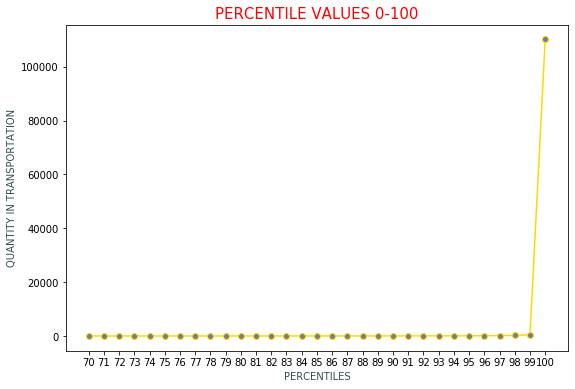

In [42]:
print(3*'\t','Percentiles from 70-81:')
print(3*'\t','-'*25)
percentiles = []
for i in range(70,101):
    print(3*'\t','\t',i,'%le-',np.percentile(train_df.in_transit_qty,i))
    percentiles.append(np.percentile(train_df.in_transit_qty,i))
    
plt.figure(figsize=(9,6))
plt.plot(range(70,101),percentiles,color = 'gold',marker = 'o',markerfacecolor='slategrey')
plt.xticks(range(70,101))
plt.xlabel('percentiles'.upper(),color = 'darkslategrey')
plt.ylabel('quantity in transportation'.upper(),color = 'darkslategrey')
plt.title('Percentile Values 0-100'.upper(),fontdict={'fontsize':15},color = 'red')
plt.show()   

- 80% of the products doesn't have any quantity in transit.


- 99% of data is concentrated between the values 0 and 450,as like other features there is a spike after the 99% value.





In [43]:
# removing the values greater than 450
train_df = train_df[train_df['in_transit_qty']<=450]

In [44]:
print(train_df.in_transit_qty.describe().round(2).to_string())
print('Skew        ',round(train_df.in_transit_qty.skew(),2))
print('Kurt       ',round(train_df.in_transit_qty.kurtosis(),2))

count    661690.00
mean          8.82
std          38.47
min           0.00
25%           0.00
50%           0.00
75%           0.00
max         450.00
Skew         6.68
Kurt        51.81


                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 0.0 				 	 10 %le - 0.0
	 20 %le	- 0.0 				 	 20 %le - 0.0
	 30 %le	- 0.0 				 	 30 %le - 0.0
	 40 %le	- 0.0 				 	 40 %le - 0.0
	 50 %le	- 0.0 				 	 50 %le - 0.0
	 60 %le	- 0.0 				 	 60 %le - 0.0
	 70 %le	- 0.0 				 	 70 %le - 0.0
	 80 %le	- 0.0 				 	 80 %le - 0.0
	 90 %le	- 1.0 				 	 90 %le - 12.0
	 100 %le	- 399.0 		 	 100 %le - 450.0


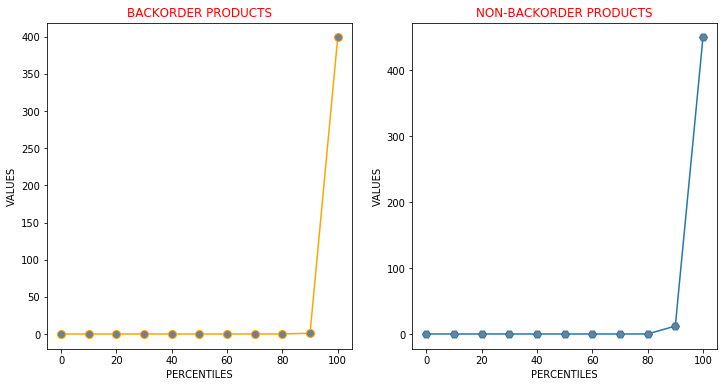

In [45]:
print(' '*20, 'Percentile Values of Both Classes')
print(' '*20,'-'*34,'\n\n')

print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
print('\t','-'*18,'\t'*4,'-'*23)
tabs = 4
for percentile in range(0,110,10):
    if percentile == 100:
        tabs -= 2
        
    print('\t',percentile,'%le\t-',np.percentile(train_df[train_df['went_on_backorder']=="Yes"]['in_transit_qty'],percentile),'\t'*tabs,\
         '\t',percentile,'%le -',np.percentile(train_df[train_df['went_on_backorder']=="No"]['in_transit_qty'],percentile))
    
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="Yes"]['in_transit_qty'].quantile(np.array(list(range(0,110,10)))/100),color='orange',\
         marker = 'o',markersize=8,markerfacecolor='slategrey')
plt.title('BACKORDER PRODUCTS'.upper(),color = 'red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.subplot(122)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="No"]['in_transit_qty'].quantile(np.array(list(range(0,110,10)))/100),\
         marker = 'H',markersize=8,markerfacecolor='slategrey')
plt.title('NON-BACKORDER PRODUCTS'.upper(),color = 'red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.show()

                     Percentile Values of Both Classes 90-100
                     ---------------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 90 %le	- 1.0 				 	 90 %le - 12.0
	 91 %le	- 2.0 				 	 91 %le - 15.0
	 92 %le	- 3.0 				 	 92 %le - 20.0
	 93 %le	- 4.0 				 	 93 %le - 26.0
	 94 %le	- 6.0 				 	 94 %le - 34.0
	 95 %le	- 8.0 				 	 95 %le - 46.0
	 96 %le	- 10.760000000000218 				 	 96 %le - 62.0
	 97 %le	- 17.81999999999971 				 	 97 %le - 89.0
	 98 %le	- 31.88000000000011 				 	 98 %le - 132.0
	 99 %le	- 63.0 				 	 99 %le - 220.0
	 100 %le	- 399.0 		 	 100 %le - 450.0


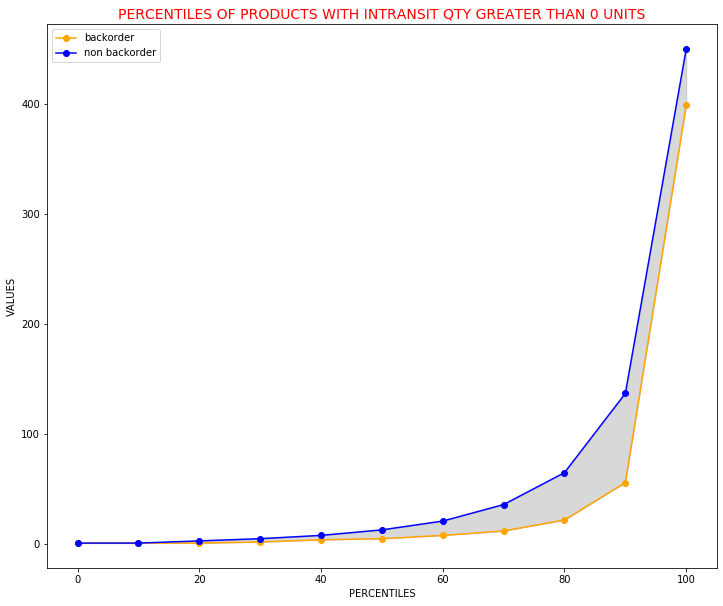

In [46]:
print(' '*20, 'Percentile Values of Both Classes 90-100')
print(' '*20,'-'*40,'\n\n')

print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
print('\t','-'*18,'\t'*4,'-'*23)
tabs = 4
for percentile in range(90,101):
    if percentile == 100:
        tabs -= 2
        
    print('\t',percentile,'%le\t-',np.percentile(train_df[train_df['went_on_backorder']=="Yes"]['in_transit_qty'],percentile),'\t'*tabs,\
         '\t',percentile,'%le -',np.percentile(train_df[train_df['went_on_backorder']=="No"]['in_transit_qty'],percentile))
    
    
    
backorder_products = train_df.in_transit_qty[(train_df['in_transit_qty']>0) & (train_df['went_on_backorder'] == 'Yes')]
non_backorder_products = train_df.in_transit_qty[(train_df['in_transit_qty']>0) & (train_df['went_on_backorder'] == 'No')]

percentiles_backorderedProducts = []
percentiles_nonbackorderedProducts = []

for i in range(0,110,10):
    percentiles_backorderedProducts.append(np.percentile(backorder_products,i))
    percentiles_nonbackorderedProducts.append(np.percentile(non_backorder_products,i))
    
    
plt.figure(figsize=(12,10))
plt.plot(range(0,110,10),percentiles_backorderedProducts,'-o',label = 'backorder',color = 'orange')
plt.plot(range(0,110,10),percentiles_nonbackorderedProducts,'-o',label='non backorder',color = 'blue')
plt.xlabel('percentiles'.upper())
plt.ylabel('values'.upper())
plt.fill_between(range(0,110,10),percentiles_backorderedProducts, percentiles_nonbackorderedProducts, color='grey', alpha='0.3')
plt.title('Percentiles of products with intransit qty greater than 0 units'.upper(),fontdict={'fontsize':14},color = 'red')
plt.legend()
plt.show()

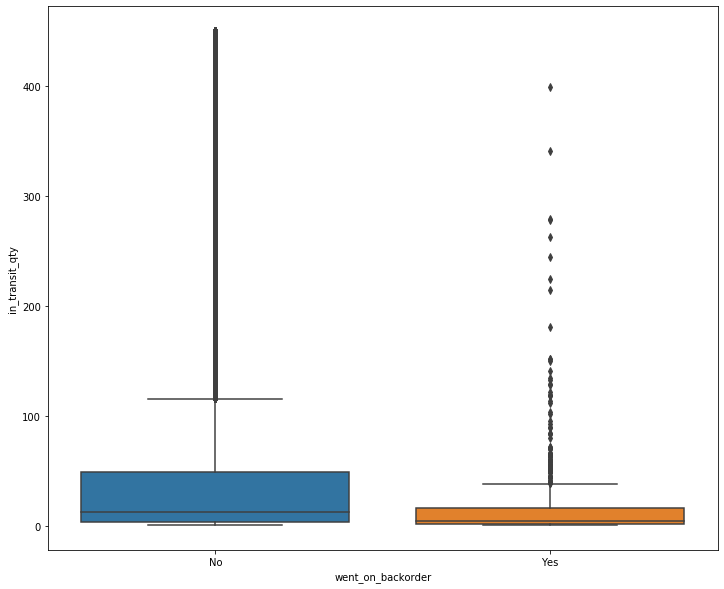

In [47]:
plt.figure(figsize=(12,10))
sns.boxplot(data = train_df[train_df['in_transit_qty']>=1],y = 'in_transit_qty',x = 'went_on_backorder', order=["No", "Yes"]);

<h3>Observations:</h3>
------------------------

<i>
<b>
    
<font color = 'green'>

    
- From the above plots and percentile values we can see that most of the product's in transit quantity is 0 and only 20 % of the products have in transit qunatity atleast 1 unit.


- There is a difference in the values of backorder and non-backorder products for values greater than 1,backorder products have higher intransit quantity.

</font>
</b>
</i>

<h3>3.2.4 Analysis on feature Forecast sales for the next 3, 6 and 9 months</h3>

In [48]:
train_df[['forecast_3_month','forecast_6_month','forecast_9_month']].head()

forecast_3_month  forecast_6_month  forecast_9_month
1056262               0.0               6.0               6.0
1007643              13.0              45.0              75.0
430193                0.0               0.0               0.0
1398452               0.0               0.0               0.0
970501                0.0               0.0               0.0

In [49]:
train_df[['forecast_3_month','forecast_6_month','forecast_9_month']].describe()

forecast_3_month  forecast_6_month  forecast_9_month
count     661690.000000     661690.000000      6.616900e+05
mean          60.721524        111.079710      1.604512e+02
std         1329.246253       2142.839721      2.746261e+03
min            0.000000          0.000000      0.000000e+00
25%            0.000000          0.000000      0.000000e+00
50%            0.000000          0.000000      0.000000e+00
75%            4.000000         10.000000      1.800000e+01
max       490752.000000     843264.000000      1.050624e+06

In [50]:
print('Skewness:')
print('-'*15)
print(train_df[['forecast_3_month','forecast_6_month','forecast_9_month']].skew().to_string())

print('\nKurtosis:')
print('-'*15)
print(train_df[['forecast_3_month','forecast_6_month','forecast_9_month']].kurtosis().to_string())

Skewness:
---------------
forecast_3_month    207.050033
forecast_6_month    214.045573
forecast_9_month    210.190231

Kurtosis:
---------------
forecast_3_month    54343.278258
forecast_6_month    60017.750508
forecast_9_month    58740.972176


PERCENTILE VALUES OF FORECAST SALES FOR 3 MONTHS
------------------------------
0 %le: 0.0
10 %le: 0.0
20 %le: 0.0
30 %le: 0.0
40 %le: 0.0
50 %le: 0.0
60 %le: 0.0
70 %le: 0.0
80 %le: 10.0
90 %le: 66.0
100 %le: 490752.0

PERCENTILE VALUES OF FORECAST SALES FOR 6 MONTHS
------------------------------
0 %le: 0.0
10 %le: 0.0
20 %le: 0.0
30 %le: 0.0
40 %le: 0.0
50 %le: 0.0
60 %le: 0.0
70 %le: 4.0
80 %le: 24.0
90 %le: 140.0
100 %le: 843264.0

PERCENTILE VALUES OF FORECAST SALES FOR 9 MONTHS
------------------------------
0 %le: 0.0
10 %le: 0.0
20 %le: 0.0
30 %le: 0.0
40 %le: 0.0
50 %le: 0.0
60 %le: 0.0
70 %le: 7.0
80 %le: 40.0
90 %le: 212.0
100 %le: 1050624.0


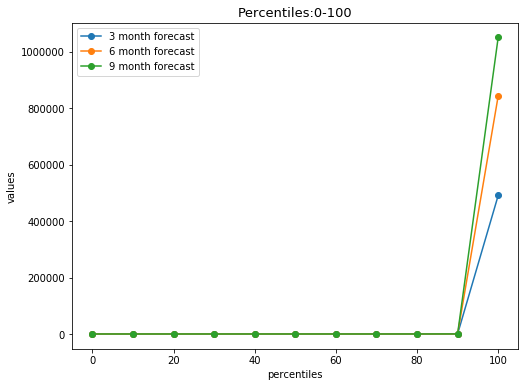

In [51]:
print('percentile values of forecast sales for 3 months'.upper())
print('-'*30)
percentiles_3months_forecast = []
for i in range(0,110,10):
    print(i,'%le:',np.percentile(train_df['forecast_3_month'],i))
    percentiles_3months_forecast.append(np.percentile(train_df['forecast_3_month'],i))

print('\npercentile values of forecast sales for 6 months'.upper())
print('-'*30)
percentiles_6months_forecast = []
for i in range(0,110,10):
    print(i,'%le:',np.percentile(train_df['forecast_6_month'],i))
    percentiles_6months_forecast.append(np.percentile(train_df['forecast_6_month'],i))
    
    
print('\npercentile values of forecast sales for 9 months'.upper())
print('-'*30)
percentiles_9months_forecast = []
for i in range(0,110,10):
    print(i,'%le:',np.percentile(train_df['forecast_9_month'],i))
    percentiles_9months_forecast.append(np.percentile(train_df['forecast_9_month'],i))
    
plt.figure(figsize=(8,6))
plt.plot(range(0,110,10),percentiles_3months_forecast,label = '3 month forecast',marker = 'o')
plt.plot(range(0,110,10),percentiles_6months_forecast,label = '6 month forecast',marker = 'o')
plt.plot(range(0,110,10),percentiles_9months_forecast,label = '9 month forecast',marker = 'o')
plt.title('Percentiles:0-100',fontdict={'fontsize': 13})
plt.xlabel('percentiles')
plt.ylabel('values')
plt.legend()
plt.show()


In [52]:
print('90-100 percentile values of forecast sales for 3 months'.upper())
print('-'*30)

for i in range(90,101):
    print(i,'%le:',np.percentile(train_df['forecast_3_month'],i))
    

90-100 PERCENTILE VALUES OF FORECAST SALES FOR 3 MONTHS
------------------------------
90 %le: 66.0
91 %le: 82.0
92 %le: 100.0
93 %le: 128.0
94 %le: 169.0
95 %le: 220.0
96 %le: 300.0
97 %le: 417.0
98 %le: 616.0
99 %le: 1095.0
100 %le: 490752.0


In [53]:
print('\n90-100 percentile values of forecast sales for 6 months'.upper())
print('-'*30)

for i in range(90,101):
    print(i,'%le:',np.percentile(train_df['forecast_6_month'],i))
    


90-100 PERCENTILE VALUES OF FORECAST SALES FOR 6 MONTHS
------------------------------
90 %le: 140.0
91 %le: 172.0
92 %le: 208.88000000000466
93 %le: 260.0
94 %le: 333.0
95 %le: 432.0
96 %le: 575.0
97 %le: 800.0
98 %le: 1184.0
99 %le: 2016.0
100 %le: 843264.0


In [54]:
print('\n90-100 percentile values of forecast sales for 9 months'.upper())
print('-'*30)

for i in range(90,101):
    print(i,'%le:',np.percentile(train_df['forecast_9_month'],i))


90-100 PERCENTILE VALUES OF FORECAST SALES FOR 9 MONTHS
------------------------------
90 %le: 212.0
91 %le: 256.0
92 %le: 313.0
93 %le: 400.0
94 %le: 500.0
95 %le: 640.0
96 %le: 855.0
97 %le: 1176.0
98 %le: 1750.0
99 %le: 3000.0
100 %le: 1050624.0


In [55]:
print('No.of values greater than 99%le in 3 month forecast: ',train_df[train_df['forecast_3_month']>np.percentile(train_df['forecast_3_month'],99)].shape[0])
print('No.of values greater than 99%le in 6 month forecast: ',train_df[train_df['forecast_6_month']>np.percentile(train_df['forecast_6_month'],99)].shape[0])
print('No.of values greater than 99%le in 9 month forecast: ',train_df[train_df['forecast_9_month']>np.percentile(train_df['forecast_9_month'],99)].shape[0])

No.of values greater than 99%le in 3 month forecast:  6616
No.of values greater than 99%le in 6 month forecast:  6604
No.of values greater than 99%le in 9 month forecast:  6407


In [56]:
#consodering the values less than 99%le

print('shape of data before removing extreme values :',train_df.shape)
train_df = train_df[train_df['forecast_3_month']<np.percentile(train_df['forecast_3_month'],99)]
train_df = train_df[train_df['forecast_6_month']<np.percentile(train_df['forecast_6_month'],99)]
train_df = train_df[train_df['forecast_9_month']<np.percentile(train_df['forecast_9_month'],99)]
print('shape of data after removing extreme values :',train_df.shape)

shape of data before removing extreme values : (661690, 23)
shape of data after removing extreme values : (642022, 23)


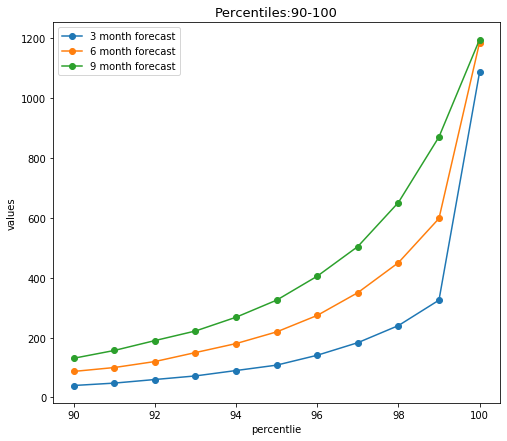

In [57]:
plt.figure(figsize=(8,7))
plt.plot(range(90,101),[np.percentile(train_df['forecast_3_month'],i) for i in range(90,101)],marker = 'o',label = '3 month forecast')
plt.plot(range(90,101),[np.percentile(train_df['forecast_6_month'],i) for i in range(90,101)],marker = 'o',label = '6 month forecast')
plt.plot(range(90,101),[np.percentile(train_df['forecast_9_month'],i) for i in range(90,101)],marker = 'o',label = '9 month forecast')
plt.xlabel('percentlie')
plt.ylabel('values')
plt.title('Percentiles:90-100',fontdict={'fontsize':13})
plt.legend()
plt.show()

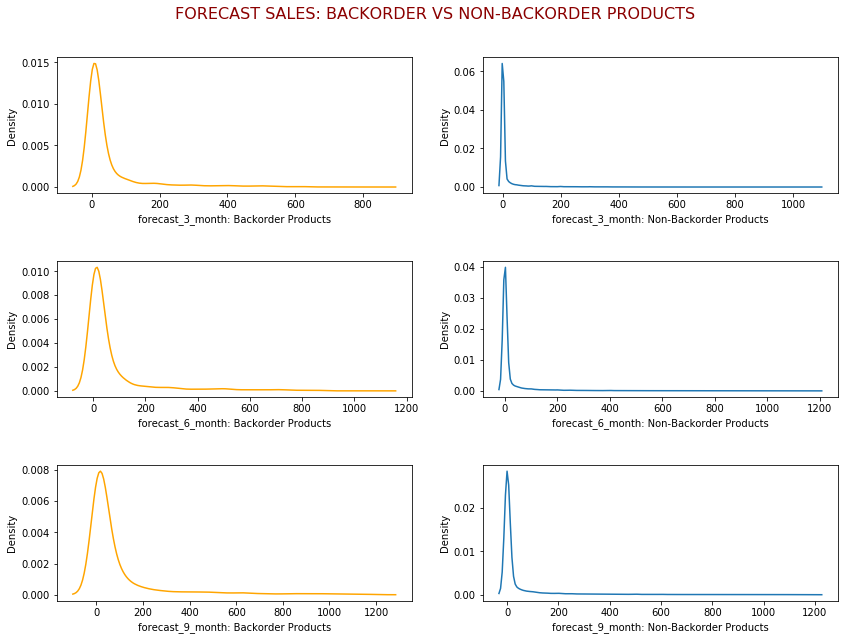

In [58]:
plt.figure(figsize=(14,10))

plt.subplot(321)
sns.kdeplot(train_df[train_df['went_on_backorder'] == 'Yes']['forecast_3_month'],color = 'orange')
plt.xlabel('forecast_3_month: Backorder Products')
plt.subplot(322)
sns.kdeplot(train_df[train_df['went_on_backorder'] == 'No']['forecast_3_month'])
plt.xlabel('forecast_3_month: Non-Backorder Products')

plt.subplot(323)
sns.kdeplot(train_df[train_df['went_on_backorder'] == 'Yes']['forecast_6_month'],color = 'orange')
plt.xlabel('forecast_6_month: Backorder Products')
plt.subplot(324)
sns.kdeplot(train_df[train_df['went_on_backorder'] == 'No']['forecast_6_month'])
plt.xlabel('forecast_6_month: Non-Backorder Products')

plt.subplot(325)
sns.kdeplot(train_df[train_df['went_on_backorder'] == 'Yes']['forecast_9_month'],color = 'orange')
plt.xlabel('forecast_9_month: Backorder Products')
plt.subplot(326)
sns.kdeplot(train_df[train_df['went_on_backorder'] == 'No']['forecast_9_month'])
plt.xlabel('forecast_9_month: Non-Backorder Products')

plt.suptitle('forecast sales: Backorder vs Non-Backorder products'.upper(),fontsize = 16,color = 'darkred',y=0.95)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.show()

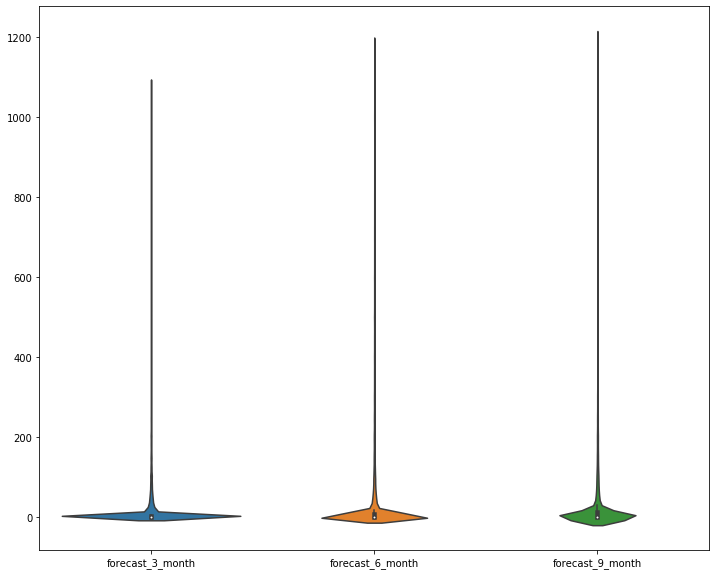

In [59]:
plt.figure(figsize=(12,10))
sns.violinplot(data = train_df[['forecast_3_month','forecast_6_month','forecast_9_month']]);

<h3>Observations:</h3>
-------------------------

<i>

<b>
       
<font color = 'green'>
  
  
- 60% of the products forecast sales are 0 units,only 40% of the products have forecast sales of atleast one unit.


- As we can see from the percentile plot, forecast sales of the products have increased through the months.


- Looking at the density plots there is minor difference in the densities at the initial values of backorder and non backorder products,densities are high between values 0-200 for backorder products and densities are high between values 0-100 for non-backorder products.

</font>
     
</b>
    
</i>

<h3> 3.2.5 Analysis on Feature: Sales quantity for the prior 1, 3, 6, 9 months </h3>

In [60]:
sales = train_df[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]
sales.head()

sales_1_month  sales_3_month  sales_6_month  sales_9_month
1056262            1.0            4.0            6.0           12.0
1007643            7.0           32.0           67.0          105.0
430193             0.0            0.0            0.0            0.0
1398452            0.0            0.0            1.0            1.0
970501             0.0            0.0            0.0            0.0

In [61]:
sales.describe()

sales_1_month  sales_3_month  sales_6_month  sales_9_month
count  642022.000000  642022.000000  642022.000000  642022.000000
mean        8.177304      26.060065      52.332124      80.237604
std        69.615562     146.213921     254.379035     388.497184
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000       0.000000
50%         0.000000       1.000000       2.000000       3.000000
75%         3.000000      10.000000      22.000000      33.000000
max     28120.000000   28194.000000   41594.000000   61309.000000

       Percentile Values of units sold till first month:
       -------------------------------------------------------
0 %le	- 0 		 90 %le - 19 		 99.0 %le - 119
10 %le	- 0 		 91 %le - 21 		 99.1 %le - 124
20 %le	- 0 		 92 %le - 25 		 99.2 %le - 130
30 %le	- 0 		 93 %le - 30 		 99.3 %le - 137
40 %le	- 0 		 94 %le - 35 		 99.4 %le - 146
50 %le	- 0 		 95 %le - 43 		 99.5 %le - 156
60 %le	- 1 		 96 %le - 53 		 99.6 %le - 170
70 %le	- 2 		 97 %le - 66 		 99.7 %le - 193
80 %le	- 5 		 98 %le - 86 		 99.8 %le - 234
90 %le	- 19 		 99 %le - 119 		 99.9 %le - 350
100 %le	- 28120 	 100 %le - 28120 	 100.0 %le - 28120


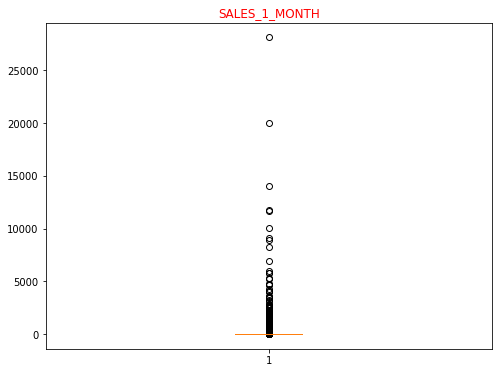

In [62]:
print(' '*6, 'Percentile Values of units sold till first month:')
print(' '*6,'-'*55)

tabs = 2
for percentile in range(90,101):
    if percentile == 100:
        tabs -= 1
        
    print((percentile%90)*10,'%le\t-',int(np.percentile(sales['sales_1_month'],(percentile%90)*10)),'\t'*tabs,percentile,'%le -',int(np.percentile(sales['sales_1_month'],percentile)),'\t'*tabs,\
         99+(percentile%90)/10,'%le -',int(np.percentile(sales['sales_1_month'],99+(percentile%90)/10)))
    
plt.figure(figsize=(8,6))
plt.boxplot(sales['sales_1_month']);
plt.title('sales_1_month'.upper(),color = 'red')
plt.show()

       Percentile Values of units sold till third month:
       -------------------------------------------------------
0 %le	- 0 		 90 %le - 61 		 99.0 %le - 369
10 %le	- 0 		 91 %le - 71 		 99.1 %le - 384
20 %le	- 0 		 92 %le - 83 		 99.2 %le - 401
30 %le	- 0 		 93 %le - 97 		 99.3 %le - 420
40 %le	- 0 		 94 %le - 116 		 99.4 %le - 443
50 %le	- 1 		 95 %le - 141 		 99.5 %le - 474
60 %le	- 2 		 96 %le - 173 		 99.6 %le - 516
70 %le	- 6 		 97 %le - 214 		 99.7 %le - 582
80 %le	- 18 		 98 %le - 274 		 99.8 %le - 713
90 %le	- 61 		 99 %le - 369 		 99.9 %le - 1053
100 %le	- 28194 	 100 %le - 28194 	 100.0 %le - 28194


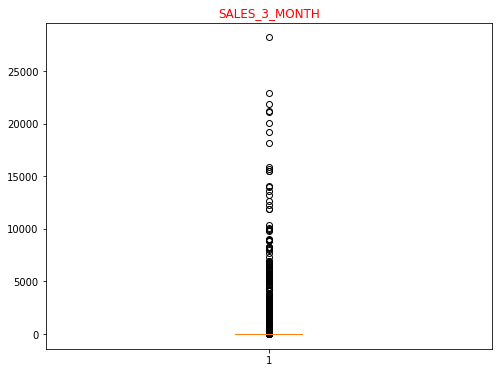

In [63]:
print(' '*6, 'Percentile Values of units sold till third month:')
print(' '*6,'-'*55)

tabs = 2
for percentile in range(90,101):
    if percentile == 100:
        tabs -= 1
        
    print((percentile%90)*10,'%le\t-',int(np.percentile(sales['sales_3_month'],(percentile%90)*10)),'\t'*tabs,percentile,'%le -',int(np.percentile(sales['sales_3_month'],percentile)),'\t'*tabs,\
         99+(percentile%90)/10,'%le -',int(np.percentile(sales['sales_3_month'],99+(percentile%90)/10)))
    
plt.figure(figsize=(8,6))
plt.boxplot(sales['sales_3_month']);
plt.title('sales_3_month'.upper(),color = 'red')
plt.show()

       Percentile Values of units sold till sixth month:
       -------------------------------------------------------
0 %le	- 0 		 90 %le - 126 		 99.0 %le - 736
10 %le	- 0 		 91 %le - 145 		 99.1 %le - 768
20 %le	- 0 		 92 %le - 169 		 99.2 %le - 803
30 %le	- 0 		 93 %le - 199 		 99.3 %le - 846
40 %le	- 0 		 94 %le - 237 		 99.4 %le - 891
50 %le	- 2 		 95 %le - 285 		 99.5 %le - 954
60 %le	- 5 		 96 %le - 346 		 99.6 %le - 1029
70 %le	- 13 		 97 %le - 431 		 99.7 %le - 1175
80 %le	- 37 		 98 %le - 550 		 99.8 %le - 1440
90 %le	- 126 		 99 %le - 736 		 99.9 %le - 2051
100 %le	- 41594 	 100 %le - 41594 	 100.0 %le - 41594


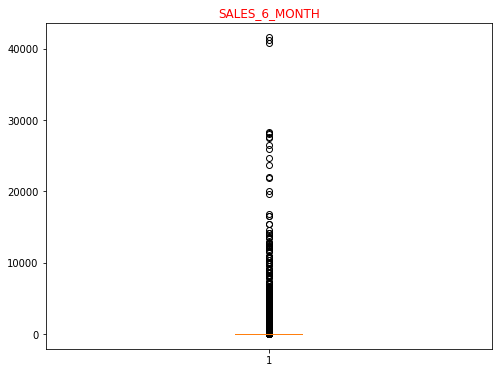

In [64]:
print(' '*6, 'Percentile Values of units sold till sixth month:')
print(' '*6,'-'*55)

tabs = 2
for percentile in range(90,101):
    if percentile == 100:
        tabs -= 1
        
    print((percentile%90)*10,'%le\t-',int(np.percentile(sales['sales_6_month'],(percentile%90)*10)),'\t'*tabs,percentile,'%le -',int(np.percentile(sales['sales_6_month'],percentile)),'\t'*tabs,\
         99+(percentile%90)/10,'%le -',int(np.percentile(sales['sales_6_month'],99+(percentile%90)/10)))
    
plt.figure(figsize=(8,6))
plt.boxplot(sales['sales_6_month']);
plt.title('sales_6_month'.upper(),color = 'red')
plt.show()

       Percentile Values of units sold till nineth month:
       -------------------------------------------------------
0 %le	- 0 		 90 %le - 192 		 99.0 %le - 1135
10 %le	- 0 		 91 %le - 222 		 99.1 %le - 1186
20 %le	- 0 		 92 %le - 258 		 99.2 %le - 1236
30 %le	- 0 		 93 %le - 304 		 99.3 %le - 1297
40 %le	- 1 		 94 %le - 362 		 99.4 %le - 1372
50 %le	- 3 		 95 %le - 435 		 99.5 %le - 1476
60 %le	- 8 		 96 %le - 527 		 99.6 %le - 1602
70 %le	- 20 		 97 %le - 657 		 99.7 %le - 1819
80 %le	- 56 		 98 %le - 840 		 99.8 %le - 2222
90 %le	- 192 		 99 %le - 1135 		 99.9 %le - 3309
100 %le	- 61309 	 100 %le - 61309 	 100.0 %le - 61309


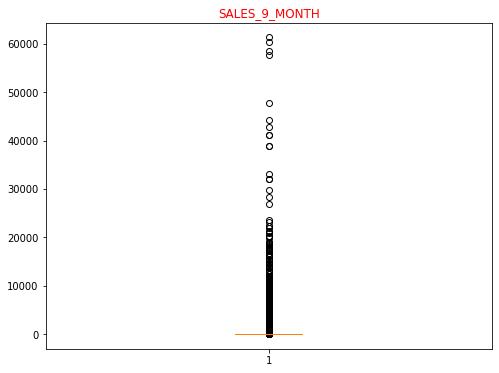

In [65]:
print(' '*6, 'Percentile Values of units sold till nineth month:')
print(' '*6,'-'*55)

tabs = 2
for percentile in range(90,101):
    if percentile == 100:
        tabs -= 1
        
    print((percentile%90)*10,'%le\t-',int(np.percentile(sales['sales_9_month'],(percentile%90)*10)),'\t'*tabs,percentile,'%le -',int(np.percentile(sales['sales_9_month'],percentile)),'\t'*tabs,\
         99+(percentile%90)/10,'%le -',int(np.percentile(sales['sales_9_month'],99+(percentile%90)/10)))
    
plt.figure(figsize=(8,6))
plt.boxplot(sales['sales_9_month']);
plt.title('sales_9_month'.upper(),color = 'red')
plt.show()

- As like the other features data is extremely right skewed,with most of the products having units sold less than 300 by the end of 9th month of the year.

- All the sales features have extreme values after the 99th percentile.

- 50% of the products have 0 sales for the first month
- 40% of the products have 0 sales for 3 months
- 30% of the products have 0 sales for 6 months
- 30% of the products have 0 sales for 9 months

In [66]:
#consodering the values less than 99%le

train_df = train_df[train_df['sales_1_month'] < np.percentile(train_df['sales_1_month'],99)]
train_df = train_df[train_df['sales_3_month'] < np.percentile(train_df['sales_3_month'],99)]
train_df = train_df[train_df['sales_6_month'] < np.percentile(train_df['sales_6_month'],99)]
train_df = train_df[train_df['sales_9_month'] < np.percentile(train_df['sales_9_month'],99)]


- Sales values in sales_3_month,sales_6_month and sales_9_month are result of adding the sales with their corresponding previous 3 month sales.


- Creating features that could have individual 3 month sales could help us understand the sales over the time. 

In [67]:
#Creating features that have individual 3 month sales

sales_123 = (train_df['sales_3_month'])
sales_456 = (train_df['sales_6_month']-train_df['sales_3_month'])
sales_789 = (train_df['sales_9_month']-train_df['sales_6_month'])

train_df['sales_123'] = sales_123
train_df['sales_456'] = sales_456
train_df['sales_789'] = sales_789

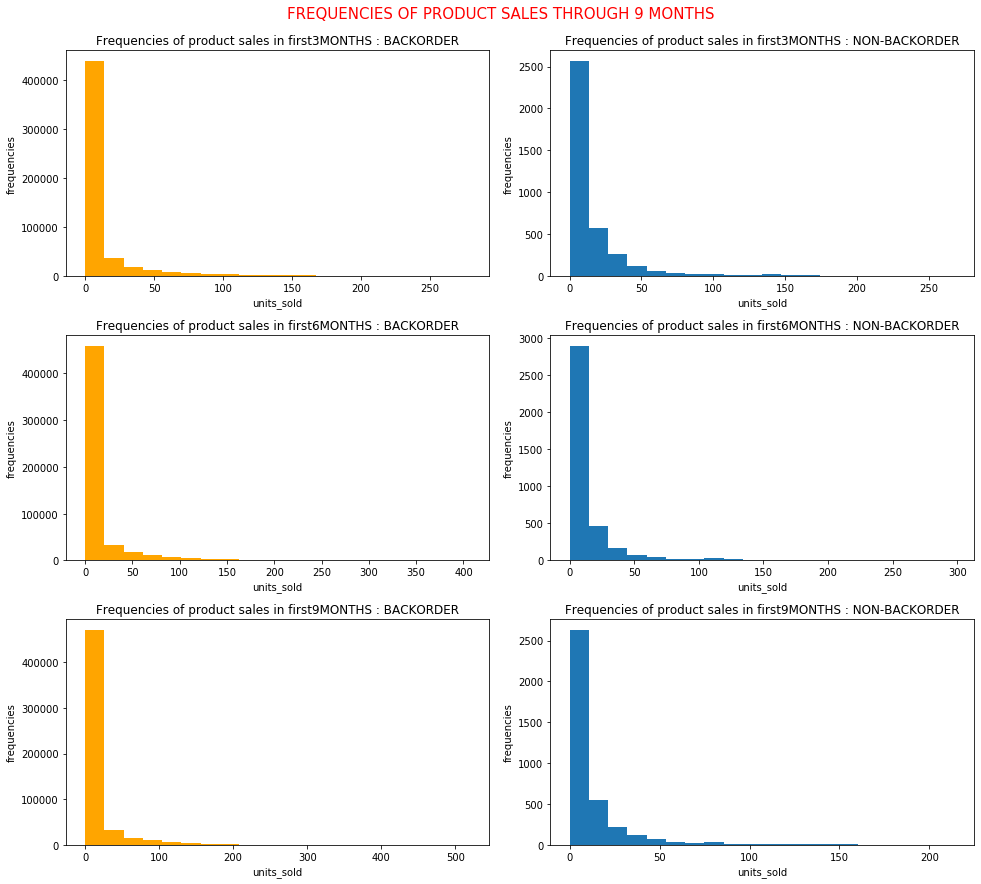

In [224]:
fig,ax = plt.subplots(3,2,tight_layout = True,figsize = (14,12))
for i,col in zip([0,1,2],['sales_123','sales_456','sales_789']):
    ax[i,0].hist(train_df[train_df['went_on_backorder']=='Yes'][col],bins = 20,color='orange')
    ax[i,0].set_title('Frequencies of product sales in first'+str(3*(i+1))+ 'months : backorder'.upper())
    ax[i,0].set_xlabel('units_sold')
    ax[i,0].set_ylabel('frequencies')

    ax[i,1].hist(train_df[train_df['went_on_backorder']=="No"][col],bins = 20)
    ax[i,1].set_title('Frequencies of product sales in first'+str(3*(i+1))+ 'months : non-backorder'.upper())
    ax[i,1].set_xlabel('units_sold')
    ax[i,1].set_ylabel('frequencies')

fig.suptitle('Frequencies of Product sales through 9 months'.upper(),color='red',y=1.02,fontsize=15)
plt.show();

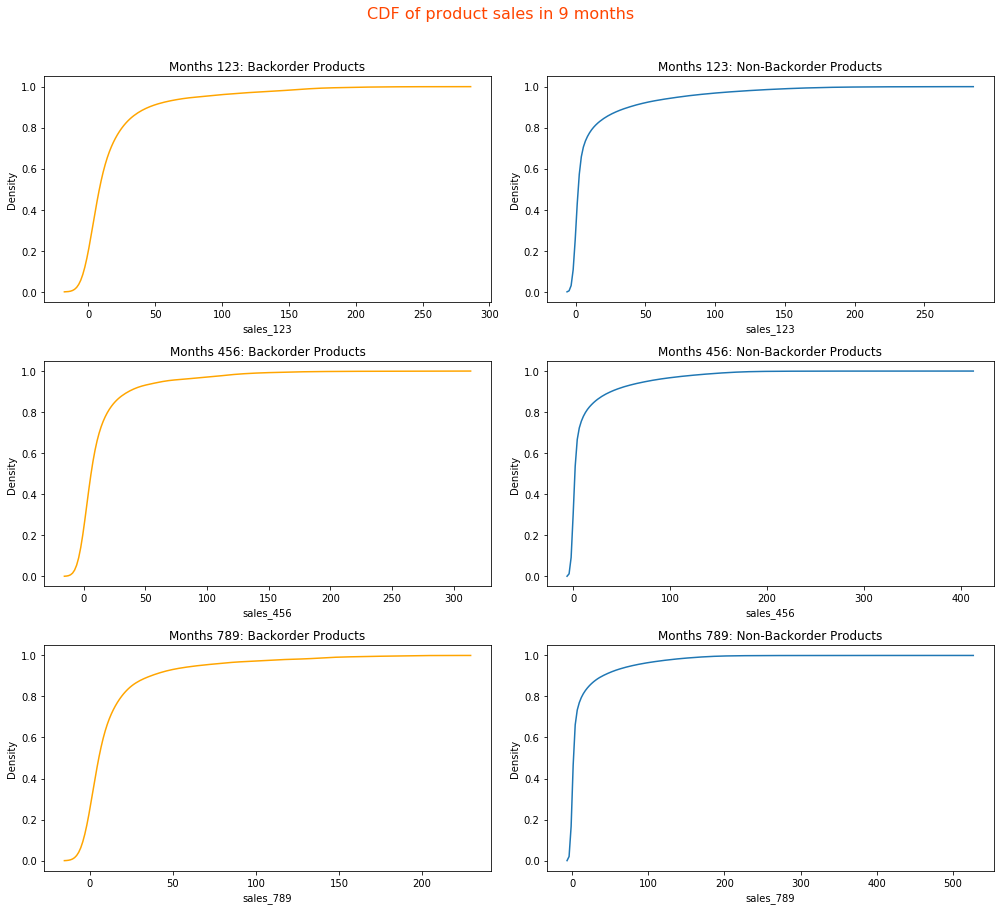

In [69]:
index = 1
plt.figure(figsize = (14,12))
for col in ['sales_123','sales_456','sales_789']:
    
    plt.subplot(3,2,index)
    sns.kdeplot(train_df[train_df['went_on_backorder'] == "Yes"][col],cumulative = True,color = "orange")
    plt.title('Months '+col.split('_')[1]+': Backorder Products')
    index += 1
    
    plt.subplot(3,2,index)
    sns.kdeplot(train_df[train_df['went_on_backorder'] == "No"][col],cumulative = True)
    plt.title('Months '+col.split('_')[1]+': Non-Backorder Products')
    index += 1

plt.tight_layout()
plt.suptitle('CDF of product sales in 9 months',y=1.05,color = 'orangered',fontsize = 16)

plt.show()

In [70]:
# General cause of backorder is unusual demand of product,lets check if there is any excess sales for
# backorder products during any of the 3 month period

count = 0
for row in train_df[train_df['went_on_backorder']=="No"][['forecast_3_month','forecast_6_month','forecast_9_month']].values:
    if not np.median(row)-20<= row.mean() <= np.median(row)+20:
        count+=1
        
print('there are ',count,' products with sudden sales spike in either of 3 months for non-backorder products')

count = 0
for row in train_df[train_df['went_on_backorder']=="Yes"][['sales_123','sales_456','sales_789']].values:
    if not np.median(row)-20<= row.mean() <= np.median(row)+20:
        count+=1
        
print('there are ',count,' products with sudden sales spike in either of 3 months for backorder products')

there are  10361  products with sudden sales spike in either of 3 months for non-backorder products
there are  46  products with sudden sales spike in either of 3 months for backorder products


In [71]:
mode = train_df[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']].mode()

print('Most frequent no.of units sold in 1 month: ',mode['sales_1_month'].values[0],'units')
print('Most frequent no.of units sold in 3 months combined: ',mode['sales_3_month'].values[0],'units')
print('Most frequent no.of units sold in 6 months combined:',mode['sales_6_month'].values[0],'units')
print('Most frequent no.of units sold in 9 months combined:',mode['sales_9_month'].values[0],'units')

print('\n')
print('-'*50)
mode = train_df[['sales_123','sales_456','sales_789']].mode()
print('\n')
print('Most frequent no.of units sold during 1,2,3 months: ',mode['sales_123'].values[0],'units')
print('Most frequent no.of units sold during 4,5,6 months: ',mode['sales_456'].values[0],'units')
print('Most frequent no.of units sold during 7,8,9 months: ',mode['sales_789'].values[0],'units')

Most frequent no.of units sold in 1 month:  0.0 units
Most frequent no.of units sold in 3 months combined:  0.0 units
Most frequent no.of units sold in 6 months combined: 0.0 units
Most frequent no.of units sold in 9 months combined: 0.0 units


--------------------------------------------------


Most frequent no.of units sold during 1,2,3 months:  0.0 units
Most frequent no.of units sold during 4,5,6 months:  0.0 units
Most frequent no.of units sold during 7,8,9 months:  0.0 units


<h3>Observtions:</h3>

<i>
   <b> 
       
   <font color = 'green'> 
       


- There isn't any difference between the distributions of backorder product sales and non-backorder product sales we can observe from the histograms,percentiles and cdf's.


- There are nearly 40% of products that didn't have any sales in the 9 months and most frequent no.of units sold is also 0 impling there are lots of products with sale 0 units.


- By looking at the individual sales of each 3 month periods there are products whose sales have decreased over the time and there are products that have sales increased over time.


- One of the reason for backorders is unusual demand or unusual sales of product due to seasonality.Upon checking for sudden spike in sales over time, data points in both backorder and non-backorder have normal increase in sales without any sudden increase.So unusual sales doesn't help in the classification of the backorder products.

</font>
</b>
</i>


<h3> 3.2.6 Analysis on feature: Minimum recommended amount in stock </h3>

In [72]:
print(train_df.min_bank.head().to_string())

1056262     0.0
1007643    15.0
430193      0.0
1398452     0.0
970501      0.0


In [73]:
train_df.min_bank.describe()
print('Mean \t\t:',train_df.min_bank.describe()['mean'])
print('Median \t\t:',train_df.min_bank.describe()['50%'])
print('Minimum Value   :',train_df.min_bank.describe()['min'])
print('Maximum Value   :',train_df.min_bank.describe()['max'])
print('Mode \t\t:',train_df.min_bank.mode()[0])

Mean 		: 5.738544942098341
Median 		: 0.0
Minimum Value   : 0.0
Maximum Value   : 7669.0
Mode 		: 0.0


	Minimum stock recommended PERCENTILE VALUES
	 -------------------------------------------
		 0 %le  	: 0.0
		 10 %le  	: 0.0
		 20 %le  	: 0.0
		 30 %le  	: 0.0
		 40 %le  	: 0.0
		 50 %le  	: 0.0
		 60 %le  	: 1.0
		 70 %le  	: 1.0
		 80 %le  	: 3.0
		 90 %le  	: 18.0
		 100 %le  	: 7669.0


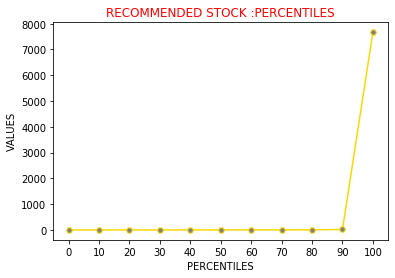

In [74]:
print('\tMinimum stock recommended PERCENTILE VALUES')
print('\t','-'*43)
percentiles = []
for percentile in range(0,110,10):
    print('\t\t',percentile,'%le  \t:',np.percentile(train_df['min_bank'],percentile))
    percentiles.append(np.percentile(train_df['min_bank'],percentile))


plt.plot(range(0,110,10),percentiles,'-H',color = 'gold',markerfacecolor = 'grey')
plt.title('Recommended stock :percentiles'.upper(),color='red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')
plt.xticks(range(0,110,10))
plt.show()

	Minimum stock recommended PERCENTILE VALUES 90-100
	 ------------------------------------------------
		 90 %le  	: 18.0
		 91 %le  	: 20.0
		 92 %le  	: 23.0
		 93 %le  	: 26.0
		 94 %le  	: 29.0
		 95 %le  	: 33.0
		 96 %le  	: 38.0
		 97 %le  	: 45.0
		 98 %le  	: 55.0
		 99 %le  	: 73.0
		 100 %le  	: 7669.0


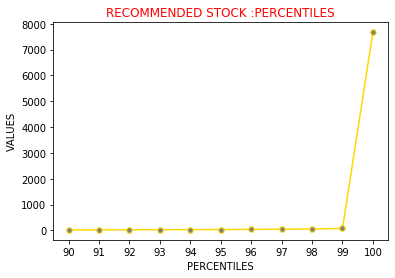

In [75]:
print('\tMinimum stock recommended PERCENTILE VALUES 90-100')
print('\t','-'*48)
percentiles = []
for percentile in range(90,101):
    print('\t\t',percentile,'%le  \t:',np.percentile(train_df['min_bank'],percentile))
    percentiles.append(np.percentile(train_df['min_bank'],percentile))


plt.plot(range(90,101),percentiles,'-H',color = 'gold',markerfacecolor = 'grey')
plt.title('Recommended stock :percentiles'.upper(),color='red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')
plt.xticks(range(90,101))
plt.show()

                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 0.0 				 	 10 %le - 0.0
	 20 %le	- 0.0 				 	 20 %le - 0.0
	 30 %le	- 0.0 				 	 30 %le - 0.0
	 40 %le	- 0.0 				 	 40 %le - 0.0
	 50 %le	- 0.0 				 	 50 %le - 0.0
	 60 %le	- 1.0 				 	 60 %le - 1.0
	 70 %le	- 2.0 				 	 70 %le - 1.0
	 80 %le	- 4.0 				 	 80 %le - 3.0
	 90 %le	- 15.0 				 	 90 %le - 18.0
	 100 %le	- 598.0 		 	 100 %le - 7669.0


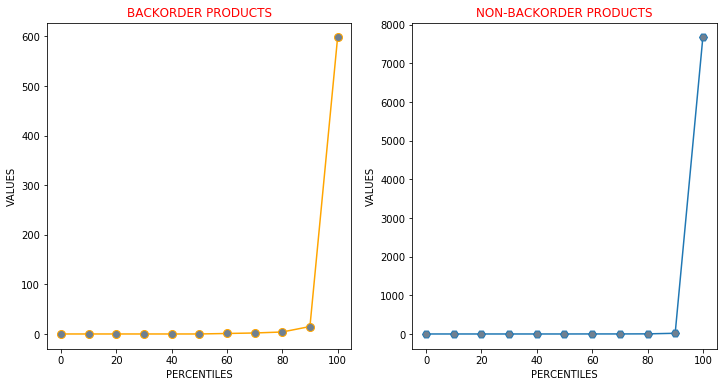

In [76]:
print(' '*20, 'Percentile Values of Both Classes')
print(' '*20,'-'*34,'\n\n')

print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
print('\t','-'*18,'\t'*4,'-'*23)
tabs = 4
for percentile in range(0,110,10):
    if percentile == 100:
        tabs -= 2
        
    print('\t',percentile,'%le\t-',np.percentile(train_df[train_df['went_on_backorder']=="Yes"]['min_bank'],percentile),'\t'*tabs,\
         '\t',percentile,'%le -',np.percentile(train_df[train_df['went_on_backorder']=="No"]['min_bank'],percentile))
    
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="Yes"]['min_bank'].quantile(np.array(list(range(0,110,10)))/100),color='orange',\
         marker = 'o',markersize=8,markerfacecolor='slategrey')
plt.title('BACKORDER PRODUCTS'.upper(),color = 'red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.subplot(122)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="No"]['min_bank'].quantile(np.array(list(range(0,110,10)))/100),\
         marker = 'H',markersize=8,markerfacecolor='slategrey')
plt.title('NON-BACKORDER PRODUCTS'.upper(),color = 'red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.show()

In [77]:
# removing values greater than 99%le

print('no.of rows in train data before removing values,',train_df.shape[0])
train_df = train_df[train_df['min_bank']<np.percentile(train_df['min_bank'],99)]
print('no.of rows in train data after removing values,',train_df.shape[0])


no.of rows in train data before removing values, 616649
no.of rows in train data after removing values, 610426


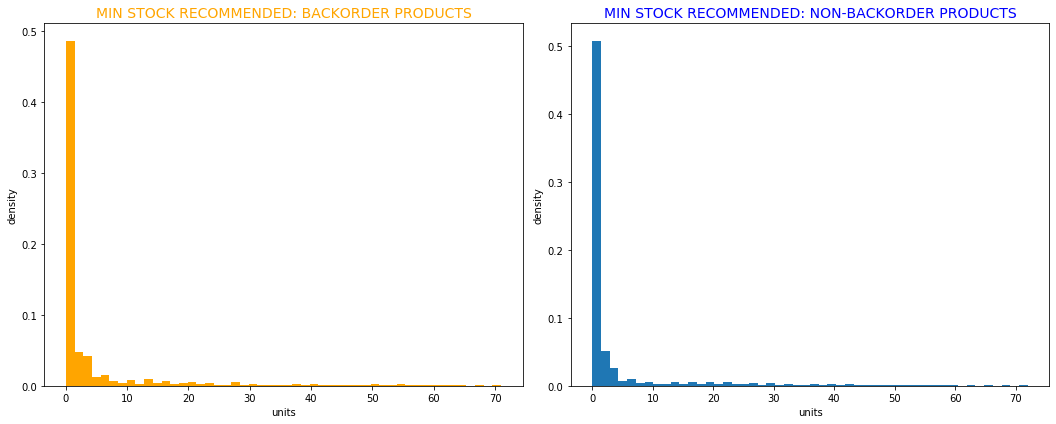

In [78]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(train_df[train_df['went_on_backorder']=='Yes']['min_bank'],bins = 50,color = 'orange',density = True)
plt.xlabel('units')
plt.ylabel('density')
plt.title('Min Stock recommended: Backorder products'.upper(),fontdict={'fontsize':14},color = 'orange')

plt.subplot(122)
plt.hist(train_df[train_df['went_on_backorder']=='No']['min_bank'],bins = 50,density = True)
plt.xlabel('units')
plt.ylabel('density')
plt.title('Min Stock recommended: Non-Backorder products'.upper(),fontdict={'fontsize':14},color = 'blue')

plt.tight_layout()
plt.show()

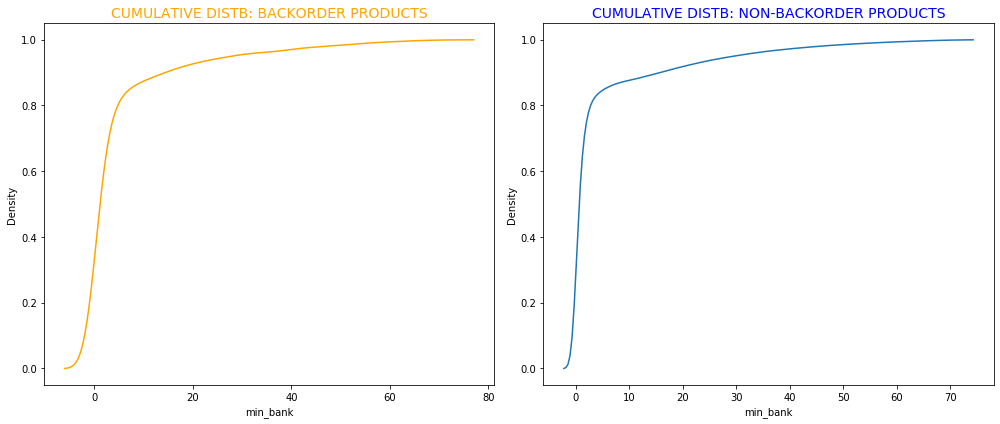

In [79]:
plt.figure(figsize = (14,6))

plt.subplot(121)
sns.kdeplot(train_df[train_df['went_on_backorder']=='Yes']['min_bank'],cumulative=True,color = 'orange')
plt.title('Cumulative Distb: Backorder products'.upper(),fontdict={'fontsize':14},color = 'orange')

plt.subplot(122)
sns.kdeplot(train_df[train_df['went_on_backorder']=='No']['min_bank'],cumulative=True)
plt.title('Cumulative Distb: Non-Backorder products'.upper(),fontdict={'fontsize':14},color = 'blue')


plt.tight_layout()
plt.show()

<h3>Observations:</h3>
-------------------------

<i>

<b>
       
<font color = 'green'>

- There are 50% of products which have 0 recommended stock units.


- Both the classes have similar percentile values till 90th percentile,there is a spike after the 90% for both classes.


- 99% of the products have less than 100 recommended stock units.


- Distributions of both class products look similar which doesn't give any information to classify them.  

<h3> 3.2.7 Analysis on feature: Parts overdue from source </h3>

In [80]:
print(train_df.pieces_past_due.head().to_string())

1056262    0.0
1007643    0.0
430193     0.0
1398452    0.0
970501     0.0


In [81]:
print(train_df.pieces_past_due.describe().to_string())

count    610426.000000
mean          0.140793
std           3.892561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         720.000000


	Overdue units PERCENTILE VALUES 90-100
	 ------------------------------------------------
		 0 %le  	: 0.0
		 10 %le  	: 0.0
		 20 %le  	: 0.0
		 30 %le  	: 0.0
		 40 %le  	: 0.0
		 50 %le  	: 0.0
		 60 %le  	: 0.0
		 70 %le  	: 0.0
		 80 %le  	: 0.0
		 90 %le  	: 0.0
		 100 %le  	: 720.0


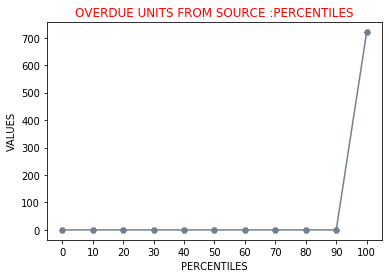

In [82]:
print('\tOverdue units PERCENTILE VALUES 90-100')
print('\t','-'*48)
percentiles = []
for percentile in range(0,110,10):
    print('\t\t',percentile,'%le  \t:',np.percentile(train_df['pieces_past_due'],percentile))
    percentiles.append(np.percentile(train_df['pieces_past_due'],percentile))


plt.plot(range(0,110,10),percentiles,'-H',color = 'slategrey')
plt.title('Overdue units from Source :percentiles'.upper(),color='red')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')
plt.xticks(range(0,110,10))
plt.show()

                     Percentile Values of Both Classes
                     ---------------------------------- 


	Backorder Products: 			 	Non-backorder Products:
	 ------------------ 				 -----------------------
	 0 %le	- 0.0 				 	 0 %le - 0.0
	 10 %le	- 0.0 				 	 10 %le - 0.0
	 20 %le	- 0.0 				 	 20 %le - 0.0
	 30 %le	- 0.0 				 	 30 %le - 0.0
	 40 %le	- 0.0 				 	 40 %le - 0.0
	 50 %le	- 0.0 				 	 50 %le - 0.0
	 60 %le	- 0.0 				 	 60 %le - 0.0
	 70 %le	- 0.0 				 	 70 %le - 0.0
	 80 %le	- 0.0 				 	 80 %le - 0.0
	 90 %le	- 0.0 				 	 90 %le - 0.0
	 100 %le	- 500.0 		 	 100 %le - 720.0


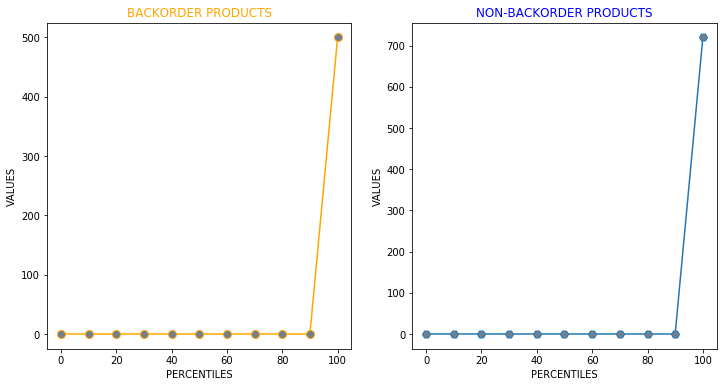

In [83]:
print(' '*20, 'Percentile Values of Both Classes')
print(' '*20,'-'*34,'\n\n')

print('\tBackorder Products:','\t'*3,'\tNon-backorder Products:')
print('\t','-'*18,'\t'*4,'-'*23)
tabs = 4
for percentile in range(0,110,10):
    if percentile == 100:
        tabs -= 2
        
    print('\t',percentile,'%le\t-',np.percentile(train_df[train_df['went_on_backorder']=="Yes"]['pieces_past_due'],percentile),'\t'*tabs,\
         '\t',percentile,'%le -',np.percentile(train_df[train_df['went_on_backorder']=="No"]['pieces_past_due'],percentile))
    
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="Yes"]['pieces_past_due'].quantile(np.array(list(range(0,110,10)))/100),color='orange',\
         marker = 'o',markersize=8,markerfacecolor='slategrey')
plt.title('BACKORDER PRODUCTS'.upper(),color = 'orange')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.subplot(122)
plt.plot(range(0,110,10),\
         train_df[train_df['went_on_backorder']=="No"]['pieces_past_due'].quantile(np.array(list(range(0,110,10)))/100),\
         marker = 'H',markersize=8,markerfacecolor='slategrey')
plt.title('NON-BACKORDER PRODUCTS'.upper(),color = 'blue')
plt.xlabel('PERCENTILES')
plt.ylabel('VALUES')

plt.show()

<h3>Observations:</h3>
-------------------------

<i>

<b>
       
<font color = 'green'>

- 99% of the values are just 0's which indicates there are no parts overdue from the source.


- Only 1% of the products have overdue units from the source.Parts overdue feature may not be useful in classifing the backorder products.

<h3> 3.2.8 Analysis on Feature: Source performance in last 6 and 12 months </h3>

In [84]:
train_df[['perf_6_month_avg','perf_12_month_avg']].head()

perf_6_month_avg  perf_12_month_avg
1056262              0.07               0.24
1007643              0.99               0.98
430193               0.16               0.16
1398452              0.88               0.63
970501               0.89               0.90

In [85]:
print('DESCRIPTIVE STATS OF PERFORMANCE IN 6 MONTHS:')
print('-'*45)
print(train_df['perf_6_month_avg'].describe().to_string())
print('\n')
print('DESCRIPTIVE STATS OF PERFORMANCE IN 12 MONTHS:')
print('-'*45)
print(train_df['perf_12_month_avg'].describe().to_string())

DESCRIPTIVE STATS OF PERFORMANCE IN 6 MONTHS:
---------------------------------------------
count    610426.000000
mean         -7.119125
std          26.935328
min         -99.000000
25%           0.630000
50%           0.810000
75%           0.960000
max           1.000000


DESCRIPTIVE STATS OF PERFORMANCE IN 12 MONTHS:
---------------------------------------------
count    610426.000000
mean         -6.717417
std          26.289995
min         -99.000000
25%           0.660000
50%           0.800000
75%           0.950000
max           1.000000


In [86]:
print('Skewness: 6 month performance',train_df['perf_6_month_avg'].skew())
print('Skewness: 6 month performance',train_df['perf_6_month_avg'].kurt())
print('-'*50)
print('Skewness: 12 month performance',train_df['perf_12_month_avg'].skew())
print('Skewness: 12 month performance',train_df['perf_12_month_avg'].kurt())

Skewness: 6 month performance -3.1177559136299537
Skewness: 6 month performance 7.721408629743572
--------------------------------------------------
Skewness: 12 month performance -3.225032103905067
Skewness: 12 month performance 8.401887568473654


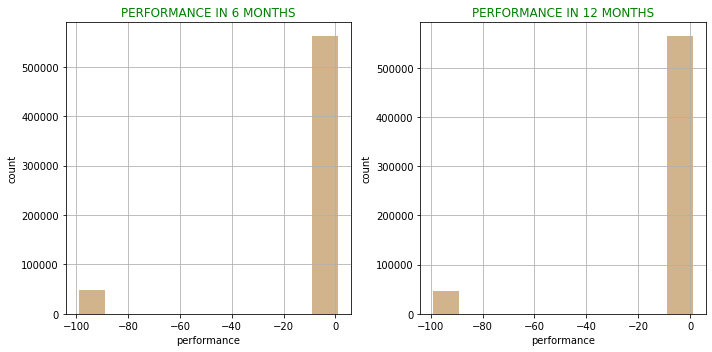

In [87]:
plt.figure(figsize=(10,5))

plt.subplot(121)
train_df['perf_6_month_avg'].hist(color = 'tan');
plt.xlabel('performance')
plt.ylabel('count')
plt.title('Performance in 6 months'.upper(),color = 'green')

plt.subplot(122)
train_df['perf_12_month_avg'].hist(color = 'tan');
plt.xlabel('performance')
plt.ylabel('count')
plt.title('Performance in 12 months'.upper(),color = 'green')

plt.tight_layout()
plt.show()

- Performance in 6 months and 12 months seems to have same distribtuion,there is only a minor difference in the descriptive stats of 6 month performance and 12 month performance.


- Feature contains negative values which may be recorded due to some error because rest values are between 0-1 indicating source performance in percentages.So,the negative values could be because of some error while collecting data.

In [88]:
#considering only positive values
train_df = train_df[train_df['perf_6_month_avg']>0]
train_df = train_df[train_df['perf_12_month_avg']>0]

print('DESCRIPTIVE STATS OF PERFORMANCE IN 6 MONTHS (without negative values):')
print('-'*45)
print(train_df['perf_6_month_avg'].describe().to_string())
print('\n')
print('DESCRIPTIVE STATS OF PERFORMANCE IN 12 MONTHS (without negative values):')
print('-'*45)
print(train_df['perf_12_month_avg'].describe().to_string())

DESCRIPTIVE STATS OF PERFORMANCE IN 6 MONTHS (without negative values):
---------------------------------------------
count    547754.000000
mean          0.796883
std           0.205009
min           0.010000
25%           0.710000
50%           0.840000
75%           0.970000
max           1.000000


DESCRIPTIVE STATS OF PERFORMANCE IN 12 MONTHS (without negative values):
---------------------------------------------
count    547754.000000
mean          0.792485
std           0.197990
min           0.010000
25%           0.720000
50%           0.830000
75%           0.960000
max           1.000000


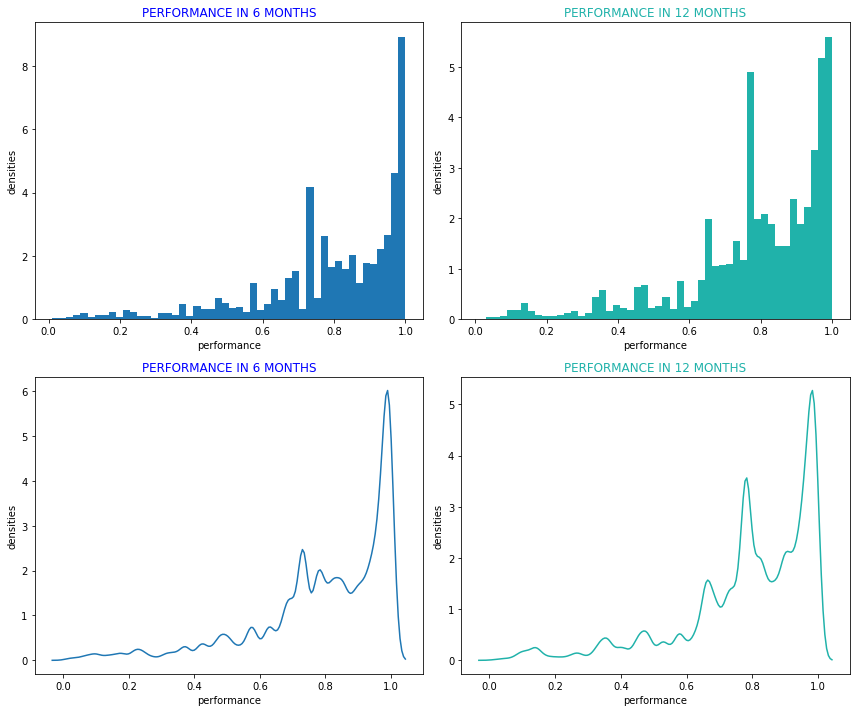

In [89]:
plt.figure(figsize=(12,10))

plt.subplot(221)
train_df['perf_6_month_avg'].hist(density=True,bins=50,grid = False);
plt.xlabel('performance')
plt.ylabel('densities')
plt.title('Performance in 6 months'.upper(),color = 'blue')

plt.subplot(222)
train_df['perf_12_month_avg'].hist(density=True,bins=50,color = 'lightseagreen',grid = False);
plt.xlabel('performance')
plt.ylabel('densities')
plt.title('Performance in 12 months'.upper(),color = 'lightseagreen')

plt.subplot(223)
sns.kdeplot(train_df['perf_6_month_avg'])
plt.xlabel('performance')
plt.ylabel('densities')
plt.title('Performance in 6 months'.upper(),color = 'blue')

plt.subplot(224)
sns.kdeplot(train_df['perf_12_month_avg'],color = 'lightseagreen')
plt.xlabel('performance')
plt.ylabel('densities')
plt.title('Performance in 12 months'.upper(),color = 'lightseagreen')

plt.tight_layout()
plt.show()


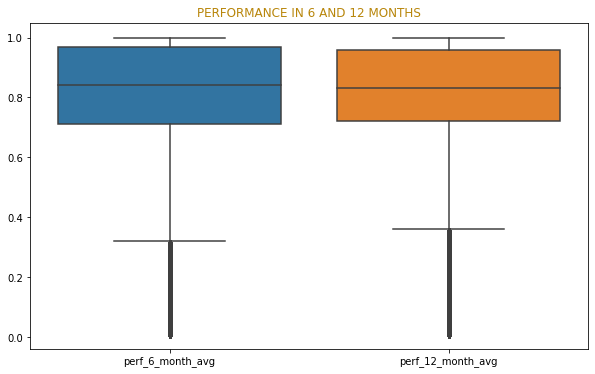

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df[['perf_6_month_avg','perf_12_month_avg']])
plt.title('PERFORMANCE IN 6 AND 12 MONTHS',color='darkgoldenrod')
plt.show()

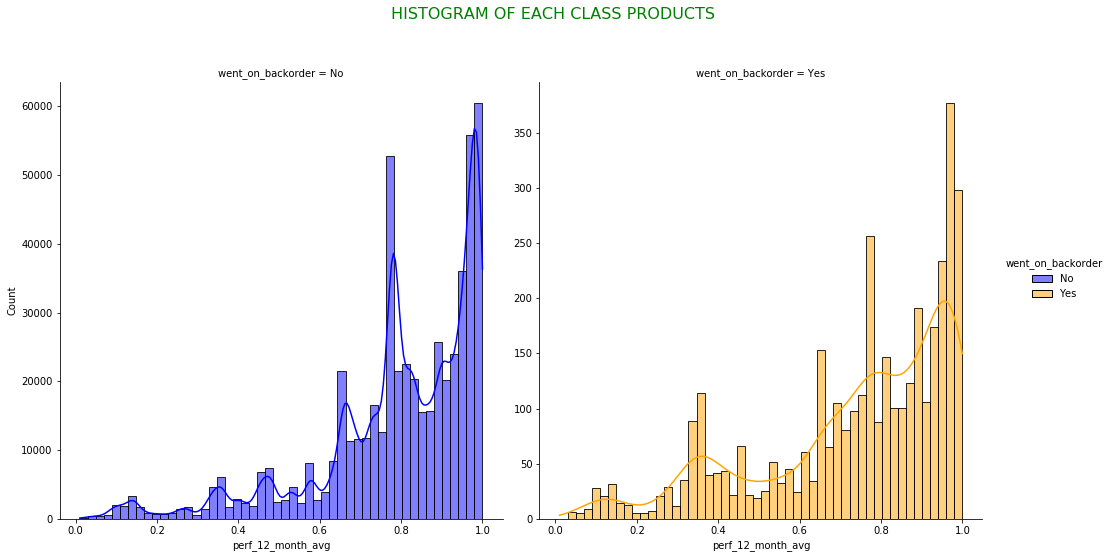

In [91]:
plt.close()
#plt.figure(figsize=(14,8))
sns.displot(data = train_df,x = 'perf_12_month_avg',col = 'went_on_backorder',hue = 'went_on_backorder',bins = 50,facet_kws={'sharey': False},palette = ['blue','orange'],height=7,aspect=1,kde=True)
plt.suptitle('Histogram of each class products'.upper(),color = 'green',fontsize=16,y=1.1)
plt.show()

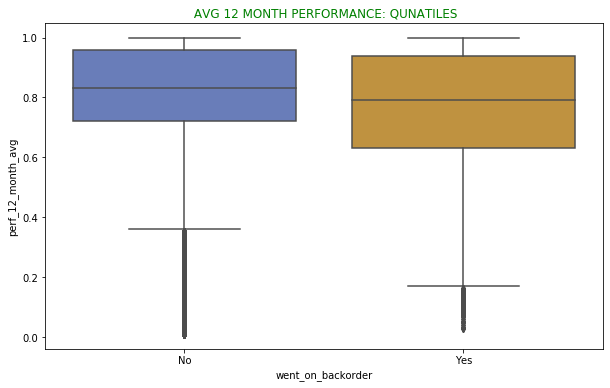

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(data = train_df,x = 'went_on_backorder',y = 'perf_12_month_avg',palette = ['royalblue','orange'],saturation=0.5,);
plt.title(' avg 12 month performance: Qunatiles'.upper(),color='green');

<h3>Observations:</h3>
-------------------------

<i>
<b>
    <font color = 'green'>
        
        
- Performance features distributions for both classes are similar,there is no seperation between the performance of both class products.
        
        
- Most products performance is greater than 0.6 with most products having the performance ratings 0.99,0.78,0.98.
        
        
- Kurtosis and Skewness of the feature are not that high compared to other features,transforming the feature to normal distribution could be useful in predicting the backorders.

###  3.2.8 Analysis on Feature: Amount of stock orders overdue

In [93]:
print(train_df.local_bo_qty.head().to_string())


1056262    0.0
1007643    0.0
430193     0.0
1398452    0.0
970501     0.0


In [94]:
print(train_df.local_bo_qty.describe().to_string())

count    547754.000000
mean          0.041378
std           1.131322
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         155.000000


In [95]:
print(train_df['local_bo_qty'].quantile(np.array(list(range(0,110,10)))/100).to_string())

0.0      0.0
0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
0.5      0.0
0.6      0.0
0.7      0.0
0.8      0.0
0.9      0.0
1.0    155.0


In [96]:
print('99%e of the feature:',np.percentile(train_df['local_bo_qty'],99))

99%e of the feature: 0.0


<h3>Observations</h3>
-------------------------

<i>
<b>
    <font color = 'green'>
        
- This feature will not be usefull in predicting the backorder products since nearly all the values are 0's.

### 3.2.9 Analysis on categorical features: General risk flags

In [97]:
train_df.select_dtypes(include = 'object').describe()

sku potential_issue deck_risk oe_constraint ppap_risk  \
count    547754          547754    547754        547754    547754   
unique   547754               2         2             2         2   
top     3145721              No        No            No        No   
freq          1          547527    428267        547736    484309   

       stop_auto_buy rev_stop went_on_backorder  
count         547754   547754            547754  
unique             2        2                 2  
top              Yes       No                No  
freq          537944   547622            543970

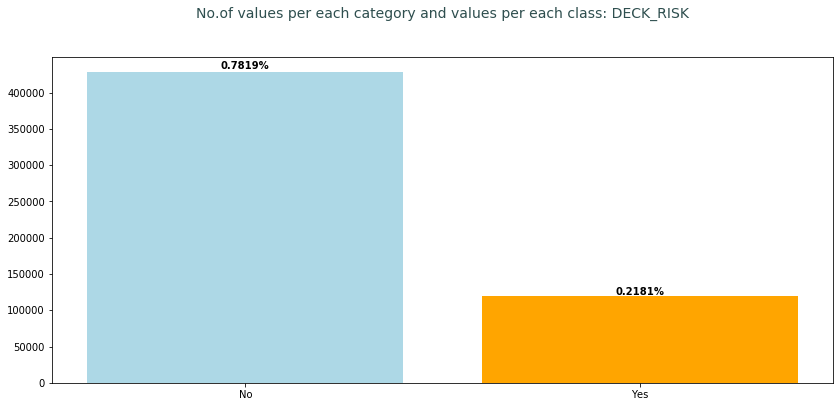

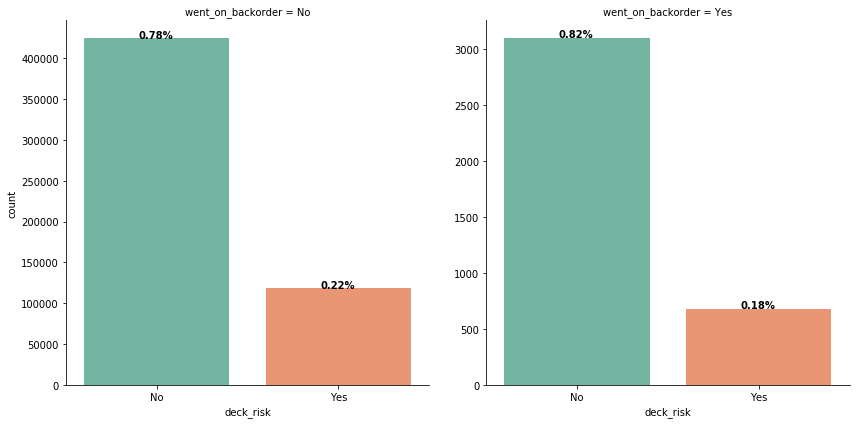

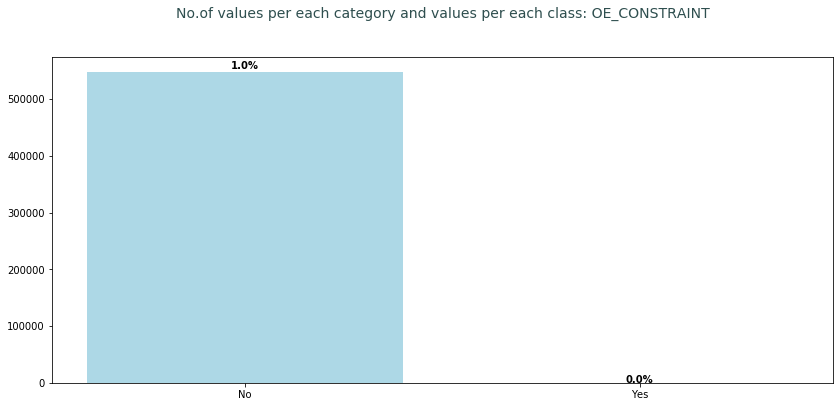

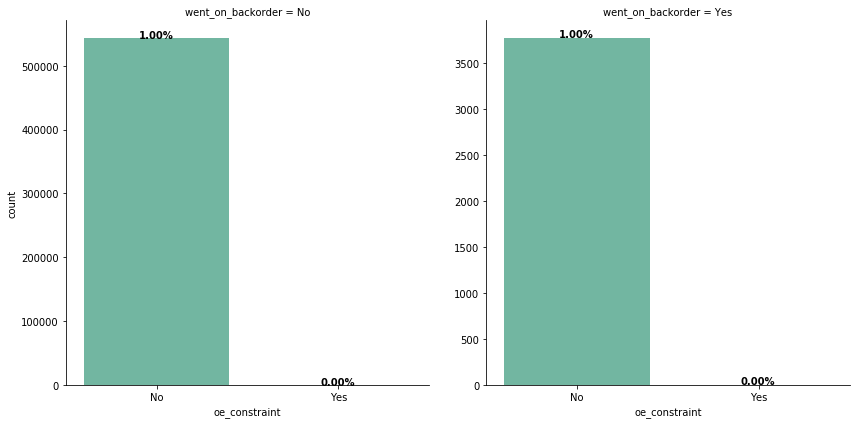

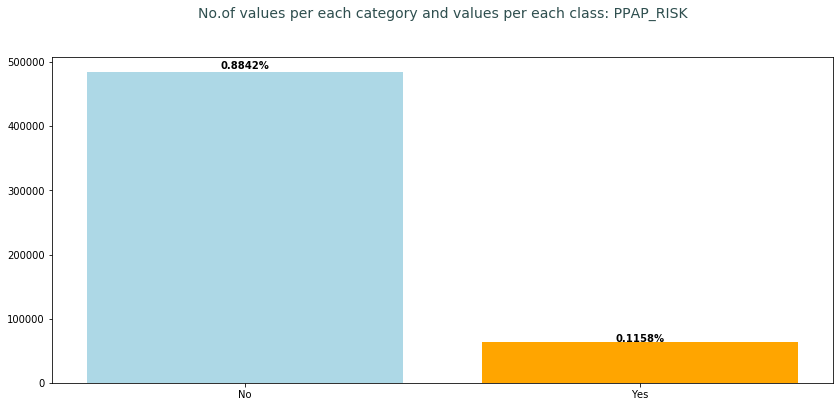

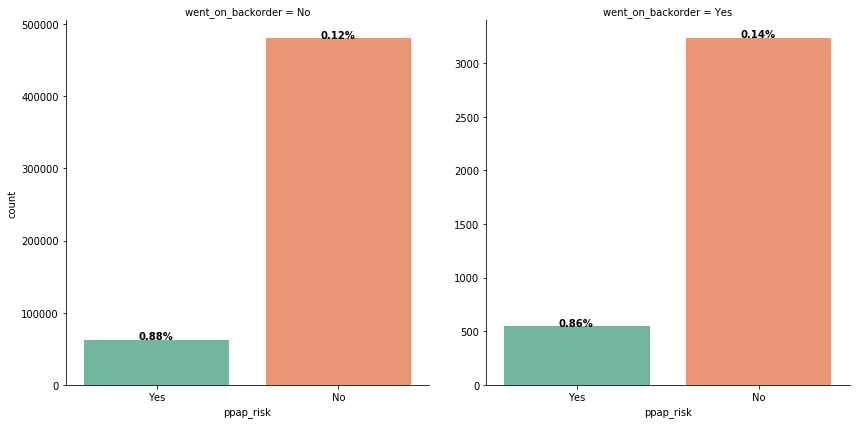

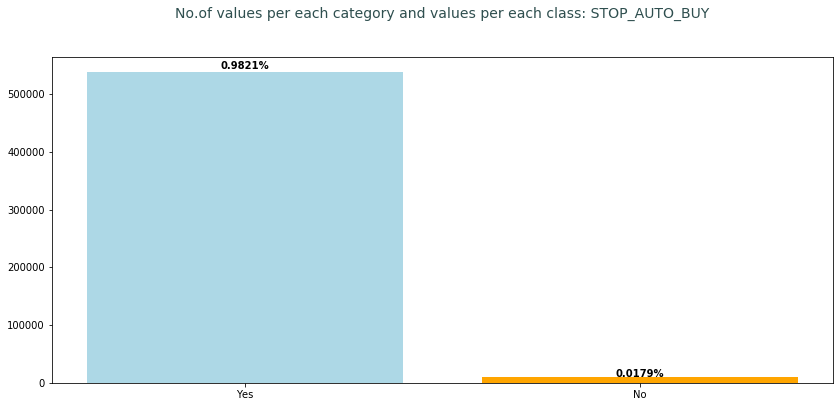

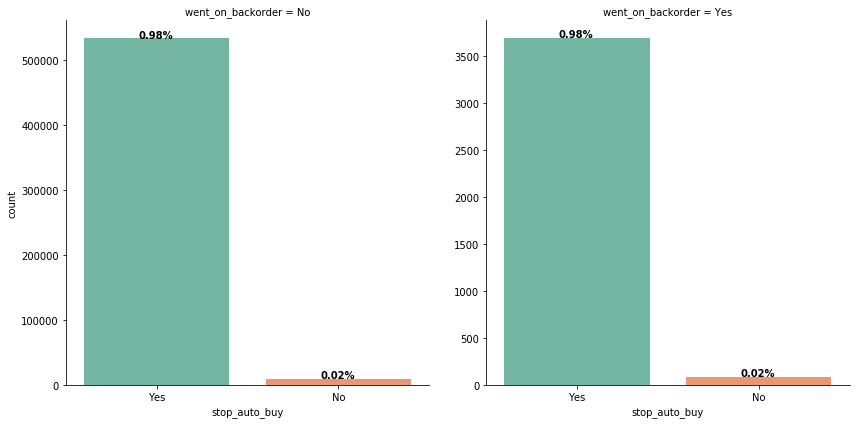

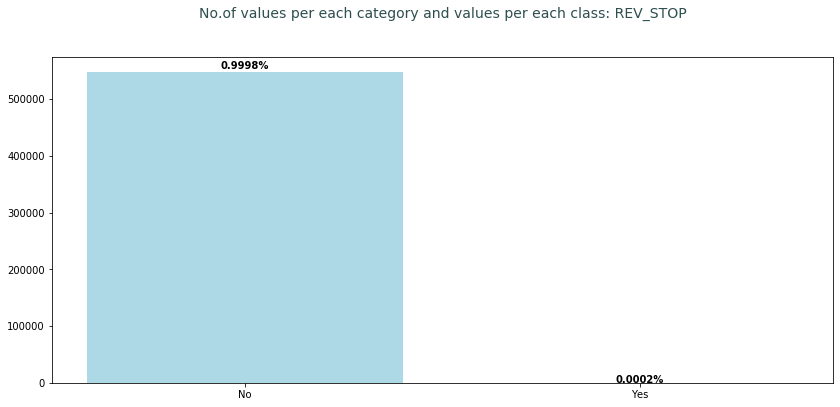

posx and posy should be finite values
posx and posy should be finite values


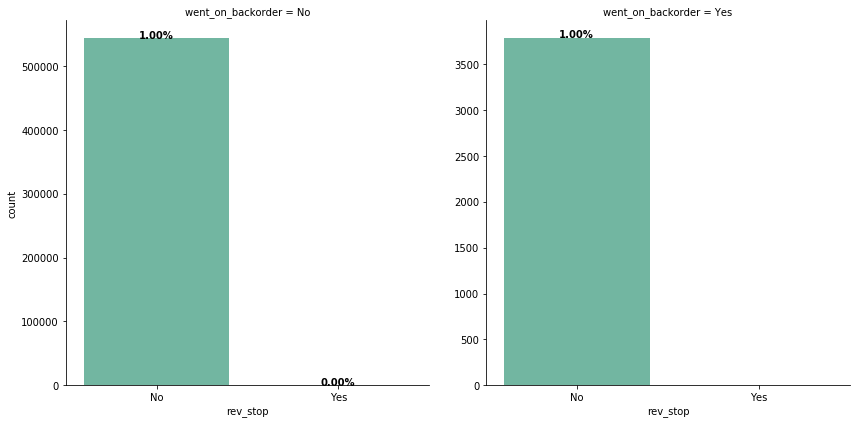

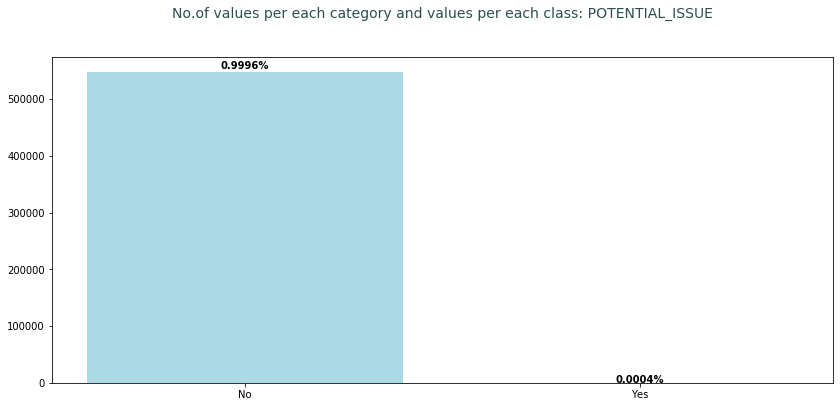

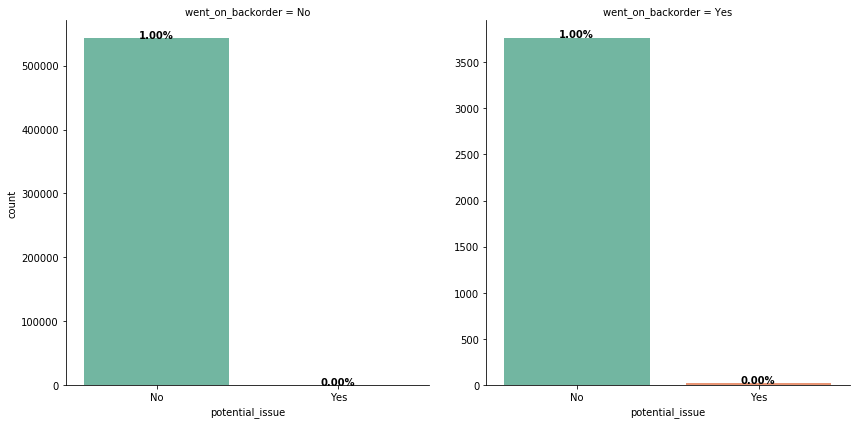

In [98]:
for column in ['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','potential_issue']:
    plt.figure(figsize=(14,6))
    graph = plt.bar(train_df[column].value_counts().index,train_df[column].value_counts().values,color = ['lightblue','orange'])
    Percentage=np.round(train_df[column].value_counts().values/train_df[column].value_counts().values.sum(),4)
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1.01,
                 str(Percentage[i])+'%',
                 ha='center',
                 weight='bold')
        i+=1
    plt.title('No.of values per each category and values per each class: '+str(column).upper(),color = 'darkslategrey',fontdict={'fontsize':14},y = 1.1)
    
    
    facet = sns.catplot(x=column, col="went_on_backorder",
                    data=train_df, kind="count",
                    height=6, aspect=1,sharey = False,palette = 'Set2');
    bo = 'No'
    i = 0
    for subplot in facet.axes[0]:
        #spots[0].get_height()/spots[0].get_height()+spots[1].get_height()
        spots = subplot.patches
        percentages = np.round(train_df[train_df['went_on_backorder']==bo][column].value_counts().values/train_df[train_df['went_on_backorder']==bo][column].value_counts().values.sum(),4)
    
        if len(percentages)<2:
            percentages = np.append(percentages,0)
            
        j = 0
        for spot in spots:
            
            height1 = spot.get_height()
            facet.axes[0][i].text(spot.get_x()+0.3, height1+3.1, '{:1.2f}%'.format(percentages[j]),weight='bold')

            j+=1
        i+=1
        bo = 'Yes'   
    plt.show()


<h3>Observations</h3>
-------------------------

<i>
<b>
    <font color = 'green'>

- 21% of the products that have deck risk.Both Backorder products and Non-Backorder products have nearly same % of products with deck risk making us to rule out the possibility that deck risk could be a possibel reason for Backorders.


- All the products have oe_contraint value 'No',0% of the products have oe_constraint value 'Yes'.So this feature is not useful for predicting backorders.


- There are only 11% of values with PPAP risk,both backorder and non backorder products have near equal percent of products with PPAP risk.So there is small possibility of PPAP risk for both class products.


- Stop auto buy is 'Yes' for 98.23% of the products,futher looking at both class products there is no differnece in the % of products that have stop auto buy 'Yes' and 'No'.There are only 2% of the products that needed auto buy,this feature is not that useful as majority of products didn't need auto buy.


- rev_stop and potential issue are not useful for the classification because no product have any of these risks.


<h2>3.3 MULTIVARIATE ANALYSIS</h2>

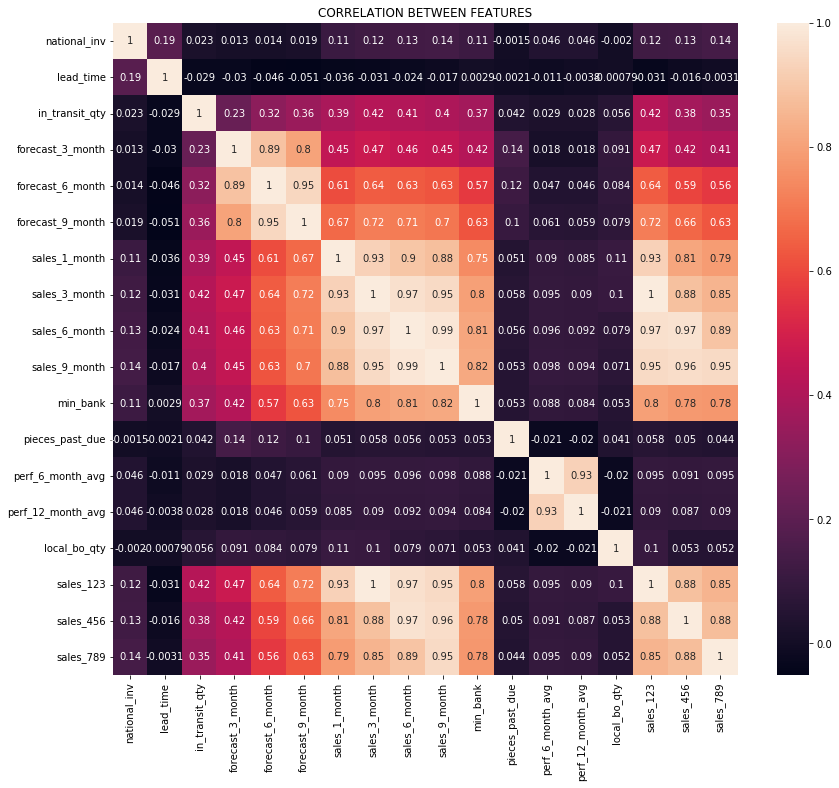

In [99]:
correlation = train_df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(correlation,annot=True)
plt.title('Correlation between features'.upper())
plt.show()

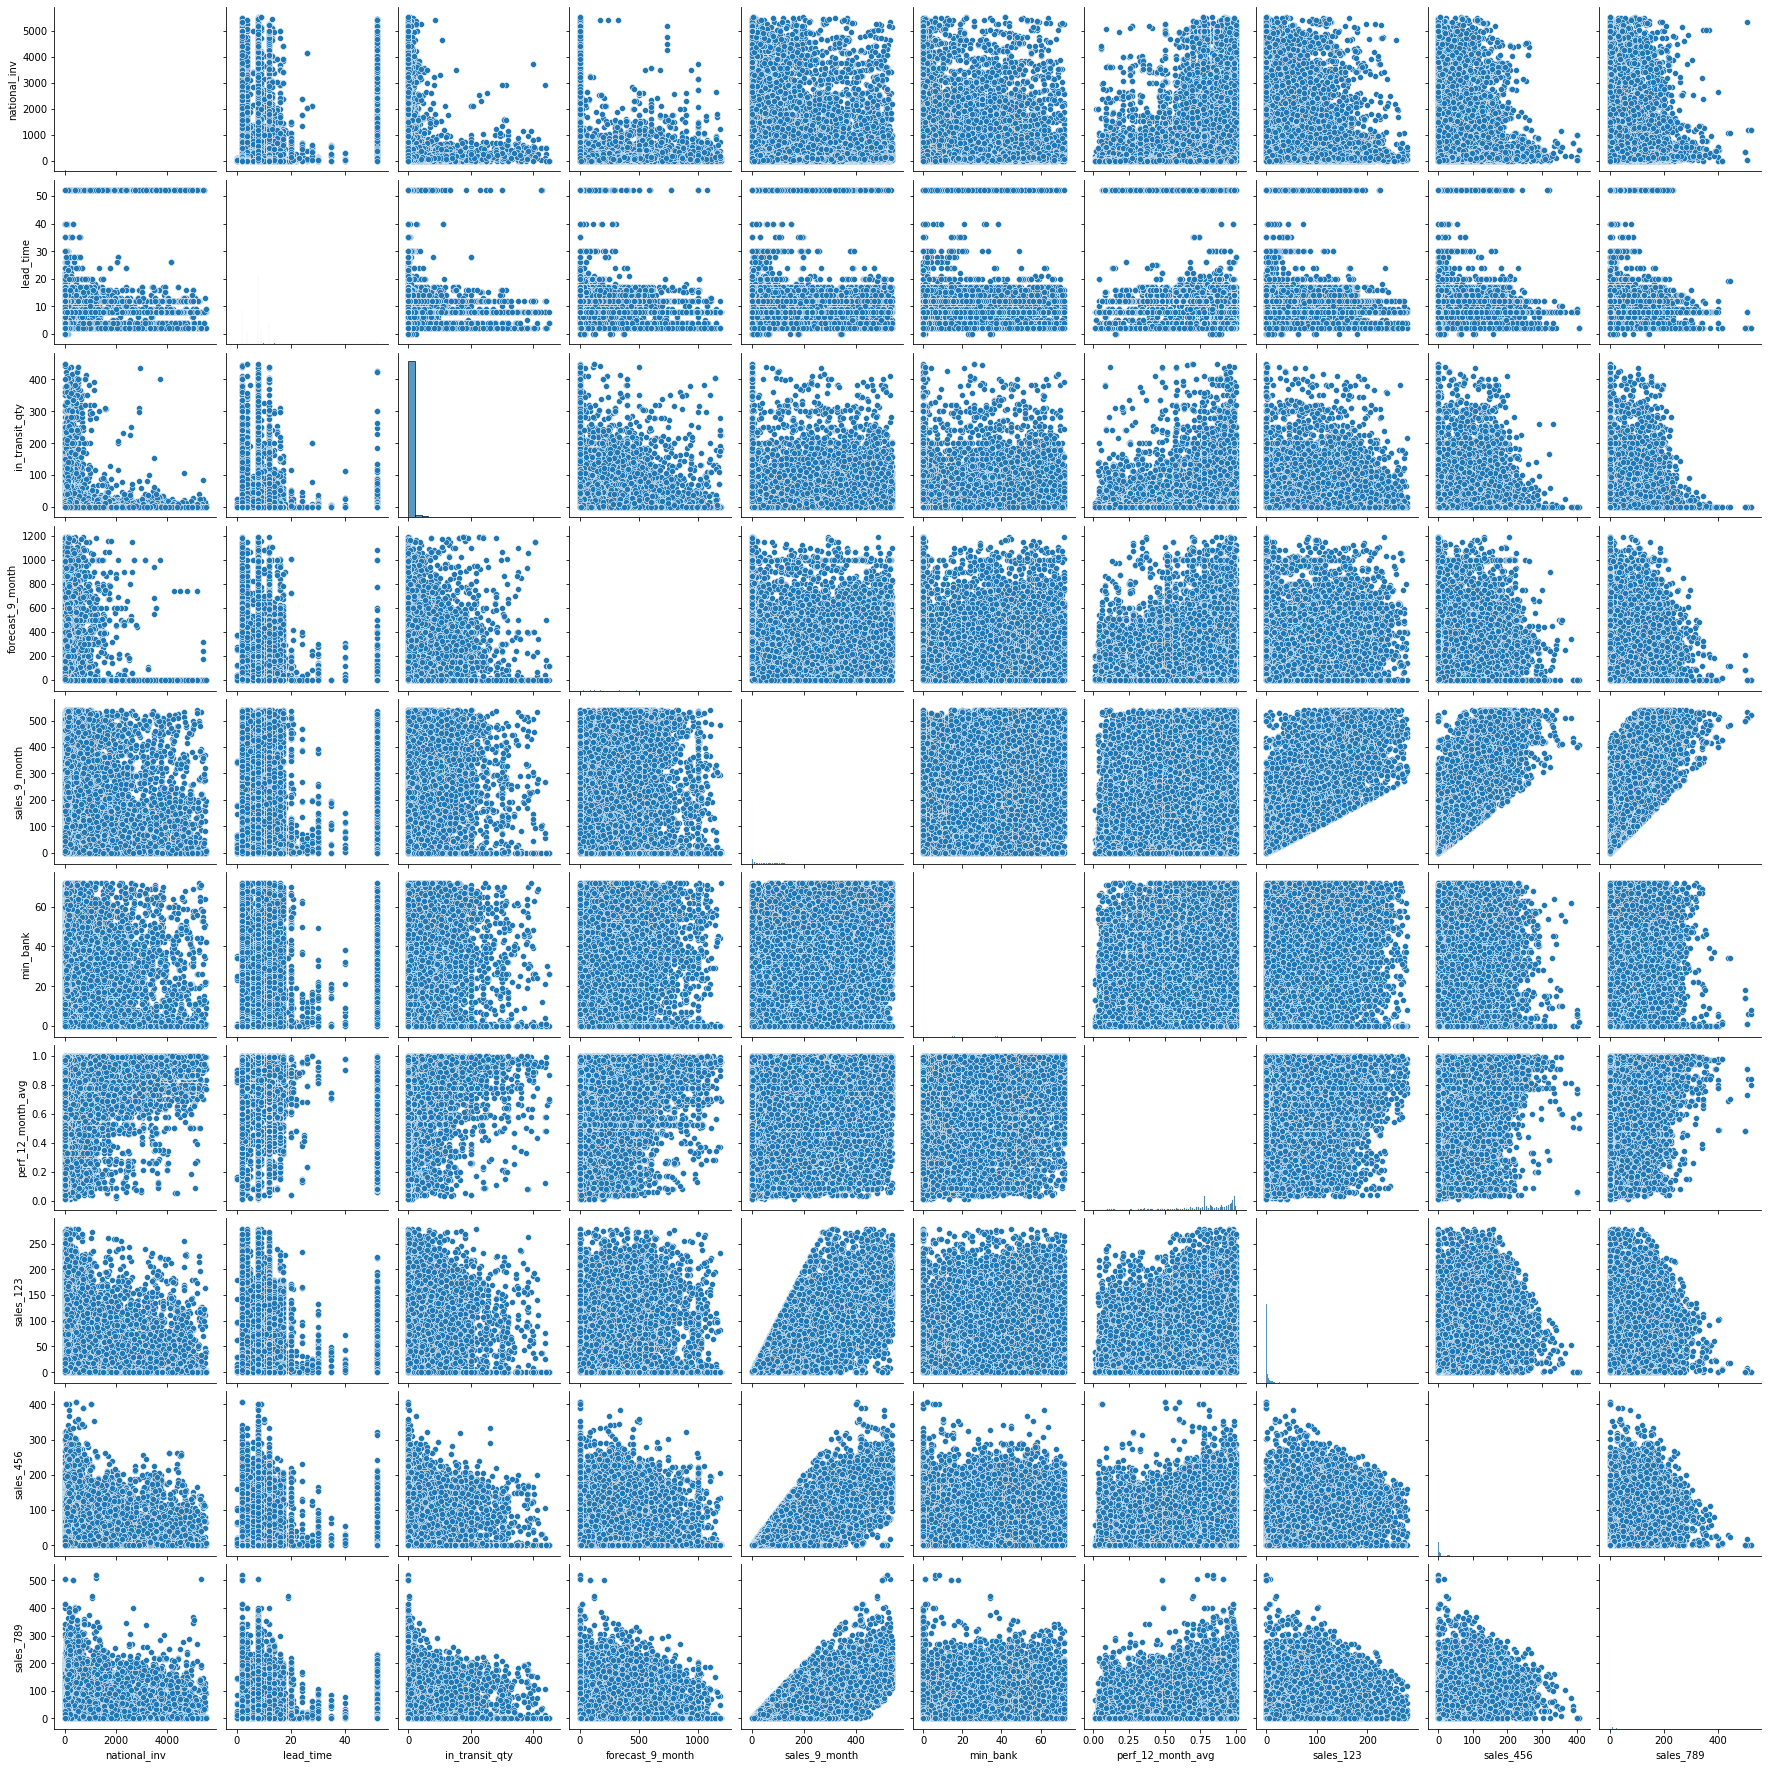

In [100]:
sns.pairplot(train_df[[ 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_9_month','sales_9_month',
       'min_bank',
       'perf_12_month_avg',
       'sales_123', 'sales_456', 'sales_789']])

- Sales till 1st month,3rd month,6th month and 9th month are highly correlted to each other and all of the sales_x_month features are also correlated with forecast.


- Minimum no of units required in the inventory and no.of units in transport are correlated with both forecast features and sales features.


- Sales of products are high for the products with lesser lead time.We can see a decline in the sales when lead time increases.


- We can see increase in performance scores as the forecast values increse.


- there are products with sales better in 1st 3 months and decreased in nxt months and there are products whose sales increased over the time

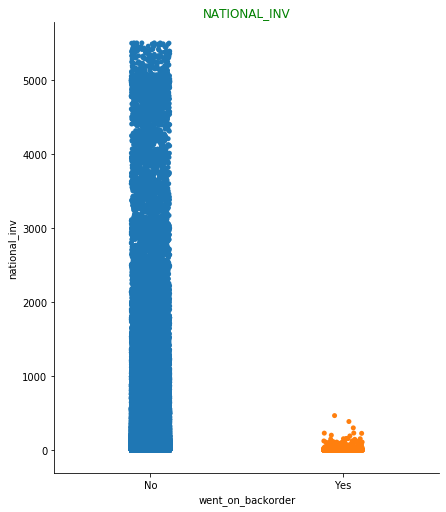

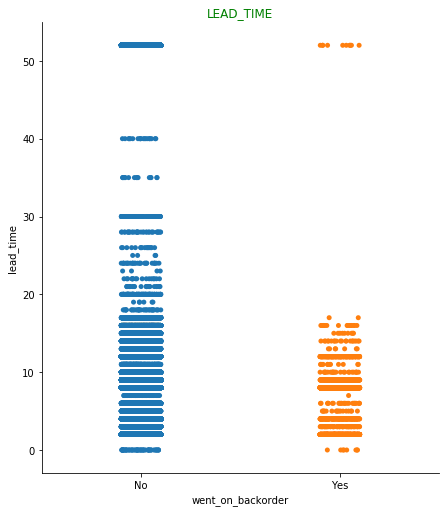

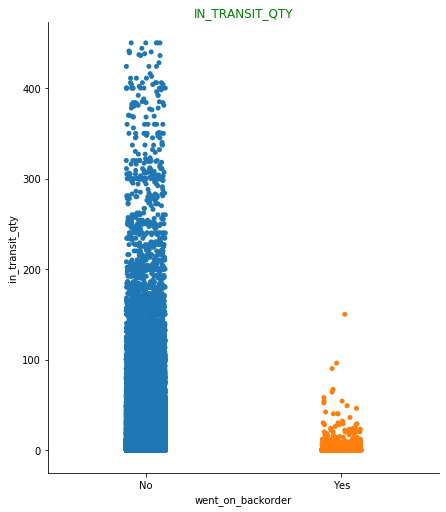

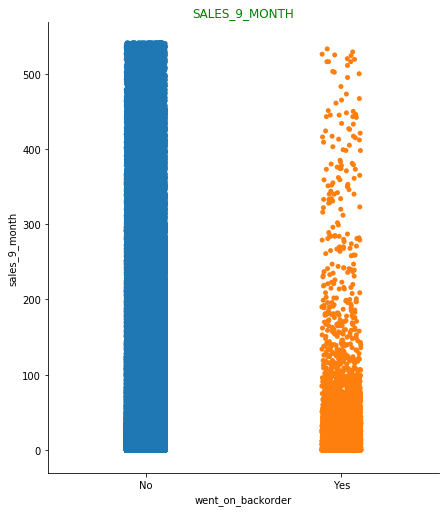

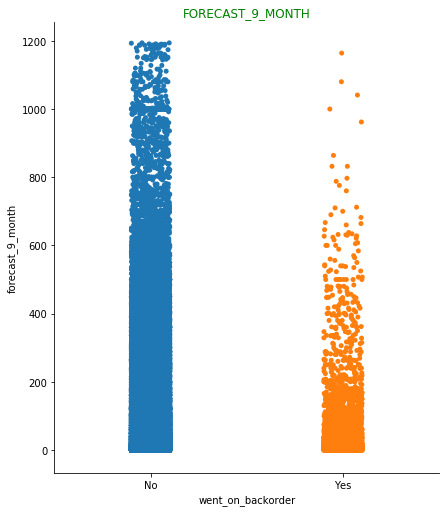

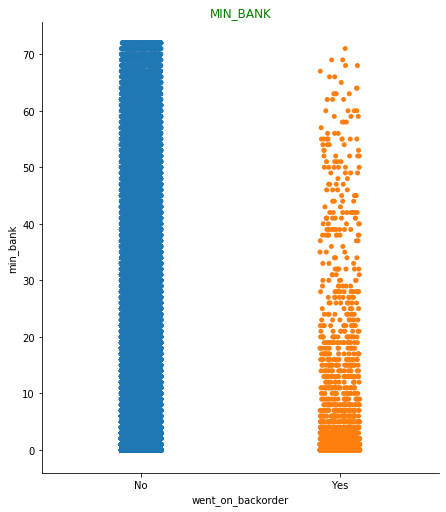

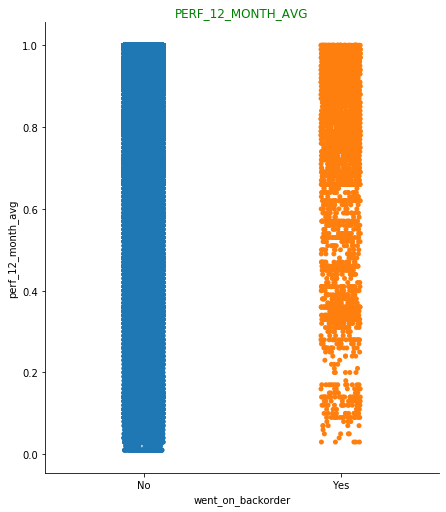

In [101]:
for column in ['national_inv','lead_time','in_transit_qty','sales_9_month','forecast_9_month','min_bank','perf_12_month_avg']:
    sns.catplot(data = train_df,y =column,x = 'went_on_backorder',height=7,aspect=0.9 )
    plt.title(column.upper(),color = 'green',fontdict={'fontsize':12})

- From the above plots we can observe that products that went on backorder have lesser amount of stock in the inventory,lesser no.of units in transport and lesser minimum no.of units that are required in stock.


- There are no backorders when lead time is between 20 and 40 days.


- Products that went on backorder have lower sales and forecast values.


- Backorder products are dense at high performance values.

<h3>Observations:</h3>
--------------------------
<i>
<b>
<font color ='green'>

- All the sales features and forecast features are highly correlated to each other,so including any one of the sales feature and any one of the forecast feature will be sufficient for builiding the model.
    
    
- From the above plots general risk flags seem to be important because there is some difference we can observe between the IQR of backorder and non-backorder products whether there is a risk or not.
    
    
- General risk flags could be useful for Tree based models.
    
    

<h2> 3.4 Feature Engineering </h2>

#### What Causes Backorders?

Following are the common causes of Backorders: 

1. Unusual demand or demand exceeds supply.
2. Inaccurate forecasting.
3. Supplier or manufacturing issue.
4. Delayed orders.
5. Human errors.
6. Warehouse management discrepancies.


- From the data, a feature for inaccurate forecasting can be created by subtracting forecast from sales which could help in the classification.

- Also when subtracting avg performance in 6 months from performance in 12 months we can obtain a feature which indicate decrease or increase in performance.

- A feature can be created by checking if minimum amount of stock is maintained or not by the following condition
      national_inv >= min_bank.

- As already seen unusual demand didn't seem to be helpful in classifying of backorder products.

<h3> 3.4.1 Inaccurate forecasting </h3>

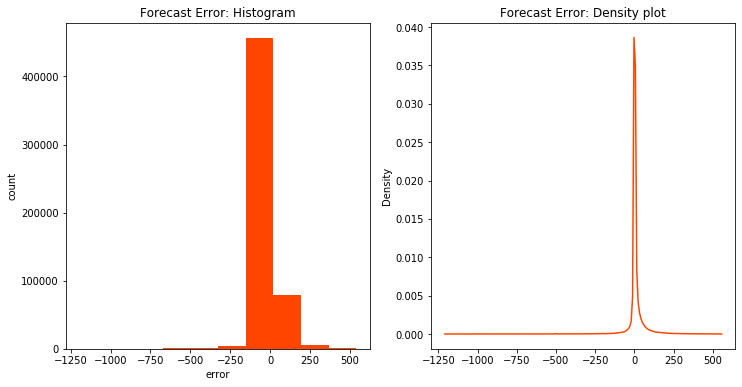

In [102]:
forecast_error = train_df['sales_9_month'] - train_df['forecast_9_month']
train_df['forecast_error'] = forecast_error

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(forecast_error,color = 'orangered');
plt.xlabel('error')
plt.ylabel('count')
plt.title('Forecast Error: Histogram')

plt.subplot(122)
sns.kdeplot(forecast_error,color = 'orangered')
plt.title('Forecast Error: Density plot')

plt.show()

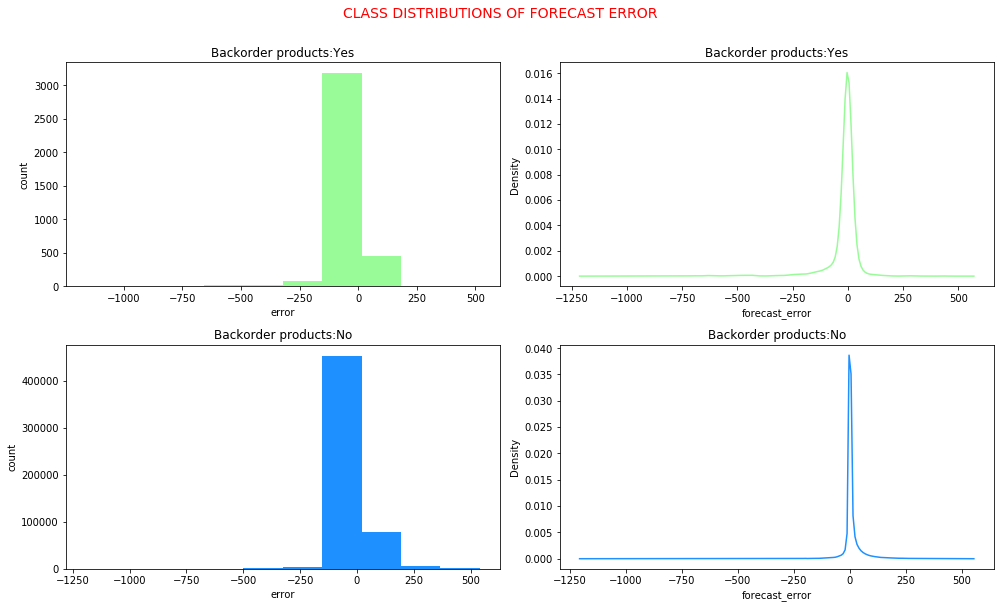

In [103]:
i = 1
colors = ['palegreen','dodgerblue']
fig = plt.figure(figsize=(14,8))
for went_on_backorder in ['Yes','No']:
    plt.subplot(2,2,i)
    plt.hist(train_df[train_df['went_on_backorder'] == went_on_backorder]['forecast_error'],color = colors[0] if went_on_backorder == 'Yes' else colors[1])
    plt.xlabel('error')
    plt.ylabel('count')
    plt.title('Backorder products:'+went_on_backorder)
    
    plt.subplot(2,2,i+1)
    sns.kdeplot(train_df[train_df['went_on_backorder'] == went_on_backorder]['forecast_error'],color = colors[0] if went_on_backorder == 'Yes' else colors[1])
    plt.title('Backorder products:'+went_on_backorder)
    
    plt.tight_layout()
    i+=2
plt.suptitle('class distributions of forecast error'.upper(),color = 'red',y = 1.05,fontsize = 14);

<h3>Observations:</h3>
--------------------------
<i>
<b>
<font color ='green'>
    
- There is a noticable difference present in the forecast error values between backorder and non-backorder products,there are more -ve values in non-back order products while there are more positive points in backorder products.
    
    
- Forecast error could be a useful feature for classification.

<h3> 3.4.2 Performance Change </h3>

In [104]:
performace_last_6_months = train_df['perf_12_month_avg'] - train_df['perf_6_month_avg']
print('There are ',sum((train_df['perf_12_month_avg'] - train_df['perf_6_month_avg'])<0),' products whose performance decreased after the first six months')

There are  238172  products whose performance decreased after the first six months


(array([2.000e+00, 1.000e+00, 1.000e+00, 4.000e+01, 1.290e+02, 1.506e+03,
        1.920e+03, 1.560e+02, 2.400e+01, 5.000e+00]),
 array([-0.8  , -0.667, -0.534, -0.401, -0.268, -0.135, -0.002,  0.131,
         0.264,  0.397,  0.53 ]),
 <a list of 10 Patch objects>)

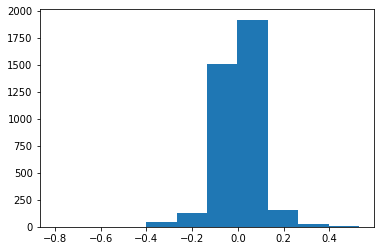

In [105]:
plt.hist(performace_last_6_months[train_df['went_on_backorder'] == 'Yes'])

(array([2.10000e+02, 3.11000e+02, 1.10500e+03, 7.27100e+03, 8.59390e+04,
        4.20596e+05, 2.59920e+04, 2.32000e+03, 1.52000e+02, 7.40000e+01]),
 array([-0.8  , -0.649, -0.498, -0.347, -0.196, -0.045,  0.106,  0.257,
         0.408,  0.559,  0.71 ]),
 <a list of 10 Patch objects>)

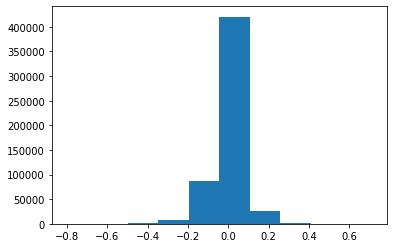

In [106]:
plt.hist(performace_last_6_months[train_df['went_on_backorder'] == 'No'])

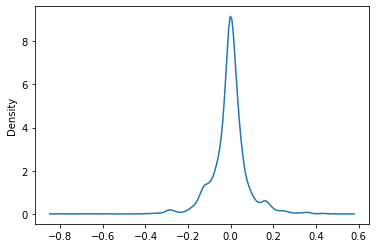

In [107]:
sns.kdeplot(performace_last_6_months[train_df['went_on_backorder'] == 'Yes'])

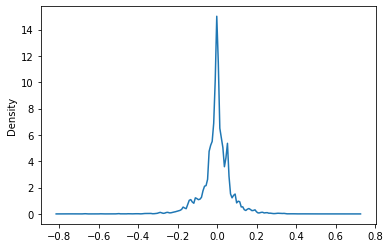

In [108]:
sns.kdeplot(performace_last_6_months[train_df['went_on_backorder'] == 'No'])

<h3>3.4.3 Minimum bank error </h3>

- if minimum stock required is maintained

In [109]:
min_bank_error = train_df['national_inv'] > train_df['min_bank']
train_df['min_bank_error']  = min_bank_error


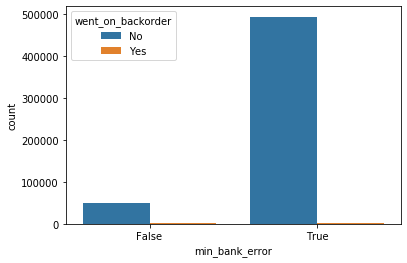

In [110]:
sns.countplot(data = train_df,x = 'min_bank_error',hue = 'went_on_backorder')

### 3.4.4 encoding categorical variables

In [111]:
for column in train_df.select_dtypes(include = 'object'):
    train_df[column] = np.where(train_df[column] == 'Yes',1,0)

In [113]:
train_df['min_bank_error'] = np.where(train_df['min_bank_error'] == True,1,0)

In [114]:
train_df['perf_decrease'] = performace_last_6_months

<h2> 3.5 Visualizing data using T-SNE </h2>

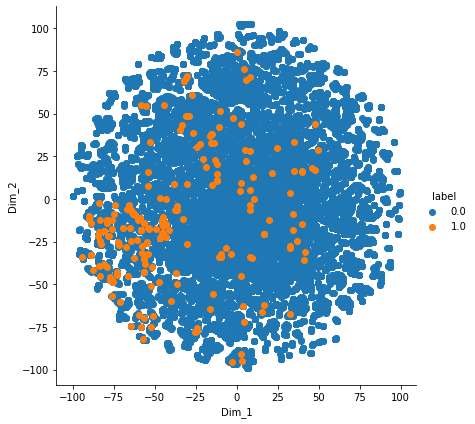

In [115]:
data = train_df.select_dtypes(include = 'number')
#data['y'] = train_df['went_on_backorder']
N = 30000
sample_data = data.groupby('went_on_backorder', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(data))))).sample(frac=1).reset_index(drop=True)
sample_data['went_on_backorder'].value_counts()

std_data = StandardScaler().fit_transform(sample_data.drop(['went_on_backorder'],axis = 1))
model = TSNE(n_components=2, random_state=0,perplexity=10,n_iter=1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, sample_data['went_on_backorder'].values)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

<h2>4.Constructing Machine Learning Model</h2>

<h3> 4.1 Train and Test Construction :Splitting data into Train, cross validation and test: Stratified Sampling</h3>

In [116]:
y = train_df['went_on_backorder']

X = train_df.drop(['went_on_backorder'],axis = 1,inplace = False)

In [117]:
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.25,random_state = 333,stratify = y)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.3,random_state = 333,stratify = y_train)


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(287570, 28) (287570,)
(136939, 28) (136939,)
(123245, 28) (123245,)


In [118]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("indigo")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [119]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [194]:
def plot_AUC(train_pred,test_pred,y = y_train ):
    
    fpr_test,tpr_test,thresholds_test = roc_curve(y_true=y_test,y_score=test_pred[:,1])
    fpr_train,tpr_train,thresholds_train = roc_curve(y_true=y,y_score=train_pred[:,1])

    precision_train, recall_train, _ = precision_recall_curve(y, train_pred[:,1])
    precision_test, recall_test, _ = precision_recall_curve(y_test, test_pred[:,1])

    print('Train ROC-AUC score for best alpha-value::',round(auc(fpr_train,tpr_train),3),'\n')
    print('Test ROC-AUC score for best alpha-value::',round(auc(fpr_test,tpr_test),3),'\n')

    print('\nTrain PR-AUC score for best alpha-value:: ',round(auc(recall_train, precision_train),3))
    print('Test PR-AUC score for best alpha-value:: ',round(auc(recall_test, precision_test),3))


    plt.figure(figsize=(16,6))

    plt.subplot(121)
    plt.title("ROC-AUC plot")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr_train,tpr_train,label = 'train-data')
    plt.plot(fpr_test,tpr_test,label = 'test-data')
    plt.legend()

    plt.subplot(122)
    plt.title("PR-AUC plot")
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.plot(recall_train,precision_train,label = 'train-data')
    plt.plot(recall_test,precision_test,label = 'test-data')
    plt.legend()

    plt.show()

    best_t = find_best_threshold(thresholds_train, fpr_train, tpr_train)
    print('\n\t\t\t#####','TRAIN CONFUSION MATRIX','#####')
    plot_confusion_matrix(y_train, predict_with_best_t(train_pred[:,1], best_t))
    print('\t\t\t#####','TEST CONFUSION MATRIX','#####')
    plot_confusion_matrix(y_test, predict_with_best_t(test_pred[:,1], best_t))

In [202]:
def model_interpretabiltiy(test_pred,feat_imp):
    plt.figure(figsize=(12,8))
    plt.bar(range(len(X_train.columns)),feat_imp.values())
    plt.xlabel('FEATURE')
    plt.ylabel('WEIGHT')
    plt.title('FEATURE IMPORTANCES',color = 'red',fontdict={'fontsize':14})
    for i, feat,imp in zip(range(len(feat_imp.keys())),feat_imp.keys(),feat_imp.values()):
        plt.text(i ,imp  , str(feat), color='k', fontstyle='italic',rotation = 90)
    plt.show()
    
    '''test = np.array(test_pred)
    pos_indices = np.where((y_test==1)&(np.argmax(test,axis = 1) == 1))
    index = pos_indices[0]
    
    print('For a product that has been predicted to be Backordered has values of important features as:')
    print('-'*92)
    print('\n',X_test.iloc[index][list(feat_imp.keys())[-10:]].to_string())

    print('\n\n\nTop 5 important Backorder feature values for a product that didnt go on Backorder:')
    print('-'*80)
    print('\n',X_test.iloc[2][list(feat_imp.keys())[-10:]].to_string())'''

<h2>4.2 Training Machine learning models on data</h2>

#### Normalizing the data

In [121]:
columns_to_normalize = ['national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty','sales_123', 'sales_456',
       'sales_789', 'forecast_error', 'perf_decrease']
normalizer = MinMaxScaler()

X_train[columns_to_normalize] = normalizer.fit_transform(X_train[columns_to_normalize])
X_cv[columns_to_normalize] = normalizer.transform(X_cv[columns_to_normalize])
X_test[columns_to_normalize] = normalizer.transform(X_test[columns_to_normalize])

<h4> 4.2.1 Building Random Model to find the worst AUC score</h4>

AUC score under roc curve for the worst model: 0.477
AUC score under precision-recall curve for the worst model: 0.006


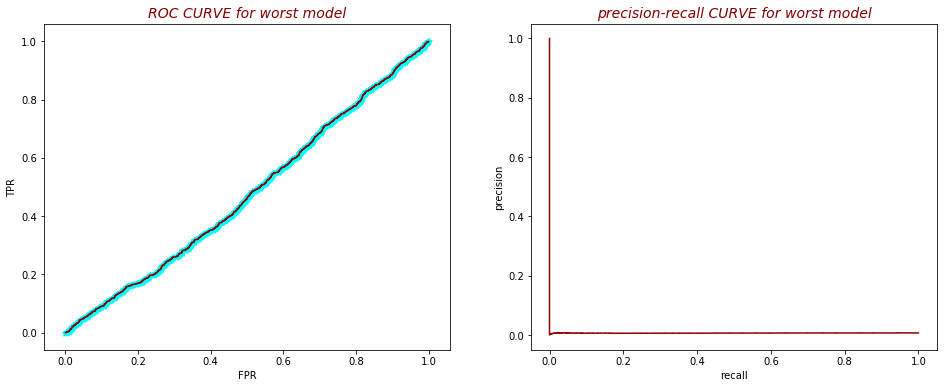

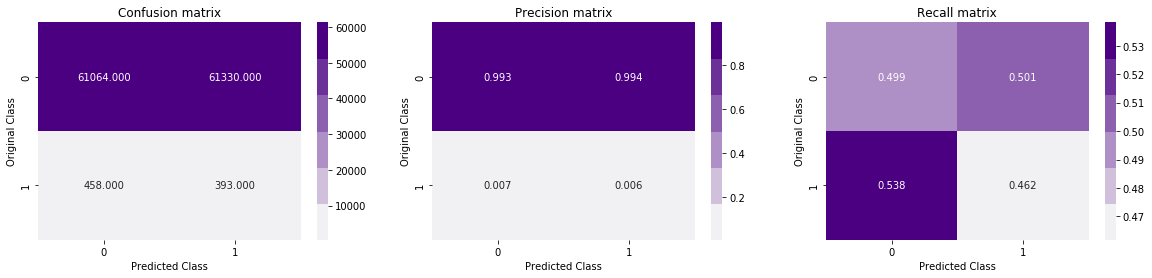

In [122]:
predicted_y = np.zeros((y_test.shape[0],2))
for i in range(y_test.shape[0]):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
    

pos_probs = predicted_y[:, 1]
# calculate the precision-recall auc
fpr, tpr, _ = roc_curve(y_test, pos_probs)
auc_score = roc_auc_score(y_test, pos_probs)
print('AUC score under roc curve for the worst model: %.3f' % auc_score)

precision, recall, _ = precision_recall_curve(y_test, pos_probs)
auc_score = auc(recall, precision)
print('AUC score under precision-recall curve for the worst model: %.3f' % auc_score)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(fpr,tpr,color = 'darkred')
plt.scatter(fpr,tpr,color = 'cyan',marker = '*')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE for worst model',color = 'maroon',fontdict={'fontsize':14,'fontstyle':'oblique'})

plt.subplot(122)
plt.plot(recall,precision,color = 'darkred')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall CURVE for worst model',color = 'maroon',fontdict={'fontsize':14,'fontstyle':'oblique'})
plt.show()

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h3> 4.2.2 Applying Logistic Regression </h3> 

In [123]:
%%time
alpha = [10 ** x for x in range(-5, 4)]
train_auc = []
train_auc_PR = []
cv_auc = []
cv_auc_PR = []

for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight={ 0:0.1, 1:0.9 })
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    
    train_pred = sig_clf.predict_proba(X_train)[:,1]
    #train_pred = logisticR.predict_proba(X_train)[:,1]
    train_auc.append(roc_auc_score(y_true=y_train,y_score=train_pred))
    precision_train, recall_train, _ = precision_recall_curve(y_train, train_pred)
    train_auc_PR.append(auc(recall_train,precision_train))
    
    cv_pred = sig_clf.predict_proba(X_cv)[:,1]
    #cv_pred = logisticR.predict_proba(X_cv)[:,1]
    cv_auc.append(roc_auc_score(y_true=y_cv,y_score=cv_pred))
    precision_cv, recall_cv, _ = precision_recall_curve(y_cv, cv_pred)
    cv_auc_PR.append(auc(recall_cv,precision_cv))


CPU times: user 3min 36s, sys: 2.8 s, total: 3min 39s
Wall time: 1min 50s



 				 ROC-AUC scores:
			 *************************** 

alpha: 1e-05 		train AUC : 0.756 		cv AUC:  0.744
alpha: 0.0001 		train AUC : 0.756 		cv AUC:  0.744
alpha: 0.001 		train AUC : 0.759 		cv AUC:  0.75
alpha: 0.01 		train AUC : 0.777 		cv AUC:  0.775
alpha: 0.1 		train AUC : 0.822 		cv AUC:  0.816
alpha: 1 		train AUC : 0.843 		cv AUC:  0.834
alpha: 10 		train AUC : 0.861 		cv AUC:  0.85
alpha: 100 		train AUC : 0.873 		cv AUC:  0.863
alpha: 1000 		train AUC : 0.878 		cv AUC:  0.868

 				 PR-AUC scores:
			 *************************** 

alpha: 1e-05 		train AUC : 0.037 		cv AUC:  0.038
alpha: 0.0001 		train AUC : 0.037 		cv AUC:  0.039
alpha: 0.001 		train AUC : 0.038 		cv AUC:  0.041
alpha: 0.01 		train AUC : 0.044 		cv AUC:  0.046
alpha: 0.1 		train AUC : 0.05 		cv AUC:  0.049
alpha: 1 		train AUC : 0.051 		cv AUC:  0.048
alpha: 10 		train AUC : 0.056 		cv AUC:  0.055
alpha: 100 		train AUC : 0.062 		cv AUC:  0.063
alpha: 1000 		train AUC : 0.064 		cv AUC:  0.065


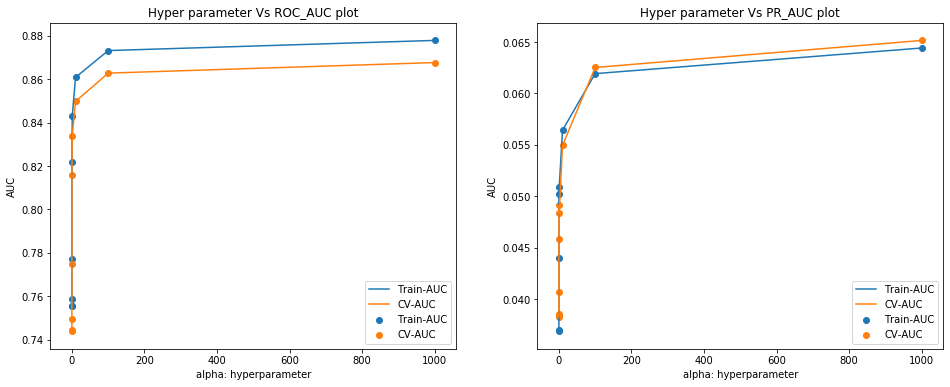

In [124]:
print('\n','\t'*4,'ROC-AUC scores:')
print('\t'*3,'*'*27,'\n')
for a,train_score,cv_score in zip(alpha,train_auc,cv_auc):
    print('alpha:',a,'\t\ttrain AUC :',round(train_score,3),'\t\tcv AUC: ',round(cv_score,3))
    
print('\n','\t'*4,'PR-AUC scores:')
print('\t'*3,'*'*27,'\n')
for a,train_score,cv_score in zip(alpha,train_auc_PR,cv_auc_PR):
    print('alpha:',a,'\t\ttrain AUC :',round(train_score,3),'\t\tcv AUC: ',round(cv_score,3))
    
    
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(alpha,train_auc,label = 'Train-AUC')
plt.plot(alpha,cv_auc,label = 'CV-AUC')

plt.scatter(alpha,train_auc,label = 'Train-AUC')
plt.scatter(alpha,cv_auc,label = 'CV-AUC');

plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs ROC_AUC plot")

plt.legend();

plt.subplot(122)
plt.plot(alpha,train_auc_PR,label = 'Train-AUC')
plt.plot(alpha,cv_auc_PR,label = 'CV-AUC')

plt.scatter(alpha,train_auc_PR,label = 'Train-AUC')
plt.scatter(alpha,cv_auc_PR,label = 'CV-AUC');

plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs PR_AUC plot")

plt.legend();

plt.show()

best parameter: 1000
Train ROC-AUC score for best alpha-value:: 0.878 

Test ROC-AUC score for best alpha-value:: 0.877 


Train PR-AUC score for best alpha-value::  0.064
Test PR-AUC score for best alpha-value::  0.068


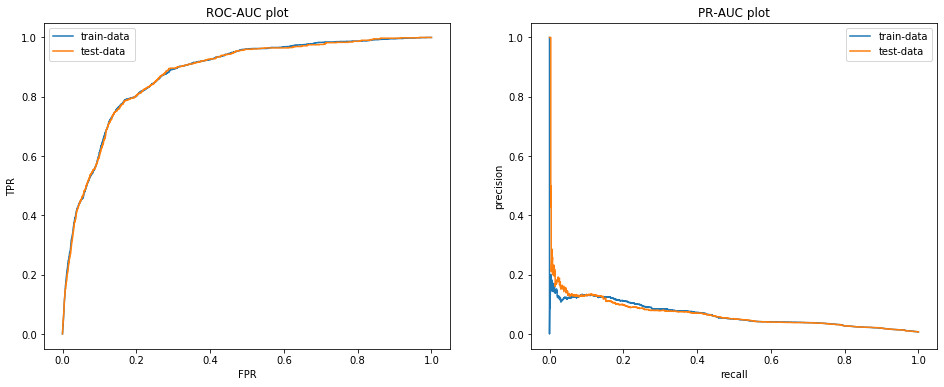

the maximum value of tpr*(1-fpr) 0.6556549528670478 for threshold 0.007

			##### TRAIN CONFUSION MATRIX #####


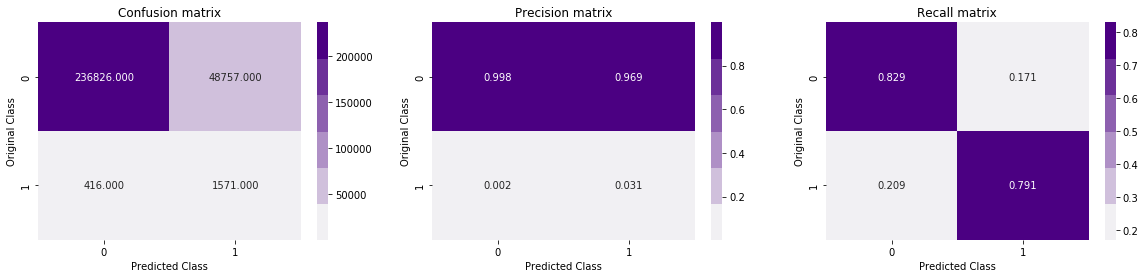

			##### TEST CONFUSION MATRIX #####


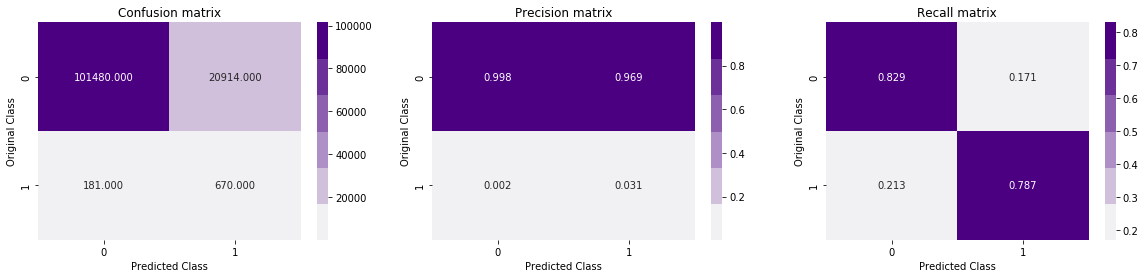

In [129]:
best_param = alpha[np.argmax(cv_auc_PR)]
print('best parameter:',best_param)

logisticR=LogisticRegression(penalty='l2',C=best_param,class_weight={ 0:0.1, 1:0.9 })
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)

train_pred = sig_clf.predict_proba(X_train)
test_pred = sig_clf.predict_proba(X_test)


plot_AUC(train_pred,test_pred)

<h4>Logistic Regression Feature Importance</h4>

FEATURE IMPORTANCE:
-------------------- 

sku 	  	: 0.0
national_inv 	  	: -83.48785997286211
lead_time 	  	: -4.149562652865245
in_transit_qty 	  	: -67.77003081337396
forecast_3_month 	  	: 2.2415292668919777
forecast_6_month 	  	: 5.453799036092759
forecast_9_month 	  	: -1.2539592643242685
sales_1_month 	  	: 5.666697932464393
sales_3_month 	  	: 2.18665398167922
sales_6_month 	  	: 0.6750614936095646
sales_9_month 	  	: -0.596595776567945
min_bank 	  	: -3.0834849919854017
potential_issue 	  	: 0.6985121020696218
pieces_past_due 	  	: 7.657851200807703
perf_6_month_avg 	  	: 0.1086341468019731
perf_12_month_avg 	  	: -0.6445067571975549
local_bo_qty 	  	: 18.92733890359869
deck_risk 	  	: -0.5846734565604548
oe_constraint 	  	: 5.929586620978776
ppap_risk 	  	: 0.025305097994736465
stop_auto_buy 	  	: -0.9498969226502453
rev_stop 	  	: -13.183389074751702
sales_123 	  	: 2.18665398167922
sales_456 	  	: -0.7708217818030216
sales_789 	  	: -1.1905967515735596
forecast_error 	  	: 

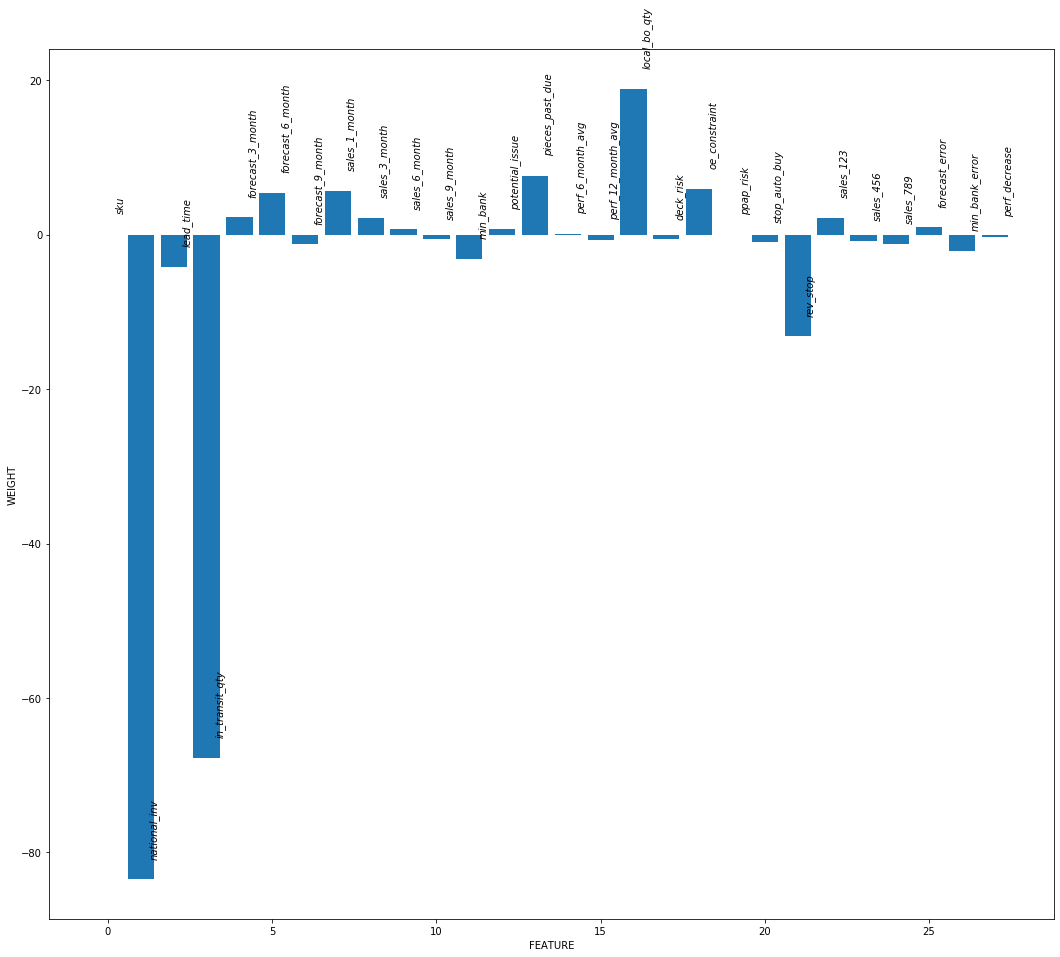

In [130]:
print('FEATURE IMPORTANCE:')
print('-'*20,'\n')
for column,importance in zip(X_train.columns,logisticR.coef_[0]):
    print(column,'\t ','\t:',importance)
    
plt.figure(figsize=(18,16))
plt.bar(range(len(X_train.columns)),logisticR.coef_[0])
plt.xlabel('FEATURE')
plt.ylabel('WEIGHT')
for i, feat,imp in zip(range(len(X_train.columns)),X_train.columns,logisticR.coef_[0]):
    plt.text(i + .25,imp + 3 , str(feat), color='k', fontstyle='italic',rotation = 'vertical')
plt.show();

feat_imp = dict(zip(X_train.columns,logisticR.coef_[0]))
neg_class_imp_features = {key:value for key,value in feat_imp.items() if value<0}
neg_class_imp_features = dict(sorted(neg_class_imp_features.items(), key=lambda item: item[1]))
pos_class_imp_features = {key:value for key,value in feat_imp.items() if value>0}
pos_class_imp_features = dict(sorted(pos_class_imp_features.items(), key=lambda item: item[1]))

<h3> 4.2.3 Applying Decision Tree </h3> 

In [156]:
%%time
clf_dt = DecisionTreeClassifier()
params = {'max_depth':[1, 5, 10, 50,100],'min_samples_split':[5, 10, 100, 500,1000],'class_weight':[{0:0.1,1:0.9},{0:0.3,1:0.7},{0:0.2,1:0.8},{0:0.4,1:0.6}]}
gd = GridSearchCV(cv=3,estimator=clf_dt,param_grid=params,return_train_score=True,scoring='roc_auc',n_jobs=-1)
gd.fit(X_train,y_train);

results = pd.DataFrame.from_dict(gd.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
depth =  results['param_max_depth']
min_samples = results['param_min_samples_split']
cls_weight = results['param_class_weight']

print('BEST-PARAMS:::\t',gd.best_params_)
print('BEST-SCORE:::\t',gd.best_score_)

BEST-PARAMS:::	 {'class_weight': {0: 0.4, 1: 0.6}, 'max_depth': 10, 'min_samples_split': 1000}
BEST-SCORE:::	 0.9166147183690011
CPU times: user 8.26 s, sys: 1.51 s, total: 9.76 s
Wall time: 7min 57s


Train ROC-AUC score for best alpha-value:: 0.957 

Test ROC-AUC score for best alpha-value:: 0.933 


Train PR-AUC score for best alpha-value::  0.201
Test PR-AUC score for best alpha-value::  0.162


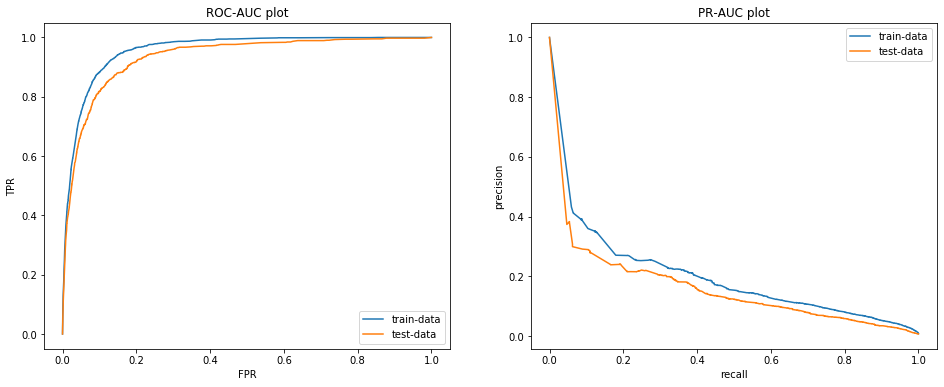

the maximum value of tpr*(1-fpr) 0.8035078019205386 for threshold 0.004

			##### TRAIN CONFUSION MATRIX #####


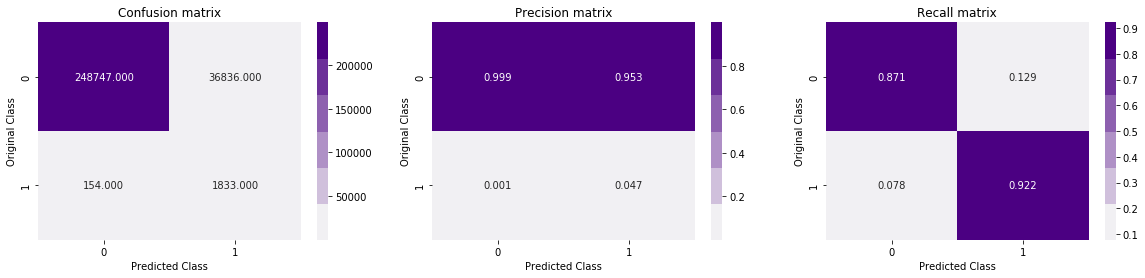

			##### TEST CONFUSION MATRIX #####


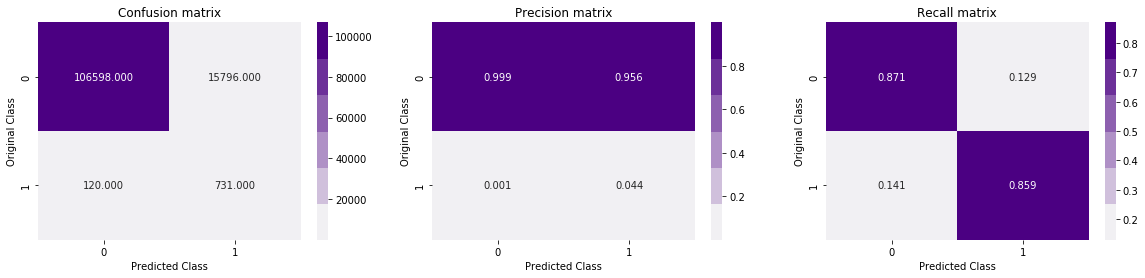

In [157]:
clf_dt = DecisionTreeClassifier(max_depth=10,min_samples_split=1000,class_weight={0:0.1,1:0.9})
clf_dt.fit(X_train,y_train)
calib_clf_dt = CalibratedClassifierCV(clf_dt,method="sigmoid")
calib_clf_dt.fit(X_train, y_train)

train_pred = calib_clf_dt.predict_proba(X_train)
test_pred = calib_clf_dt.predict_proba(X_test)


plot_AUC(train_pred,test_pred)

<h4>Feature Importance</h4>

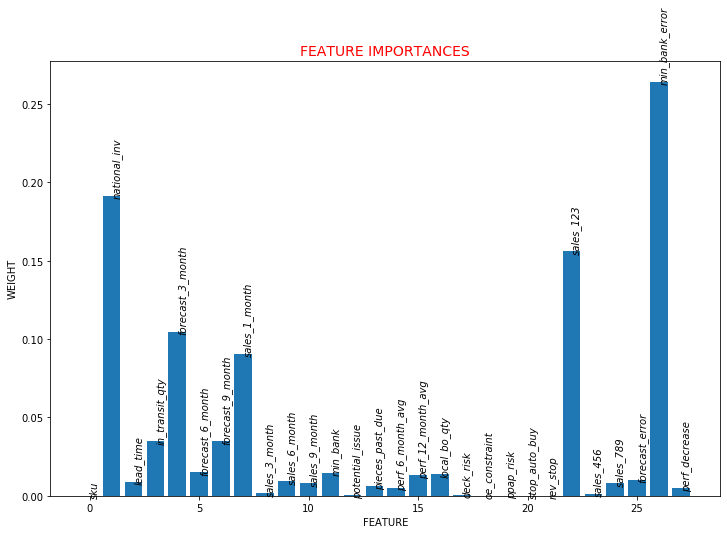

In [211]:
dt_feat_imp = dict(zip(X_train.columns,np.round(clf_dt.feature_importances_,4)))
model_interpretabiltiy(test_pred,dt_feat_imp)

<h3>4.2.4 Applying Random Forest </h3>

In [159]:
%%time
clf_rf = RandomForestClassifier()
params = {'n_estimators':[10,50,100,200],'max_depth':[1, 5, 10,15],\
          'class_weight':[{0:0.1,1:0.9},{0:0.3,1:0.7},{0:0.2,1:0.8}]\
         }
gd = GridSearchCV(cv=3,estimator=clf_rf,param_grid=params,return_train_score=True,scoring='roc_auc',n_jobs=-1)
gd.fit(X_train,y_train);

results = pd.DataFrame.from_dict(gd.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
depth =  results['param_max_depth']
cls_weight = results['param_class_weight']

print('BEST-PARAMS:::\t',gd.best_params_)
print('BEST-SCORE:::\t',gd.best_score_)

BEST-PARAMS:::	 {'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 15, 'n_estimators': 100}
BEST-SCORE:::	 0.947044866487421
CPU times: user 32.9 s, sys: 752 ms, total: 33.7 s
Wall time: 19min 7s


Train ROC-AUC score for best alpha-value:: 0.999 

Test ROC-AUC score for best alpha-value:: 0.955 


Train PR-AUC score for best alpha-value::  0.908
Test PR-AUC score for best alpha-value::  0.286


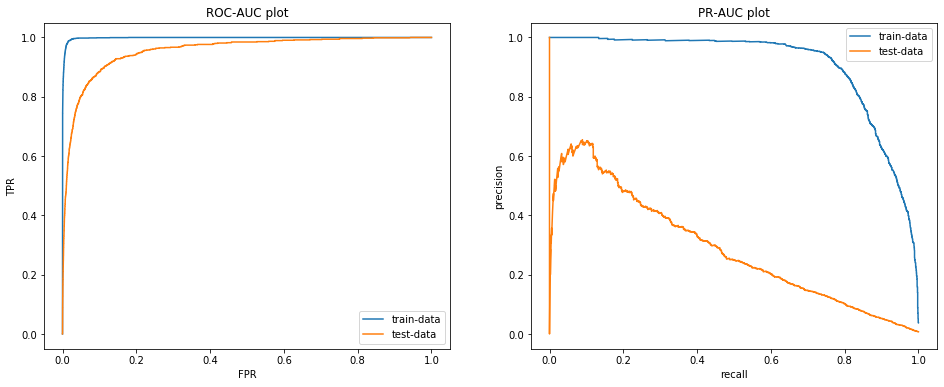

the maximum value of tpr*(1-fpr) 0.9725275389607706 for threshold 0.014

			##### TRAIN CONFUSION MATRIX #####


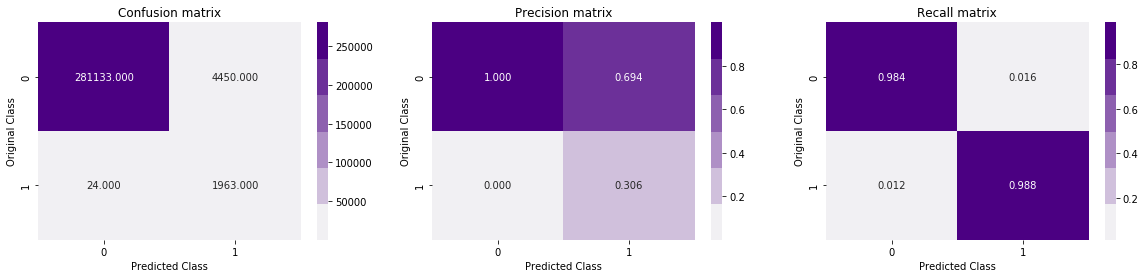

			##### TEST CONFUSION MATRIX #####


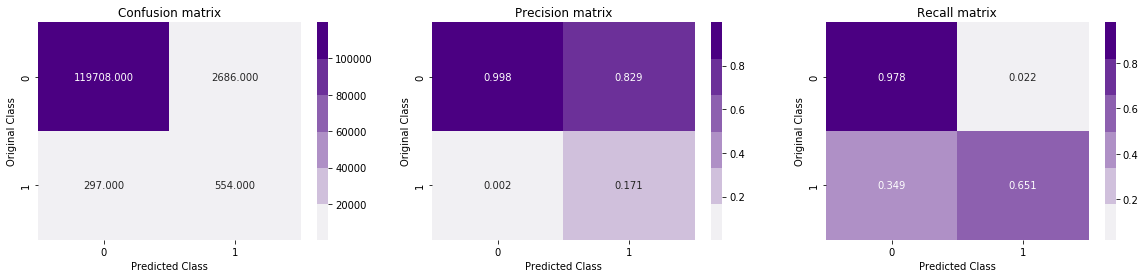

CPU times: user 6min 20s, sys: 224 ms, total: 6min 20s
Wall time: 6min 19s


In [160]:
%%time
clf_rf = RandomForestClassifier(n_estimators= 200,max_depth=15,class_weight={0:0.3,1:0.7})
clf_rf.fit(X_train,y_train)
calib_clf_rf = CalibratedClassifierCV(clf_rf,method="sigmoid")
calib_clf_rf.fit(X_train, y_train)

train_pred = calib_clf_rf.predict_proba(X_train)
test_pred = calib_clf_rf.predict_proba(X_test)


plot_AUC(train_pred,test_pred)

<h4>Feature Importance</h4>

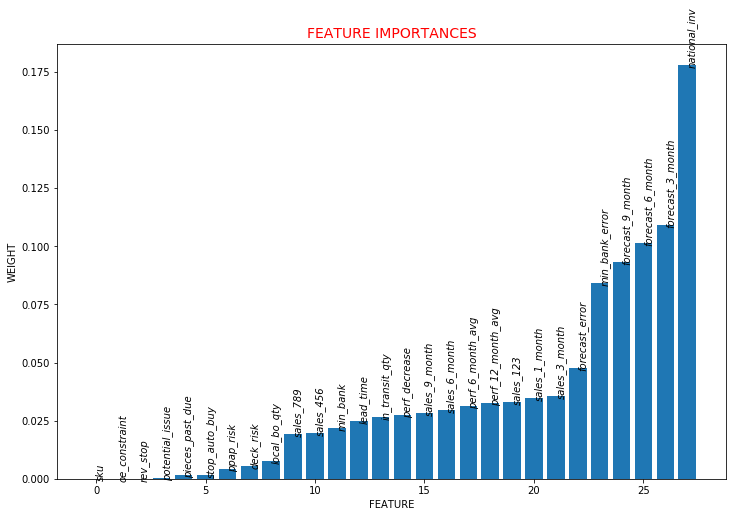

In [210]:
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
rf_feat_imp = dict(zip(X_train.columns,np.round(clf_rf.feature_importances_,4)))
rf_feat_imp = {k: v for k, v in sorted(rf_feat_imp.items(), key=lambda item: item[1])}
model_interpretabiltiy(test_pred,rf_feat_imp)

<h3>4.2.5 Applying XGBoost </h3>

In [162]:
%%time
params = {
    'max_depth':[5,10,15,20],
    'min_child_weight':[10,20,30,50]
}


xgb_clf = XGBClassifier(n_estimators = 500,learning_rate = 0.02,objective='binary:logistic',early_stopping_rounds = 10,eval_metric = 'auc',\
                       scale_pos_weight=143)

gd = GridSearchCV(cv=3,estimator=xgb_clf,param_grid=params,return_train_score=True,scoring='roc_auc',n_jobs=-1)
gd.fit(X_train,y_train);

results = pd.DataFrame.from_dict(gd.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score']

print('BEST-PARAMS:::\t',gd.best_params_)
print('BEST-SCORE:::\t',gd.best_score_)

BEST-PARAMS:::	 {'max_depth': 20, 'min_child_weight': 50}
BEST-SCORE:::	 0.943986405795968
CPU times: user 14min 33s, sys: 812 ms, total: 14min 34s
Wall time: 3h 8min 4s


Train ROC-AUC score for best alpha-value:: 0.973 

Test ROC-AUC score for best alpha-value:: 0.948 


Train PR-AUC score for best alpha-value::  0.247
Test PR-AUC score for best alpha-value::  0.191


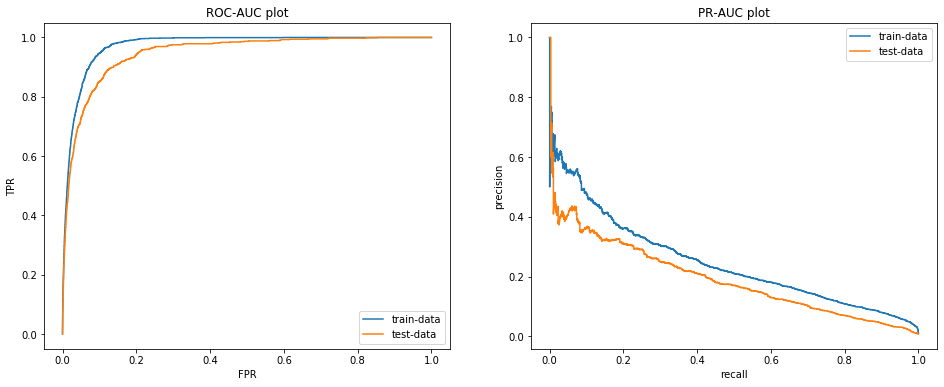

the maximum value of tpr*(1-fpr) 0.8543852905946266 for threshold 0.007

			##### TRAIN CONFUSION MATRIX #####


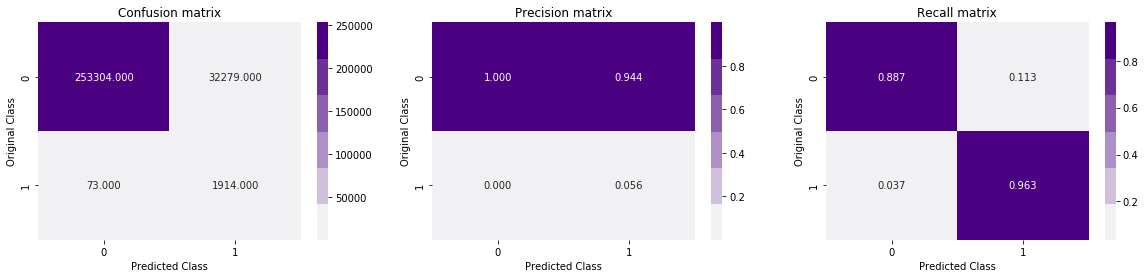

			##### TEST CONFUSION MATRIX #####


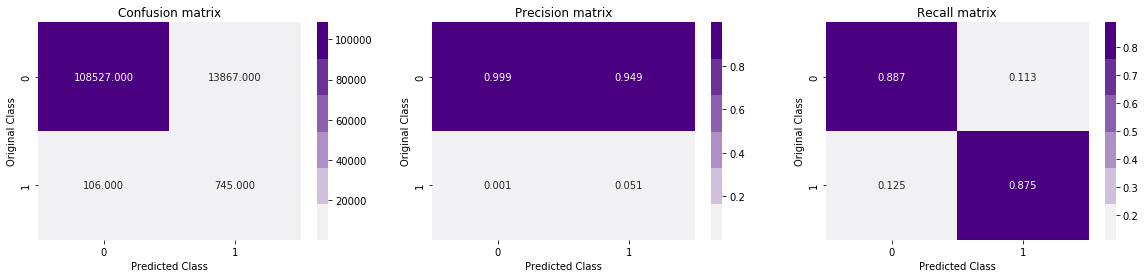

CPU times: user 19min 51s, sys: 580 ms, total: 19min 51s
Wall time: 19min 51s


In [163]:
%%time
clf_xgb = XGBClassifier(n_estimators= 500,learning_rate = 0.02,\
                                 objective='binary:logistic',early_stopping_rounds = 10,eval_metric = 'auc',\
                                 max_depth=5,min_child_weight=50,scale_pos_weight=144,subsample = 0.8)
clf_xgb.fit(X_train,y_train)
calib_clf_xgb = CalibratedClassifierCV(clf_xgb,method="sigmoid")
calib_clf_xgb.fit(X_train, y_train)

train_pred = calib_clf_xgb.predict_proba(X_train)
test_pred = calib_clf_xgb.predict_proba(X_test)


plot_AUC(train_pred,test_pred)

<h4>Feature Importance</h4>

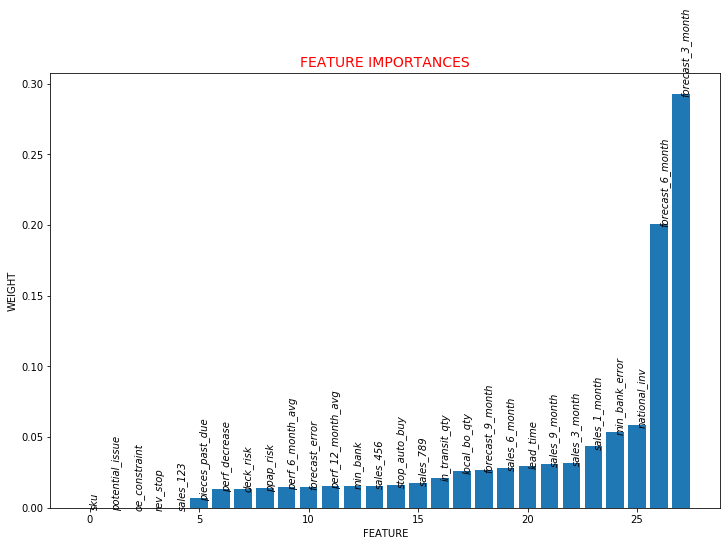

In [209]:
xgb_feat_imp = dict(sorted(xgb_feat_imp.items(), key=lambda item: item[1]))
model_interpretabiltiy(test_pred,xgb_feat_imp)

<h3> 4.2.6 Applying BalancedRandomForestClassifier on data </h3>

<h4> Hyperparamter Tuning </h4>

In [181]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier()
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.9438477746621727


Train ROC-AUC score for best alpha-value:: 0.975 

Test ROC-AUC score for best alpha-value:: 0.944 


Train PR-AUC score for best alpha-value::  0.351
Test PR-AUC score for best alpha-value::  0.176


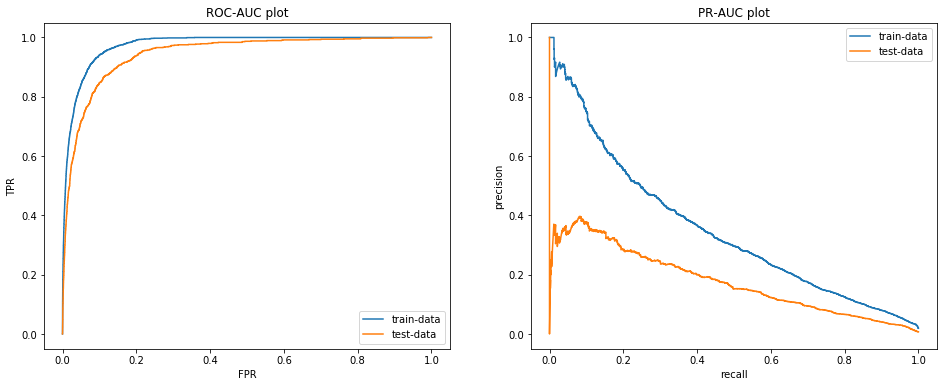

the maximum value of tpr*(1-fpr) 0.8472188997517737 for threshold 0.013

			##### TRAIN CONFUSION MATRIX #####


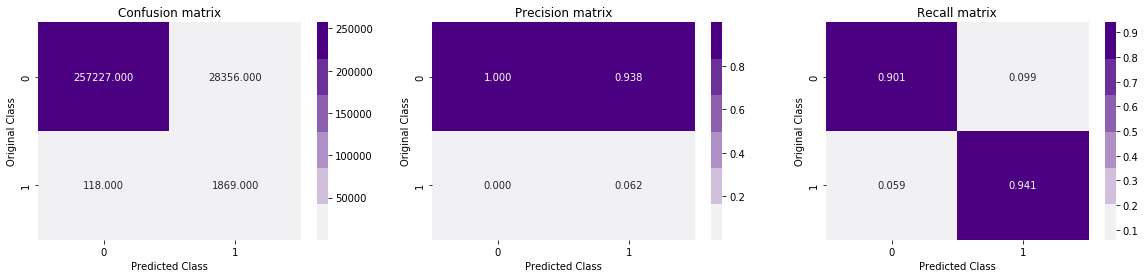

			##### TEST CONFUSION MATRIX #####


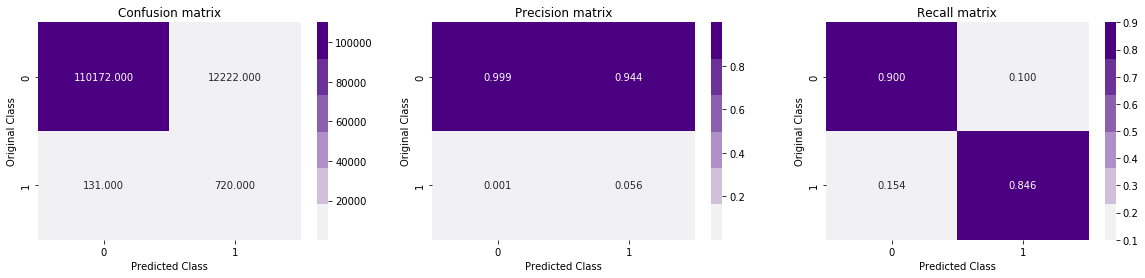

CPU times: user 14min 53s, sys: 5.71 s, total: 14min 59s
Wall time: 6min 31s


In [182]:
%%time
clf_brf = BalancedRandomForestClassifier(n_estimators = gs.best_params_['n_estimators'],n_jobs=-1)
clf_brf.fit(X_train, y_train)
calib_clf_xgb = CalibratedClassifierCV(clf_brf,method="sigmoid")
calib_clf_xgb.fit(X_train, y_train)

train_pred = calib_clf_xgb.predict_proba(X_train)
test_pred = calib_clf_xgb.predict_proba(X_test)


plot_AUC(train_pred,test_pred)

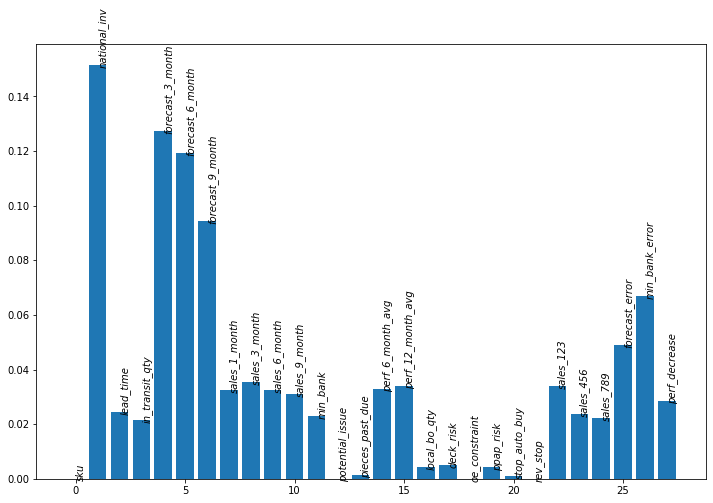

In [183]:
brf_feat_imp = dict(zip(X_train.columns,clf_brf.feature_importances_))
plt.figure(figsize=(12,8))
plt.bar(range(len(X_train.columns)),brf_feat_imp.values())
for i, feat,imp in zip(range(len(brf_feat_imp.keys())),brf_feat_imp.keys(),brf_feat_imp.values()):
    plt.text(i ,imp  , str(feat), color='k', fontstyle='italic',rotation = 90)
plt.show()

<h2>4.3 Training Models with Resampled Data</h2>

### 4.3.1 Naive random over-sampling

In [207]:
X = X_train
y = y_train

over = RandomOverSampler(sampling_strategy=0.3)
#under = RandomUnderSampler(sampling_strategy=0.3)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

#X, y = pipeline.fit_resample(X, y)
X, y = over.fit_resample(X, y)

print(Counter(y))

Counter({0: 285583, 1: 85674})


<h3>Random Forest</h3>

Train ROC-AUC score for best alpha-value:: 0.998 

Test ROC-AUC score for best alpha-value:: 0.946 


Train PR-AUC score for best alpha-value::  0.991
Test PR-AUC score for best alpha-value::  0.192


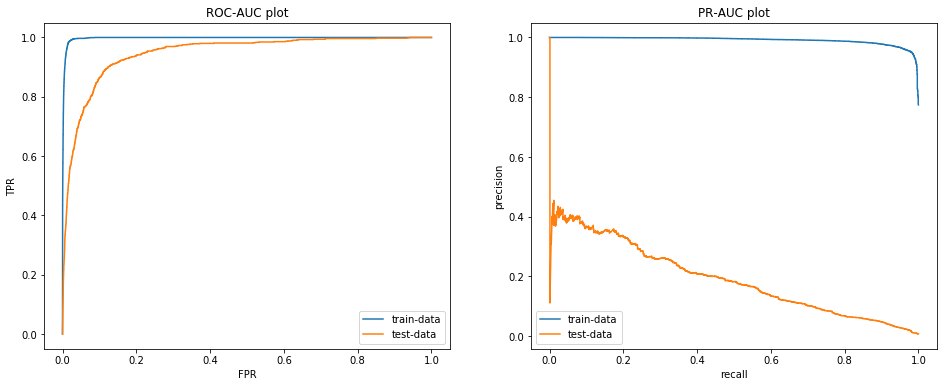

the maximum value of tpr*(1-fpr) 0.9693363845767318 for threshold 0.35

			##### TRAIN CONFUSION MATRIX #####


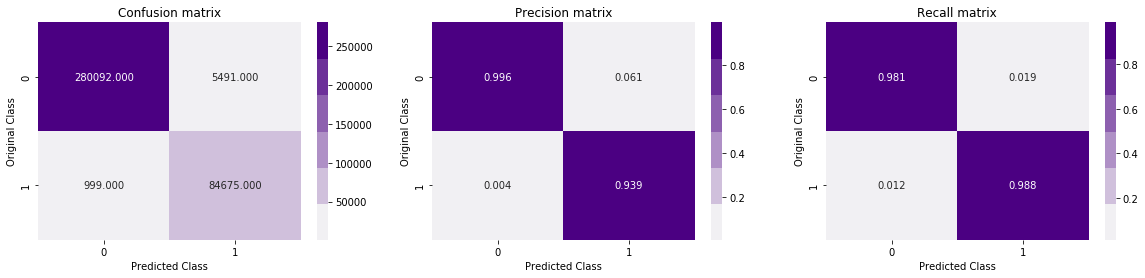

			##### TEST CONFUSION MATRIX #####


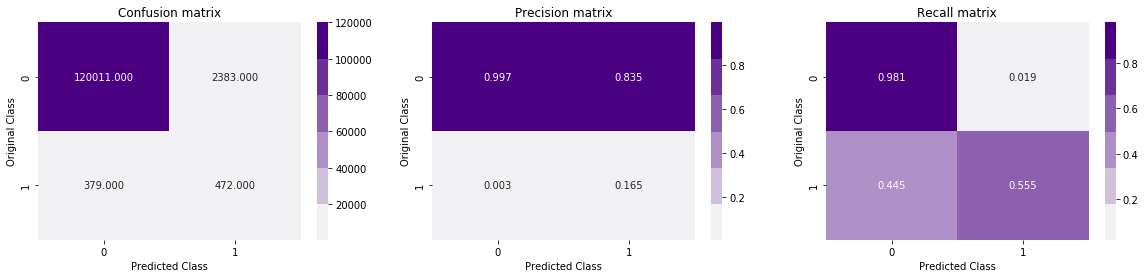

CPU times: user 9min 1s, sys: 216 ms, total: 9min 1s
Wall time: 9min 4s


In [208]:
%%time
clf_rf = RandomForestClassifier(n_estimators= 200,max_depth=15,class_weight={0:0.3,1:0.7})
clf_rf.fit(X,y)
calib_clf_rf = CalibratedClassifierCV(clf_rf,method="sigmoid")
calib_clf_rf.fit(X, y)

train_pred = calib_clf_rf.predict_proba(X)
test_pred = calib_clf_rf.predict_proba(X_test)


fpr_test,tpr_test,thresholds_test = roc_curve(y_true=y_test,y_score=test_pred[:,1])
fpr_train,tpr_train,thresholds_train = roc_curve(y_true=y,y_score=train_pred[:,1])

precision_train, recall_train, _ = precision_recall_curve(y, train_pred[:,1])
precision_test, recall_test, _ = precision_recall_curve(y_test, test_pred[:,1])

print('Train ROC-AUC score for best alpha-value::',round(auc(fpr_train,tpr_train),3),'\n')
print('Test ROC-AUC score for best alpha-value::',round(auc(fpr_test,tpr_test),3),'\n')

print('\nTrain PR-AUC score for best alpha-value:: ',round(auc(recall_train, precision_train),3))
print('Test PR-AUC score for best alpha-value:: ',round(auc(recall_test, precision_test),3))


plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title("ROC-AUC plot")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train,tpr_train,label = 'train-data')
plt.plot(fpr_test,tpr_test,label = 'test-data')
plt.legend()

plt.subplot(122)
plt.title("PR-AUC plot")
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall_train,precision_train,label = 'train-data')
plt.plot(recall_test,precision_test,label = 'test-data')
plt.legend()

plt.show()

best_t = find_best_threshold(thresholds_train, fpr_train, tpr_train)
print('\n\t\t\t#####','TRAIN CONFUSION MATRIX','#####')
plot_confusion_matrix(y, predict_with_best_t(train_pred[:,1], best_t))
print('\t\t\t#####','TEST CONFUSION MATRIX','#####')
plot_confusion_matrix(y_test, predict_with_best_t(test_pred[:,1], best_t))

<h3> XGBoost </h3>

In [198]:
%%time
clf_xgb = XGBClassifier(n_estimators= 500,learning_rate = 0.02,\
                                 objective='binary:logistic',early_stopping_rounds = 10,eval_metric = 'auc',\
                                 max_depth=10,min_child_weight=10,sample_weight=[0.2,0.8],subsample = 0.8)
clf_xgb.fit(X,y)
calib_clf_xgb = CalibratedClassifierCV(clf_xgb,method="sigmoid")
calib_clf_xgb.fit(X, y)

train_pred = calib_clf_xgb.predict_proba(X)
test_pred = calib_clf_xgb.predict_proba(X_test)

CPU times: user 1h 6min 46s, sys: 3.14 s, total: 1h 6min 49s
Wall time: 1h 7min


Train ROC-AUC score for best alpha-value:: 0.998 

Test ROC-AUC score for best alpha-value:: 0.952 


Train PR-AUC score for best alpha-value::  0.992
Test PR-AUC score for best alpha-value::  0.238


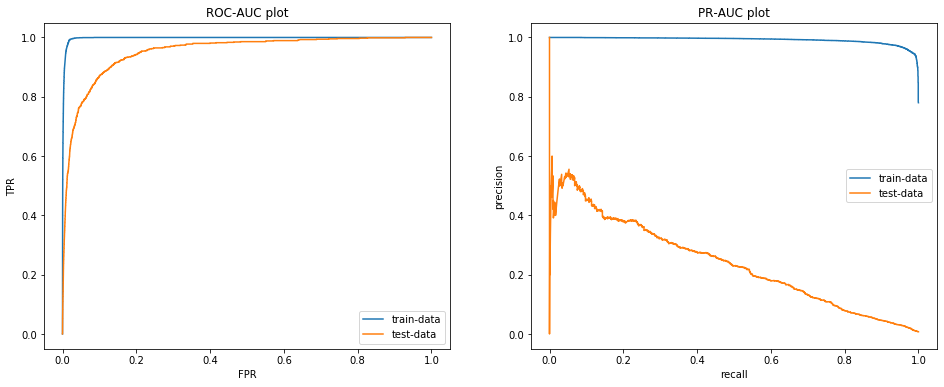

the maximum value of tpr*(1-fpr) 0.9733351931056569 for threshold 0.239

			##### TRAIN CONFUSION MATRIX #####


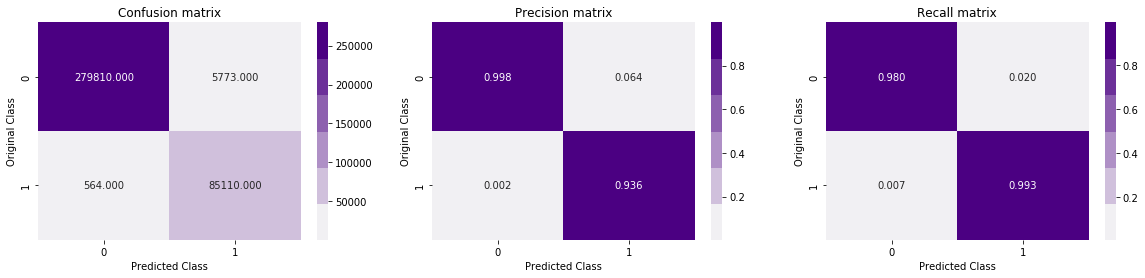

			##### TEST CONFUSION MATRIX #####


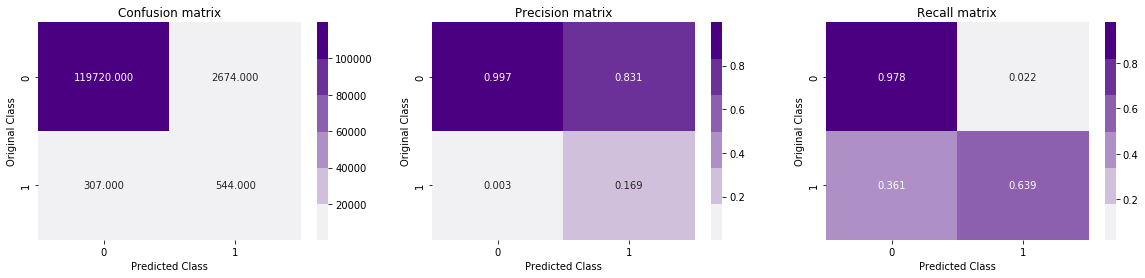

In [199]:
fpr_test,tpr_test,thresholds_test = roc_curve(y_true=y_test,y_score=test_pred[:,1])
fpr_train,tpr_train,thresholds_train = roc_curve(y_true=y,y_score=train_pred[:,1])

precision_train, recall_train, _ = precision_recall_curve(y, train_pred[:,1])
precision_test, recall_test, _ = precision_recall_curve(y_test, test_pred[:,1])

print('Train ROC-AUC score for best alpha-value::',round(auc(fpr_train,tpr_train),3),'\n')
print('Test ROC-AUC score for best alpha-value::',round(auc(fpr_test,tpr_test),3),'\n')

print('\nTrain PR-AUC score for best alpha-value:: ',round(auc(recall_train, precision_train),3))
print('Test PR-AUC score for best alpha-value:: ',round(auc(recall_test, precision_test),3))


plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title("ROC-AUC plot")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train,tpr_train,label = 'train-data')
plt.plot(fpr_test,tpr_test,label = 'test-data')
plt.legend()

plt.subplot(122)
plt.title("PR-AUC plot")
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall_train,precision_train,label = 'train-data')
plt.plot(recall_test,precision_test,label = 'test-data')
plt.legend()

plt.show()

best_t = find_best_threshold(thresholds_train, fpr_train, tpr_train)
print('\n\t\t\t#####','TRAIN CONFUSION MATRIX','#####')
plot_confusion_matrix(y, predict_with_best_t(train_pred[:,1], best_t))
print('\t\t\t#####','TEST CONFUSION MATRIX','#####')
plot_confusion_matrix(y_test, predict_with_best_t(test_pred[:,1], best_t))

<h3> 4.3.2 Smote Oversampling</h3>

In [200]:
%%time

X = X_train
y = y_train

over = SMOTE(sampling_strategy=0.5)

X, y = over.fit_resample(X, y)

print(Counter(y))


Counter({0: 285583, 1: 142791})
CPU times: user 588 ms, sys: 64 ms, total: 652 ms
Wall time: 881 ms


<h3>Random Forest</h3>

Train ROC-AUC score for best alpha-value:: 0.998 

Test ROC-AUC score for best alpha-value:: 0.932 


Train PR-AUC score for best alpha-value::  0.996
Test PR-AUC score for best alpha-value::  0.16


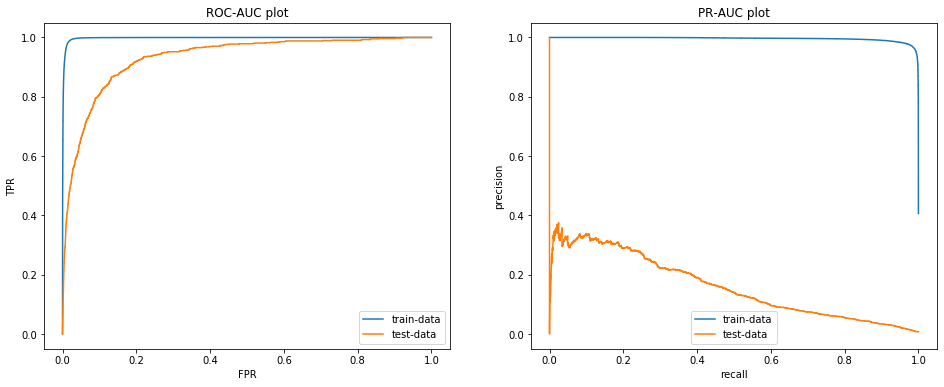

the maximum value of tpr*(1-fpr) 0.9701782922646377 for threshold 0.461

			##### TRAIN CONFUSION MATRIX #####


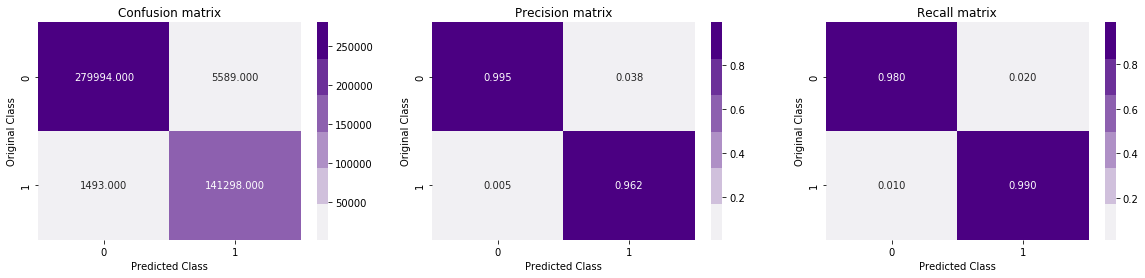

			##### TEST CONFUSION MATRIX #####


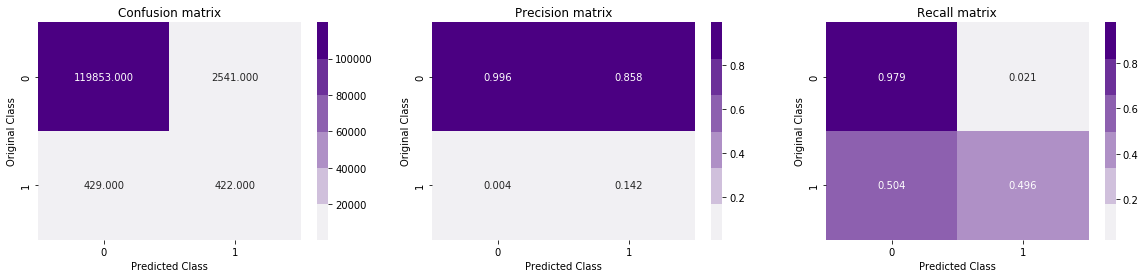

CPU times: user 16min 47s, sys: 1.2 s, total: 16min 48s
Wall time: 17min 11s


In [206]:
%%time
clf_rf = RandomForestClassifier(n_estimators= 200,max_depth=15,class_weight={0:0.3,1:0.7})
clf_rf.fit(X,y)
calib_clf_rf = CalibratedClassifierCV(clf_rf,method="sigmoid")
calib_clf_rf.fit(X, y)

train_pred = calib_clf_rf.predict_proba(X)
test_pred = calib_clf_rf.predict_proba(X_test)


fpr_test,tpr_test,thresholds_test = roc_curve(y_true=y_test,y_score=test_pred[:,1])
fpr_train,tpr_train,thresholds_train = roc_curve(y_true=y,y_score=train_pred[:,1])

precision_train, recall_train, _ = precision_recall_curve(y, train_pred[:,1])
precision_test, recall_test, _ = precision_recall_curve(y_test, test_pred[:,1])

print('Train ROC-AUC score for best alpha-value::',round(auc(fpr_train,tpr_train),3),'\n')
print('Test ROC-AUC score for best alpha-value::',round(auc(fpr_test,tpr_test),3),'\n')

print('\nTrain PR-AUC score for best alpha-value:: ',round(auc(recall_train, precision_train),3))
print('Test PR-AUC score for best alpha-value:: ',round(auc(recall_test, precision_test),3))


plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title("ROC-AUC plot")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train,tpr_train,label = 'train-data')
plt.plot(fpr_test,tpr_test,label = 'test-data')
plt.legend()

plt.subplot(122)
plt.title("PR-AUC plot")
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall_train,precision_train,label = 'train-data')
plt.plot(recall_test,precision_test,label = 'test-data')
plt.legend()

plt.show()

best_t = find_best_threshold(thresholds_train, fpr_train, tpr_train)
print('\n\t\t\t#####','TRAIN CONFUSION MATRIX','#####')
plot_confusion_matrix(y, predict_with_best_t(train_pred[:,1], best_t))
print('\t\t\t#####','TEST CONFUSION MATRIX','#####')
plot_confusion_matrix(y_test, predict_with_best_t(test_pred[:,1], best_t))

<h3> XGBoost </h3>

In [ ]:
%%time
clf_xgb = XGBClassifier(n_estimators= 500,learning_rate = 0.02,\
                                 objective='binary:logistic',early_stopping_rounds = 10,eval_metric = 'auc',\
                                 max_depth=10,min_child_weight=10,sample_weight=[0.2,0.8],subsample = 0.8)
clf_xgb.fit(X,y)
calib_clf_xgb = CalibratedClassifierCV(clf_xgb,method="sigmoid")
calib_clf_xgb.fit(X, y)

train_pred = calib_clf_xgb.predict_proba(X)
test_pred = calib_clf_xgb.predict_proba(X_test)


Train ROC-AUC score for best alpha-value:: 0.999 

Test ROC-AUC score for best alpha-value:: 0.932 


Train PR-AUC score for best alpha-value::  0.999
Test PR-AUC score for best alpha-value::  0.184


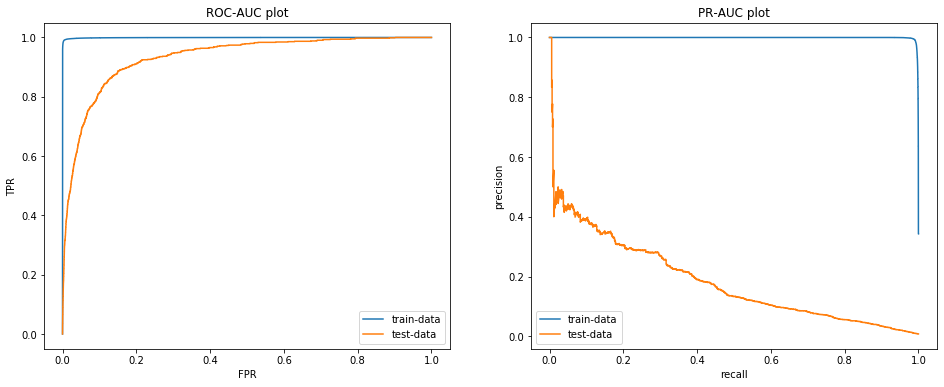

the maximum value of tpr*(1-fpr) 0.9865095094065092 for threshold 0.334

			##### TRAIN CONFUSION MATRIX #####


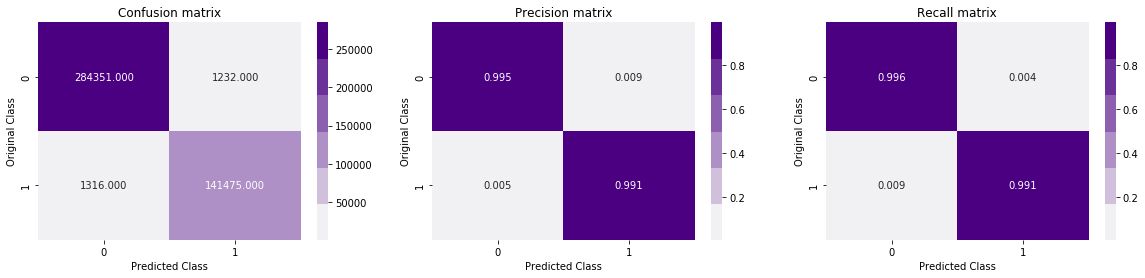

			##### TEST CONFUSION MATRIX #####


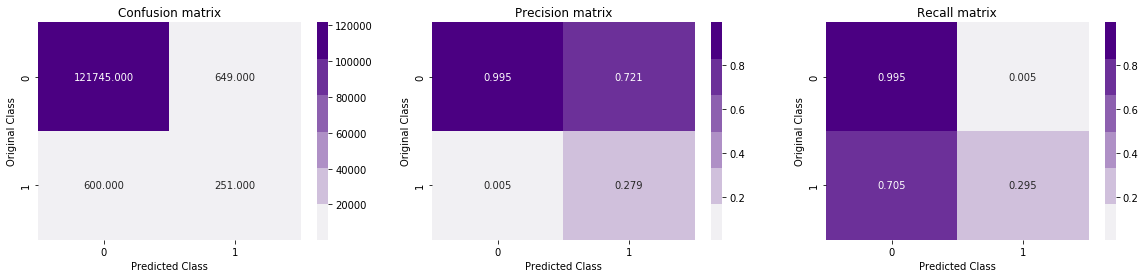

In [203]:
fpr_test,tpr_test,thresholds_test = roc_curve(y_true=y_test,y_score=test_pred[:,1])
fpr_train,tpr_train,thresholds_train = roc_curve(y_true=y,y_score=train_pred[:,1])

precision_train, recall_train, _ = precision_recall_curve(y, train_pred[:,1])
precision_test, recall_test, _ = precision_recall_curve(y_test, test_pred[:,1])

print('Train ROC-AUC score for best alpha-value::',round(auc(fpr_train,tpr_train),3),'\n')
print('Test ROC-AUC score for best alpha-value::',round(auc(fpr_test,tpr_test),3),'\n')

print('\nTrain PR-AUC score for best alpha-value:: ',round(auc(recall_train, precision_train),3))
print('Test PR-AUC score for best alpha-value:: ',round(auc(recall_test, precision_test),3))


plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title("ROC-AUC plot")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train,tpr_train,label = 'train-data')
plt.plot(fpr_test,tpr_test,label = 'test-data')
plt.legend()

plt.subplot(122)
plt.title("PR-AUC plot")
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall_train,precision_train,label = 'train-data')
plt.plot(recall_test,precision_test,label = 'test-data')
plt.legend()

plt.show()

best_t = find_best_threshold(thresholds_train, fpr_train, tpr_train)
print('\n\t\t\t#####','TRAIN CONFUSION MATRIX','#####')
plot_confusion_matrix(y, predict_with_best_t(train_pred[:,1], best_t))
print('\t\t\t#####','TEST CONFUSION MATRIX','#####')
plot_confusion_matrix(y_test, predict_with_best_t(test_pred[:,1], best_t))

<h3>Observations from model's performance:</h3>
--------------------------------------------------------------------------
<font color = 'green'>
<i>
<b>
    
- All the models ROC-AUC score is above 0.90 except for Logistic regression,PR-AUC is also low for Logisitic regression when compared to other models.


- One of the main reason for backorders is Forecast error,creating a forecast error feature has been useful for some models.Other created features, performance error,difference in current inventory level and minimum units required have  also been useful for some models.
    
    
    
- Based on the ROC_AUC and PR_AUC scores,Random Forest seems to be performing well but from the results of confusion matrices,Random forest is not performing well in classifing the positive points but XGBoost has good results compared to Random forest.

    
- When models RandomForest and XGBoost is applied on resampled data, XGBoost performed better when Random oversampling of data is performed rather than SMOTE oversampling.Upon applying resampling techniques,RandomForest's performance decreased,recall and precision has come closer to random model.

</b>    
</i>
</font>


### 5. RESULTS

In [225]:
#https://stackoverflow.com/questions/43583847/python-pretty-table-with-color-output
t = PrettyTable(['MODEL','ROC-AUC_train','ROC-AUC_test','PR-AUC_train','PR-AUC_test'])
score_dict = {'Dummy':['0.477','--','--','0.006'],\
             'LR':['0.878','0.877','0.064','0.068'],\
             'DT':['0.957','0.933','0.201','0.162'],\
             'RF':['0.999','0.955','0.908','0.286'],\
             'XGB':['0.973','0.948','0.241','0.191'],\
             'BRF':['0.975','0.944','0.241','0.176'],\
             'oversample_XGB':['0.998','0.952','0.992','0.238'],\
             'SMOTE_XGB':['0.999','0.932','0.999','0.184'],
              'oversample_RF':['0.998','0.932','0.996','0.16'],
             'SMOTE_RF':['0.998','0.946','0.991','0.192']}

for model,scores in score_dict.items():
    row = [model]
    scores = ["\033[1;32m%s\033[0m"%score for score in scores]
    row.extend(scores)
    t.add_row(row)
    
print(t)

+----------------+---------------+--------------+--------------+-------------+
|     MODEL      | ROC-AUC_train | ROC-AUC_test | PR-AUC_train | PR-AUC_test |
+----------------+---------------+--------------+--------------+-------------+
|     Dummy      |     0.477     |      --      |      --      |    0.006    |
|       LR       |     0.878     |    0.877     |    0.064     |    0.068    |
|       DT       |     0.957     |    0.933     |    0.201     |    0.162    |
|       RF       |     0.999     |    0.955     |    0.908     |    0.286    |
|      XGB       |     0.973     |    0.948     |    0.241     |    0.191    |
|      BRF       |     0.975     |    0.944     |    0.241     |    0.176    |
| oversample_XGB |     0.998     |    0.952     |    0.992     |    0.238    |
|   SMOTE_XGB    |     0.999     |    0.932     |    0.999     |    0.184    |
| oversample_RF  |     0.998     |    0.932     |    0.996     |     0.16    |
|    SMOTE_RF    |     0.998     |    0.946     |   

<h2>Conclusion:</h2>
--------------------------
<font color = 'maroon'>
<i>
<b>
 
- Though data is extremely imbalanced all the applied models performance is very good compared to the random model.
    
    
- We can come to a conclusion that among all the models based on ROC_AUC,PR_AUC scores and confusion matrices XGBoost is performing better than other models.So,XGboost can be used for the prediction of Backorders on real data.